# Modelo Cálculo de Distancias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

In [2]:
# Función para calcular la distancia Euclidiana a la media
def distancia_euclidiana(x, media):
    return np.sqrt((x - media) ** 2)

# Función para calcular la distancia de Manhattan a la media
def distancia_manhattan(x, media):
    return np.abs(x - media)

def distancia_a_mediana(x, mediana):
    return abs(x - mediana)

In [3]:
df = pd.read_csv("query_3ec5aea3_20240410T153703.csv")

In [4]:
df = df[df["sociedad"] == 1000] #Selección de la sociedad 1000

In [5]:
df = df[df["fecha"] != 202413] #Eliminar mes 13

In [6]:
df['mes'] = df['fecha'].apply(lambda x: str(x)[4:6]) #Crear variable mes

In [7]:
df = df[[
"mes",
"moneda",
"gestoria",
"concepto",
"nivel_1_cuenta",
"proveedor",
"vicepresidencia_direccion_cumpl",
"gasto_ejecutado"]]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571918 entries, 0 to 600772
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   mes                              571918 non-null  object 
 1   moneda                           571918 non-null  object 
 2   gestoria                         571915 non-null  object 
 3   concepto                         571918 non-null  object 
 4   nivel_1_cuenta                   494106 non-null  object 
 5   proveedor                        571918 non-null  object 
 6   vicepresidencia_direccion_cumpl  571918 non-null  object 
 7   gasto_ejecutado                  571918 non-null  float64
dtypes: float64(1), object(7)
memory usage: 39.3+ MB


In [9]:
df['nivel_1_cuenta'].fillna('Sin descripcion',inplace=True) #Los registros nulos en nivel 1 cuenta se marcan como "Sin descripcion"

In [10]:
df['gasto_ejecutado'] = df['gasto_ejecutado']*65987456 # Se multiplica por un número aleatorio para volver el monto en cop

In [11]:
cuentas = df.nivel_1_cuenta.unique() # Se crea lista con tipos de cuentas para desoues iterar

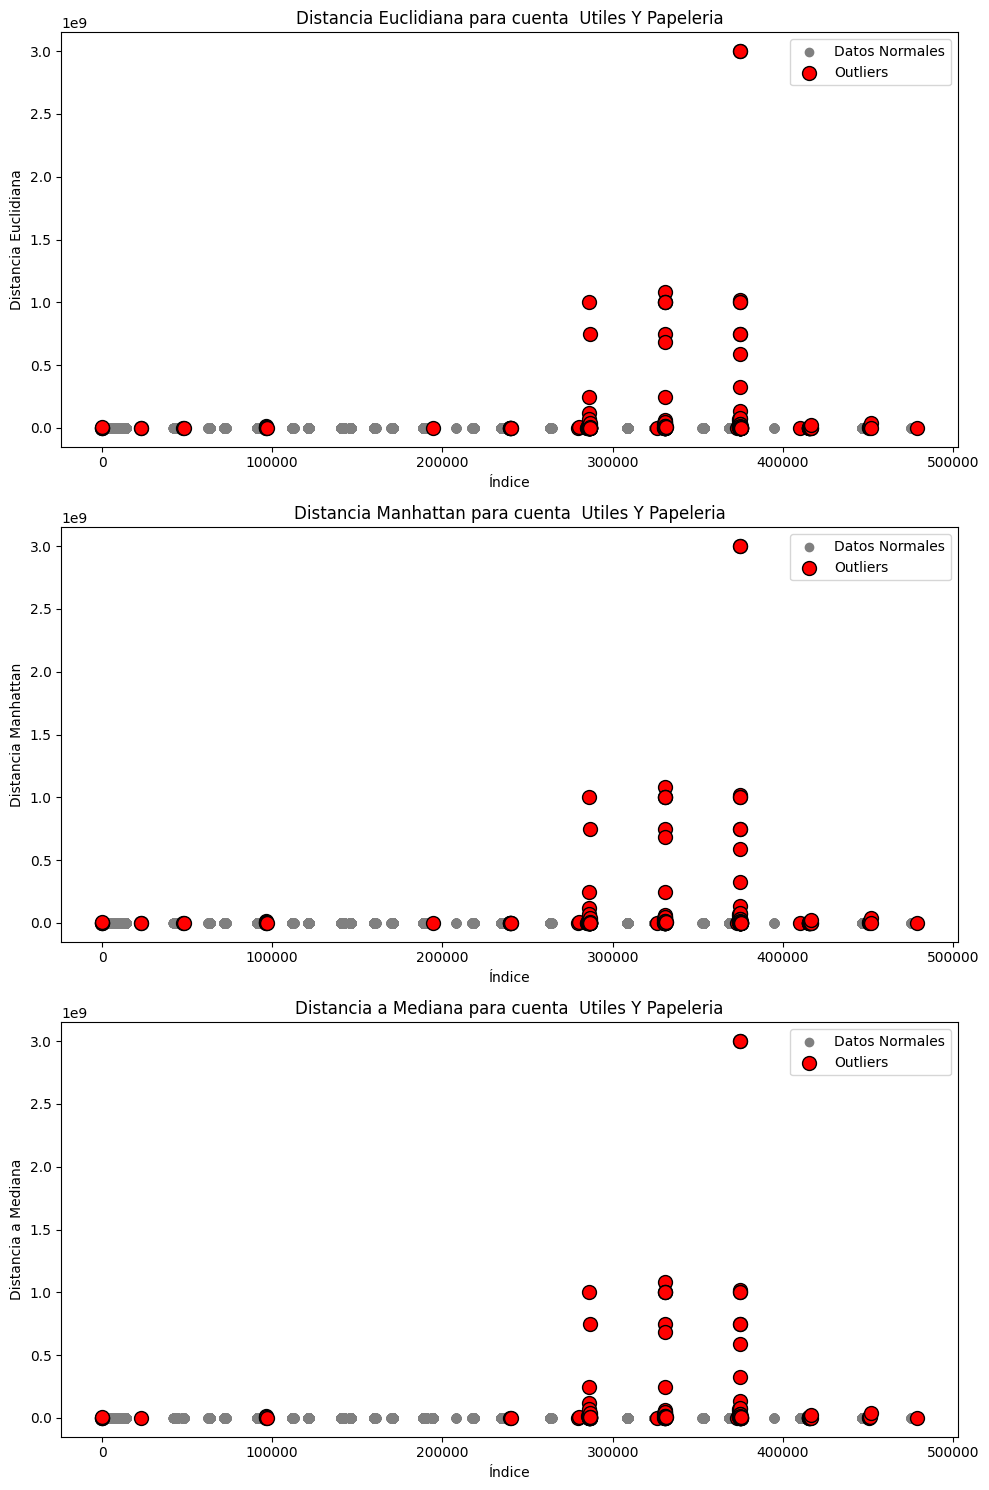

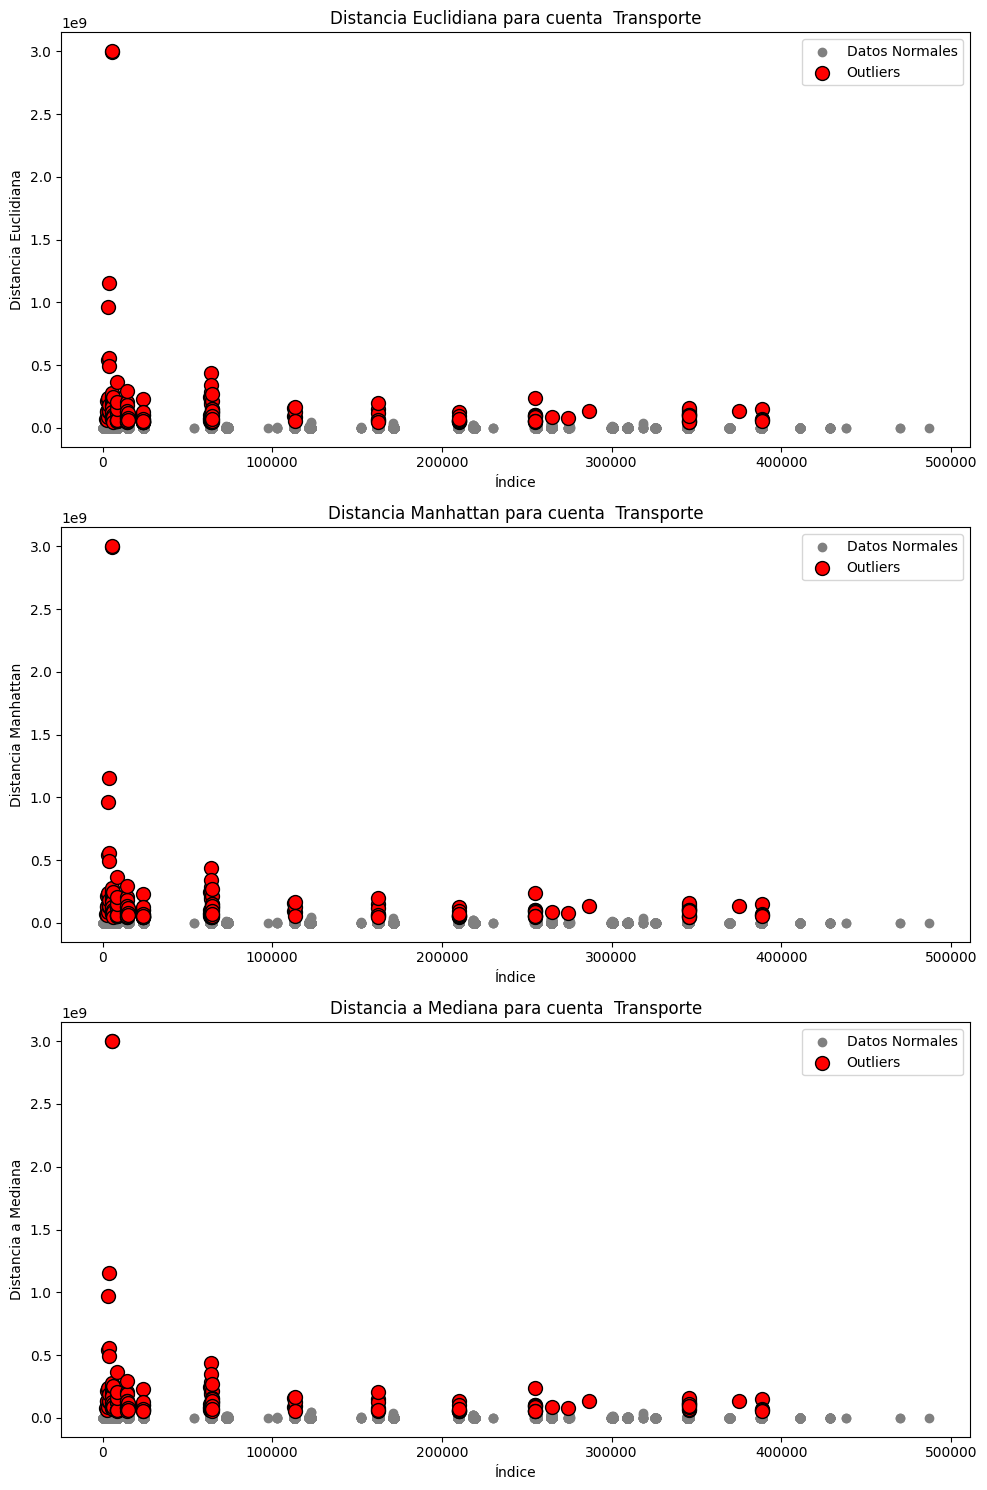

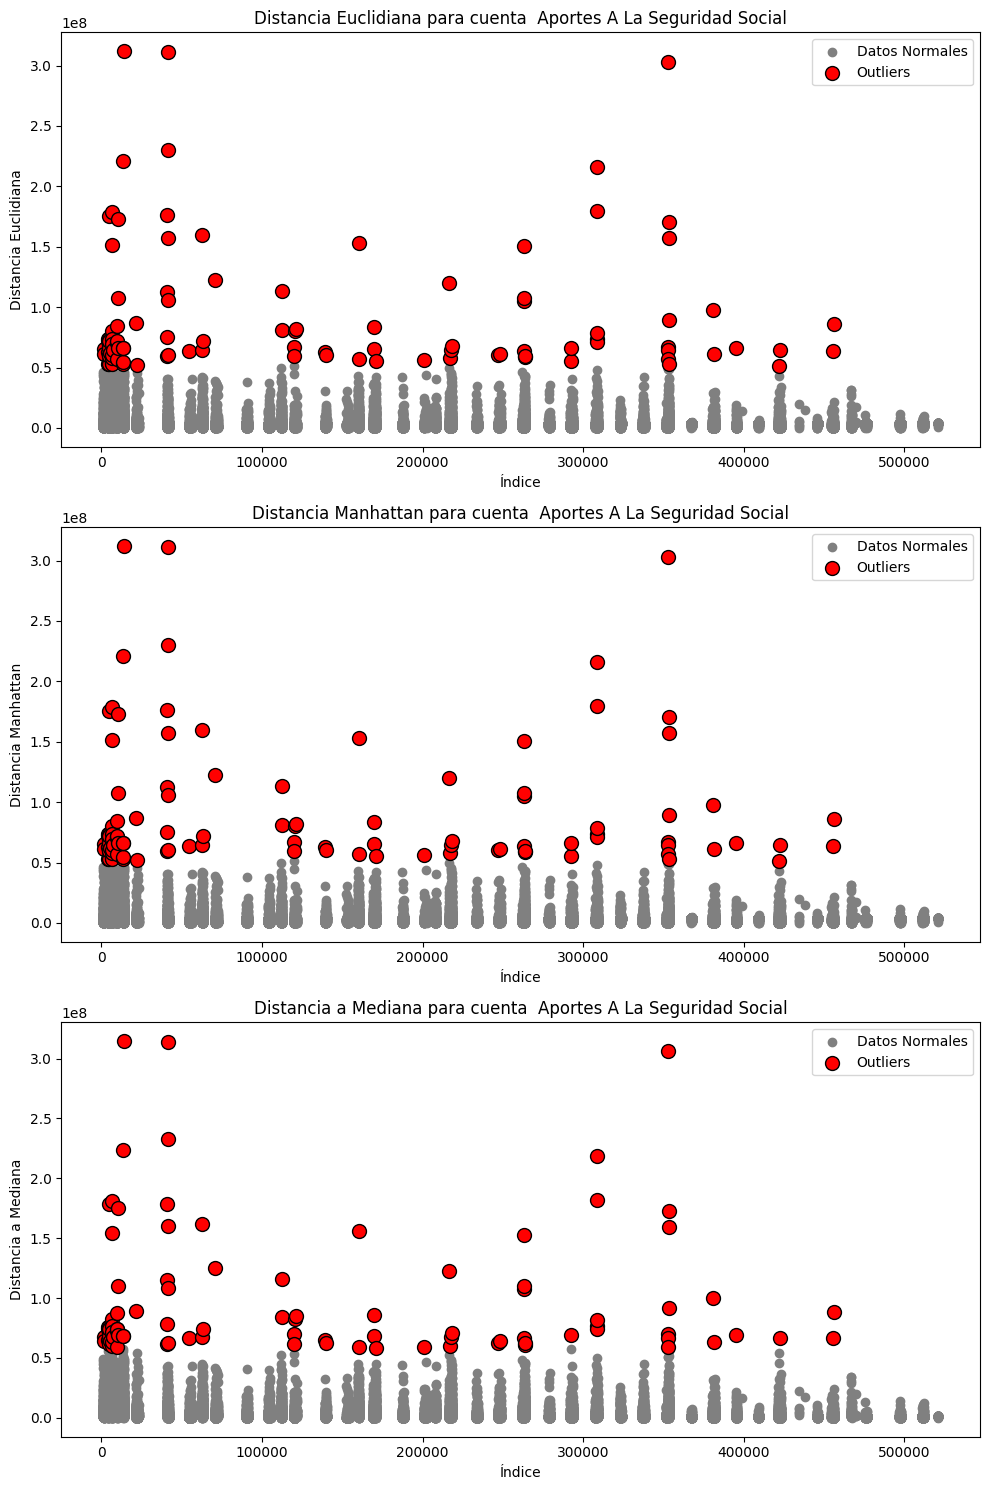

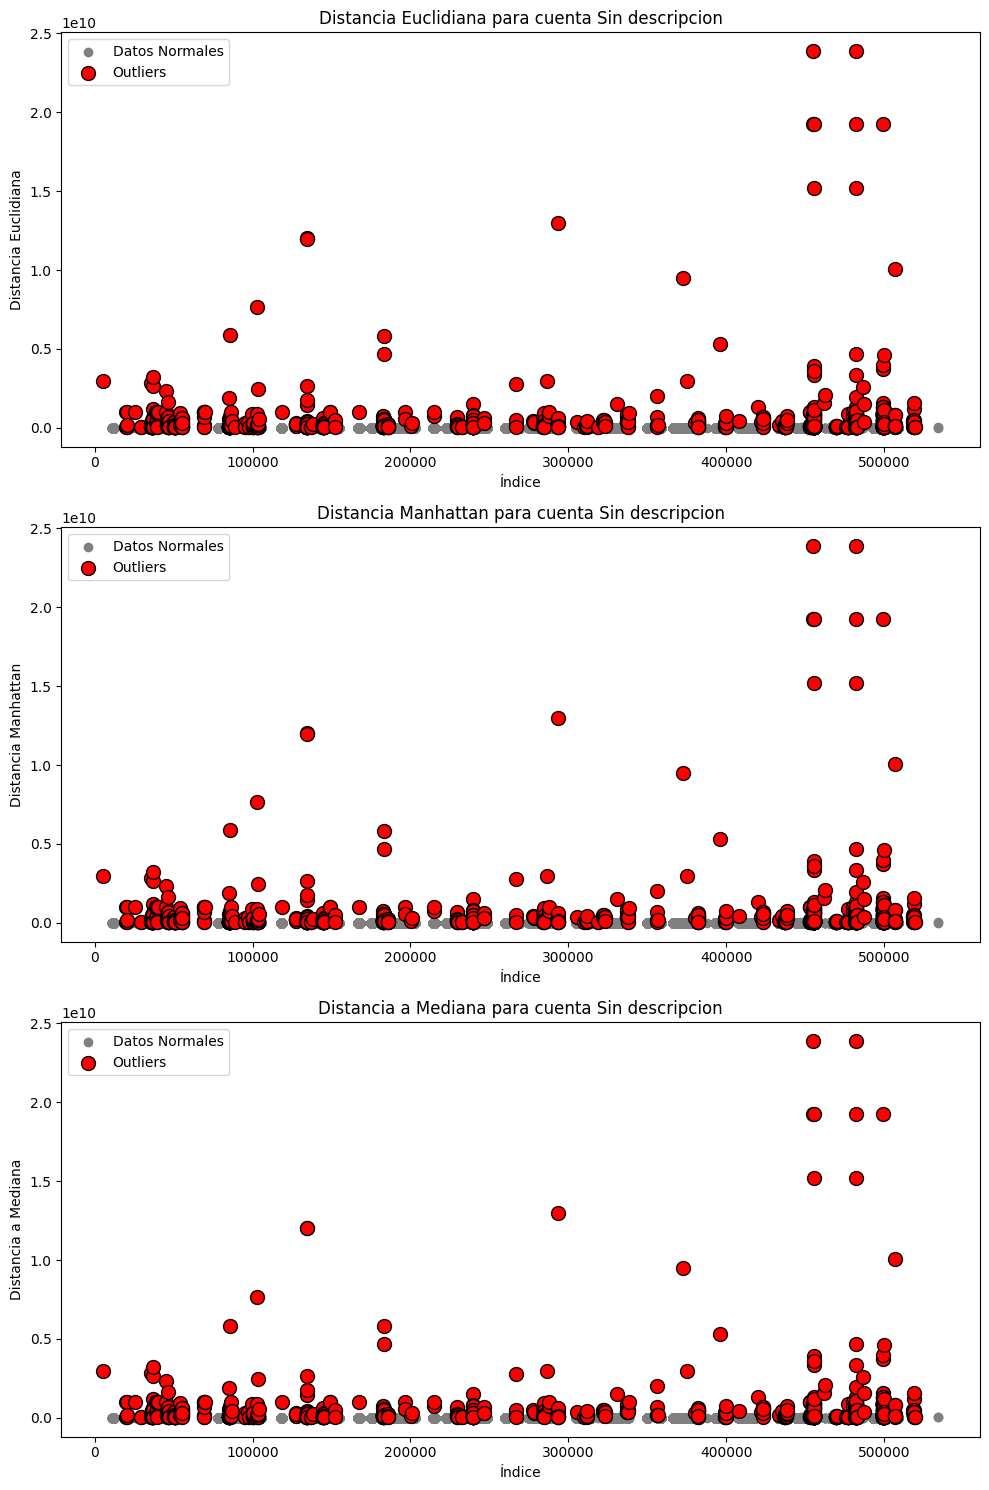

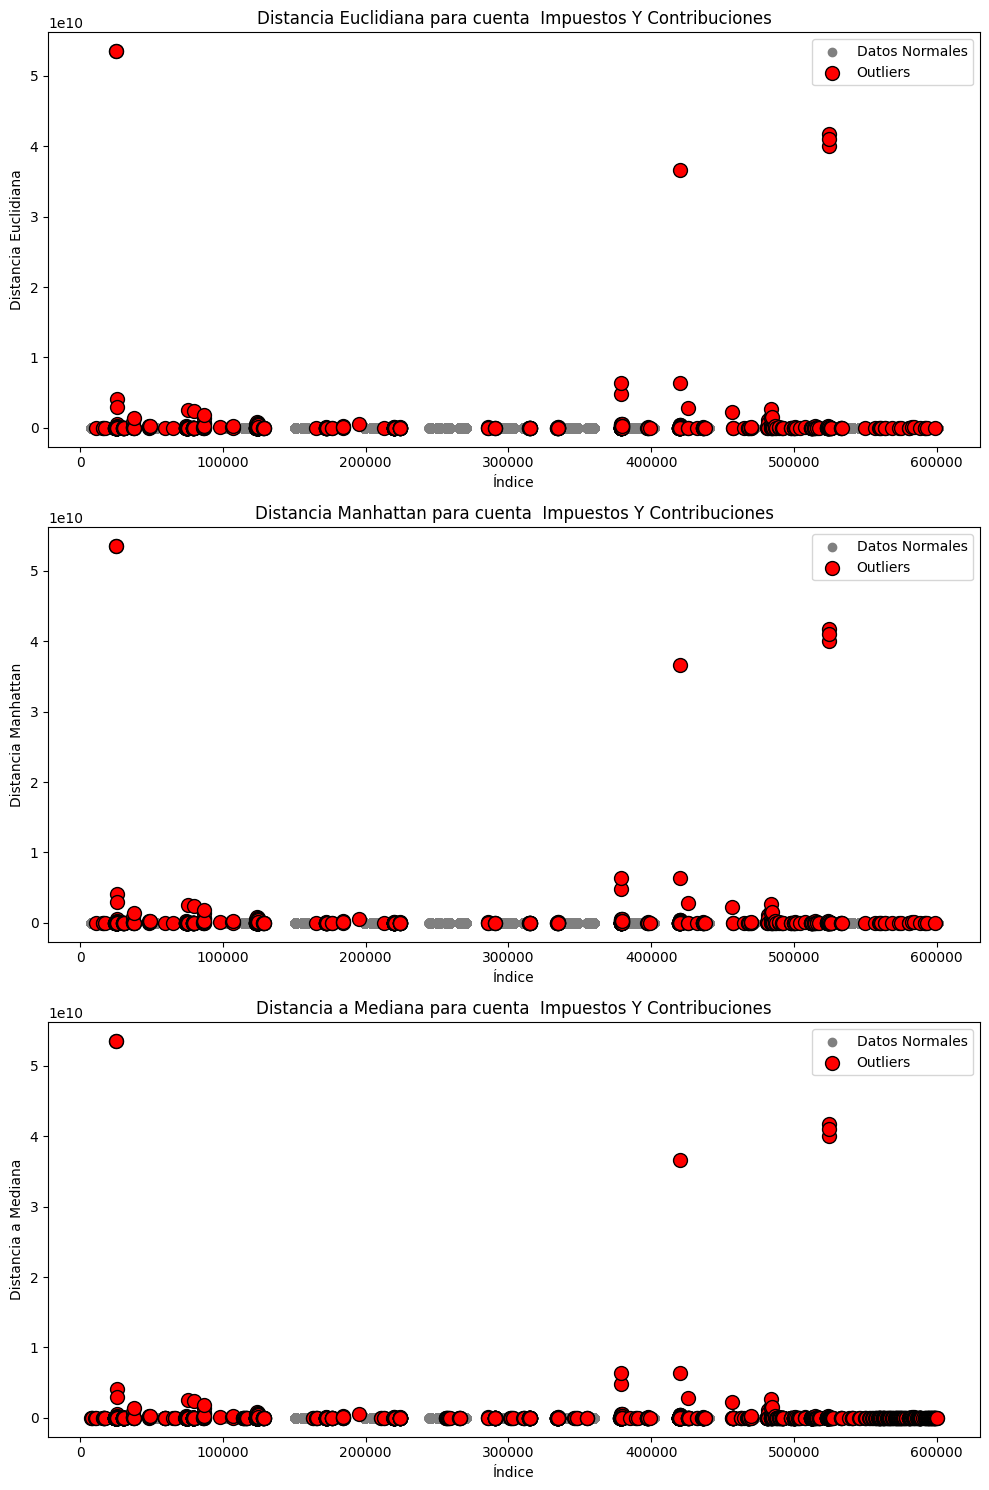

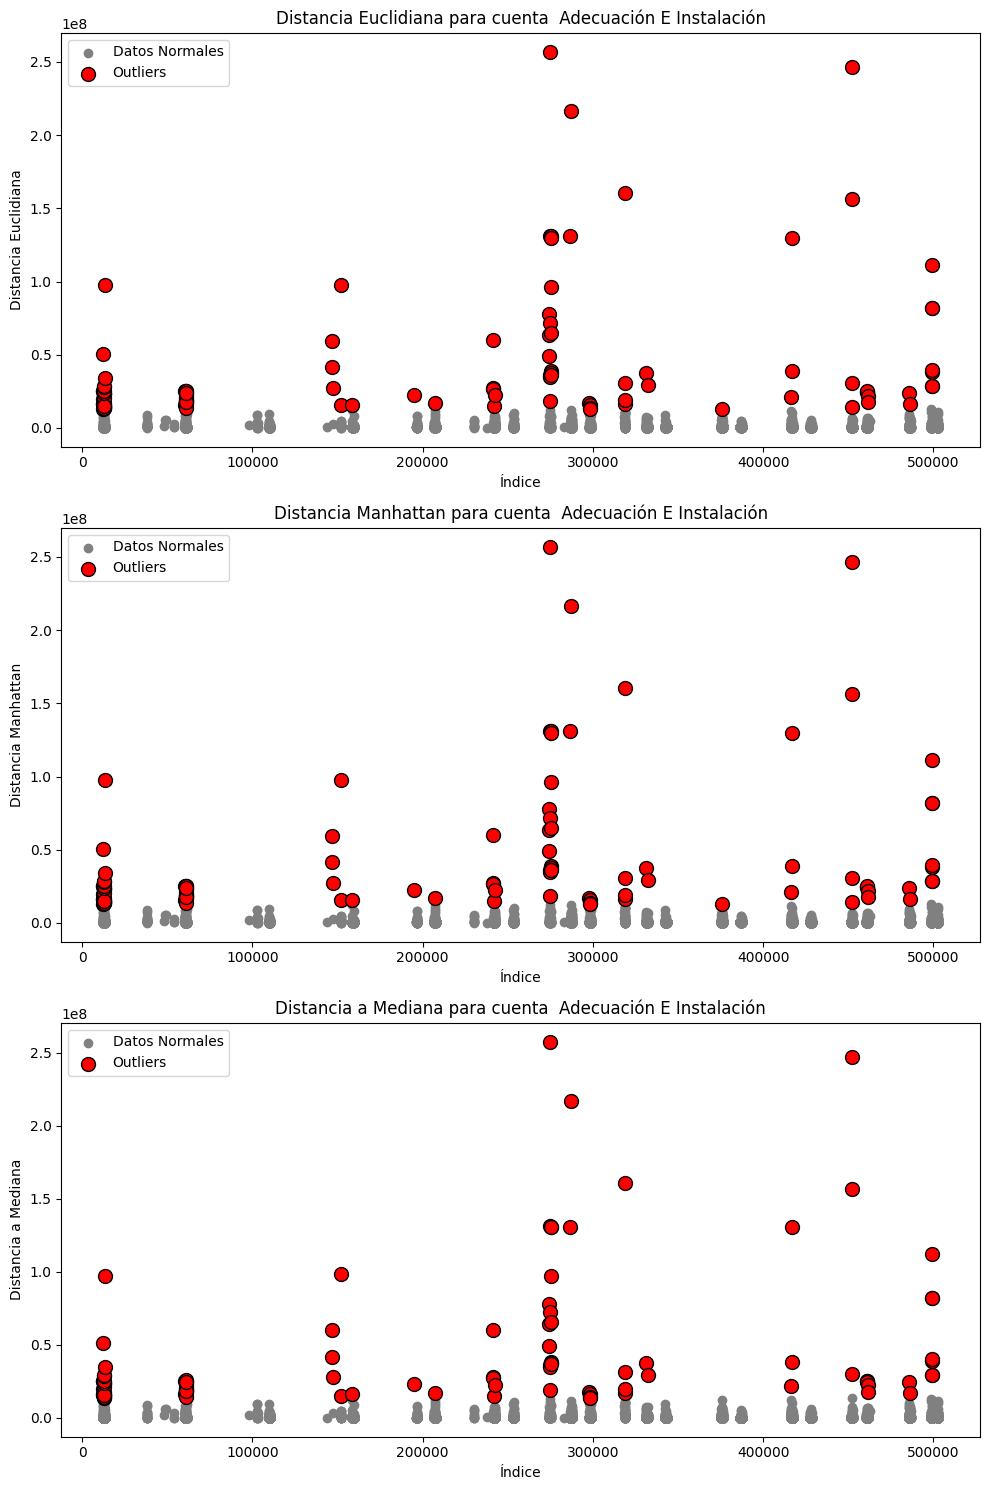

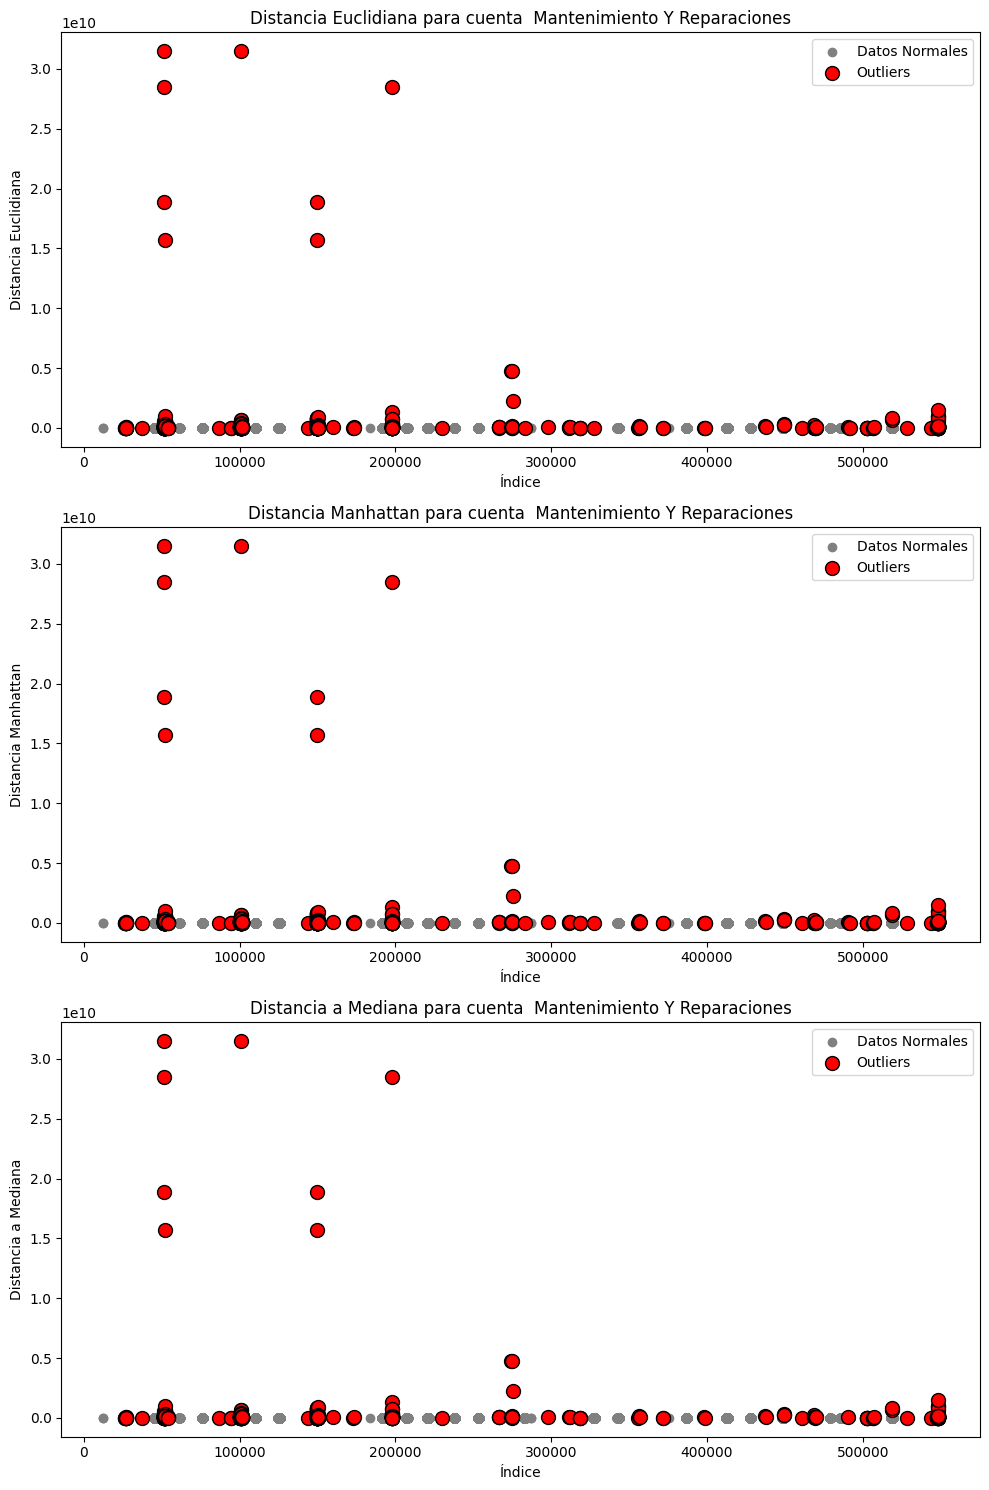

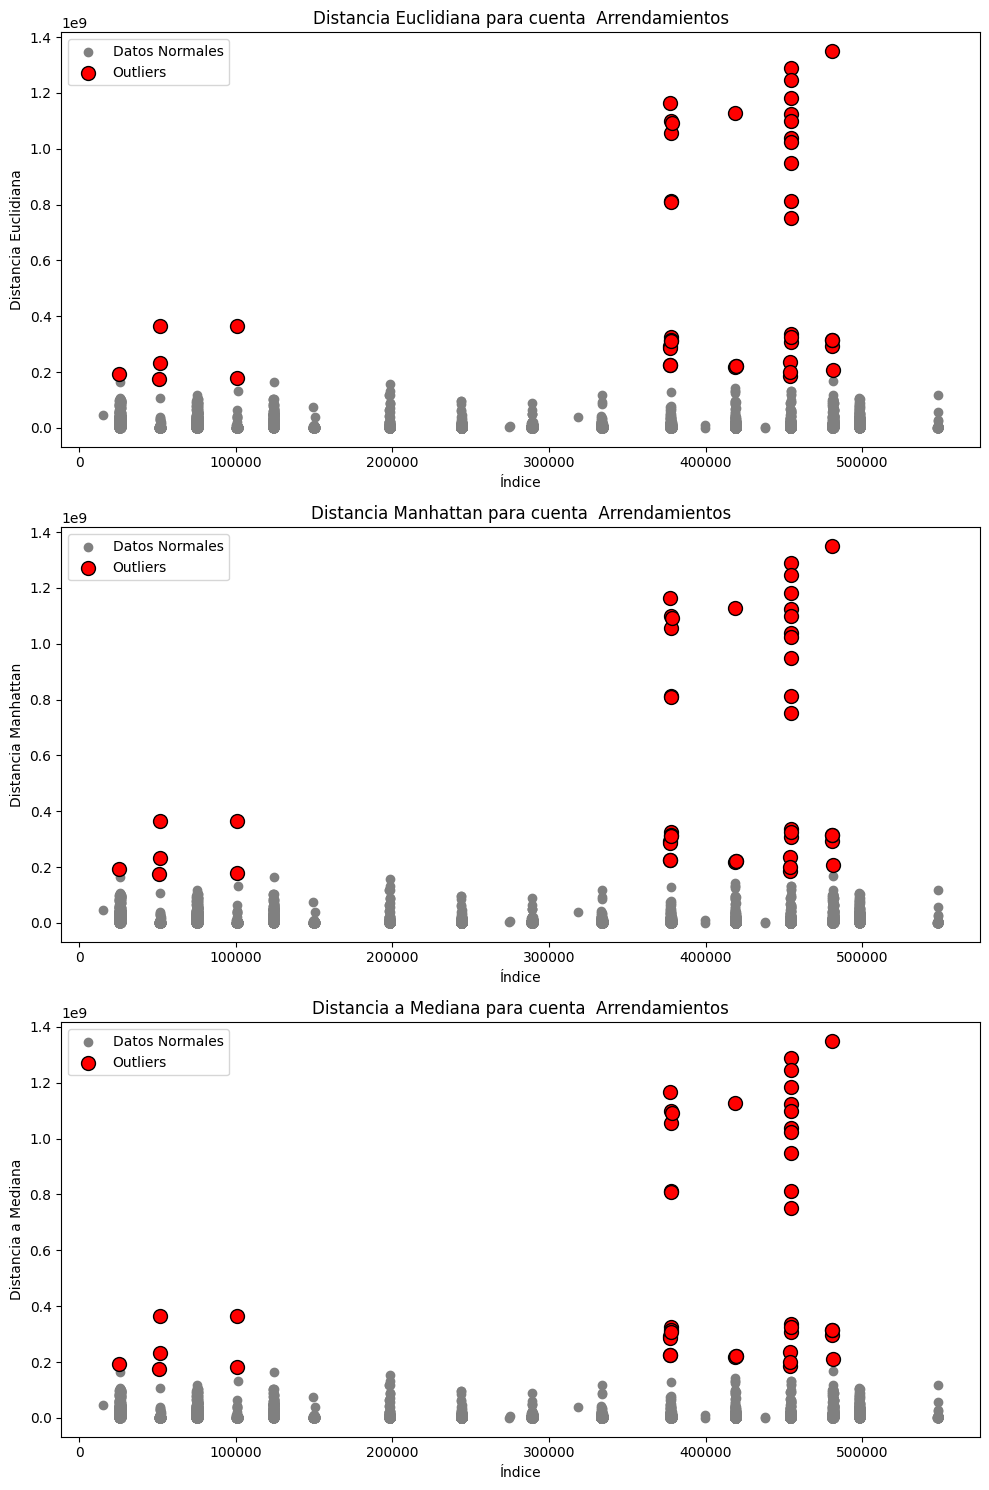

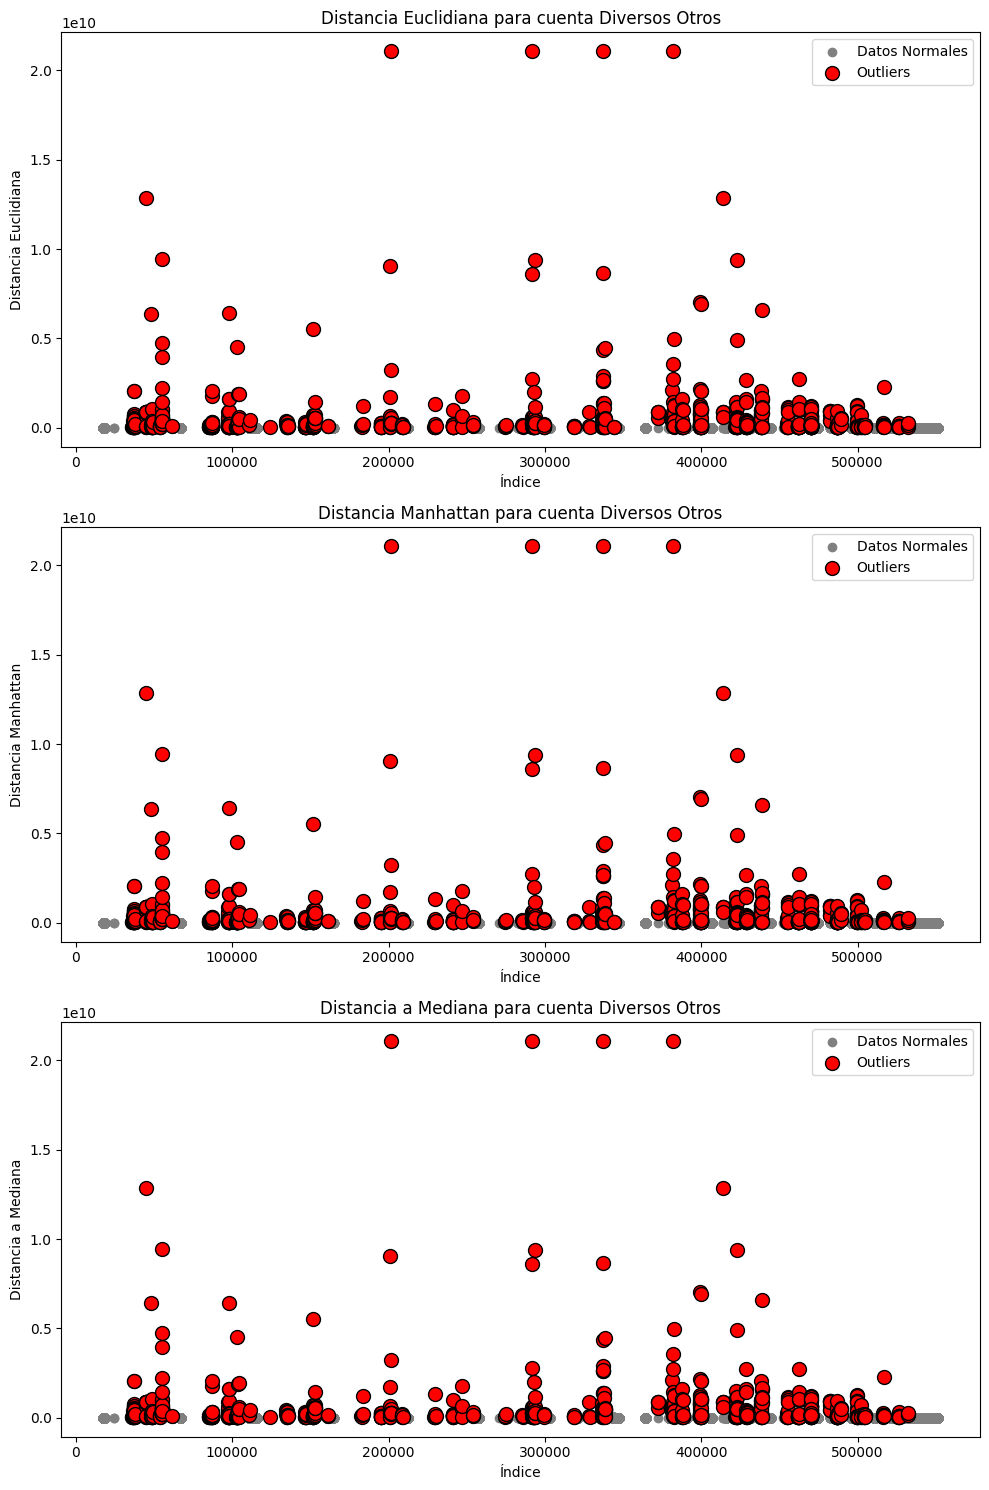

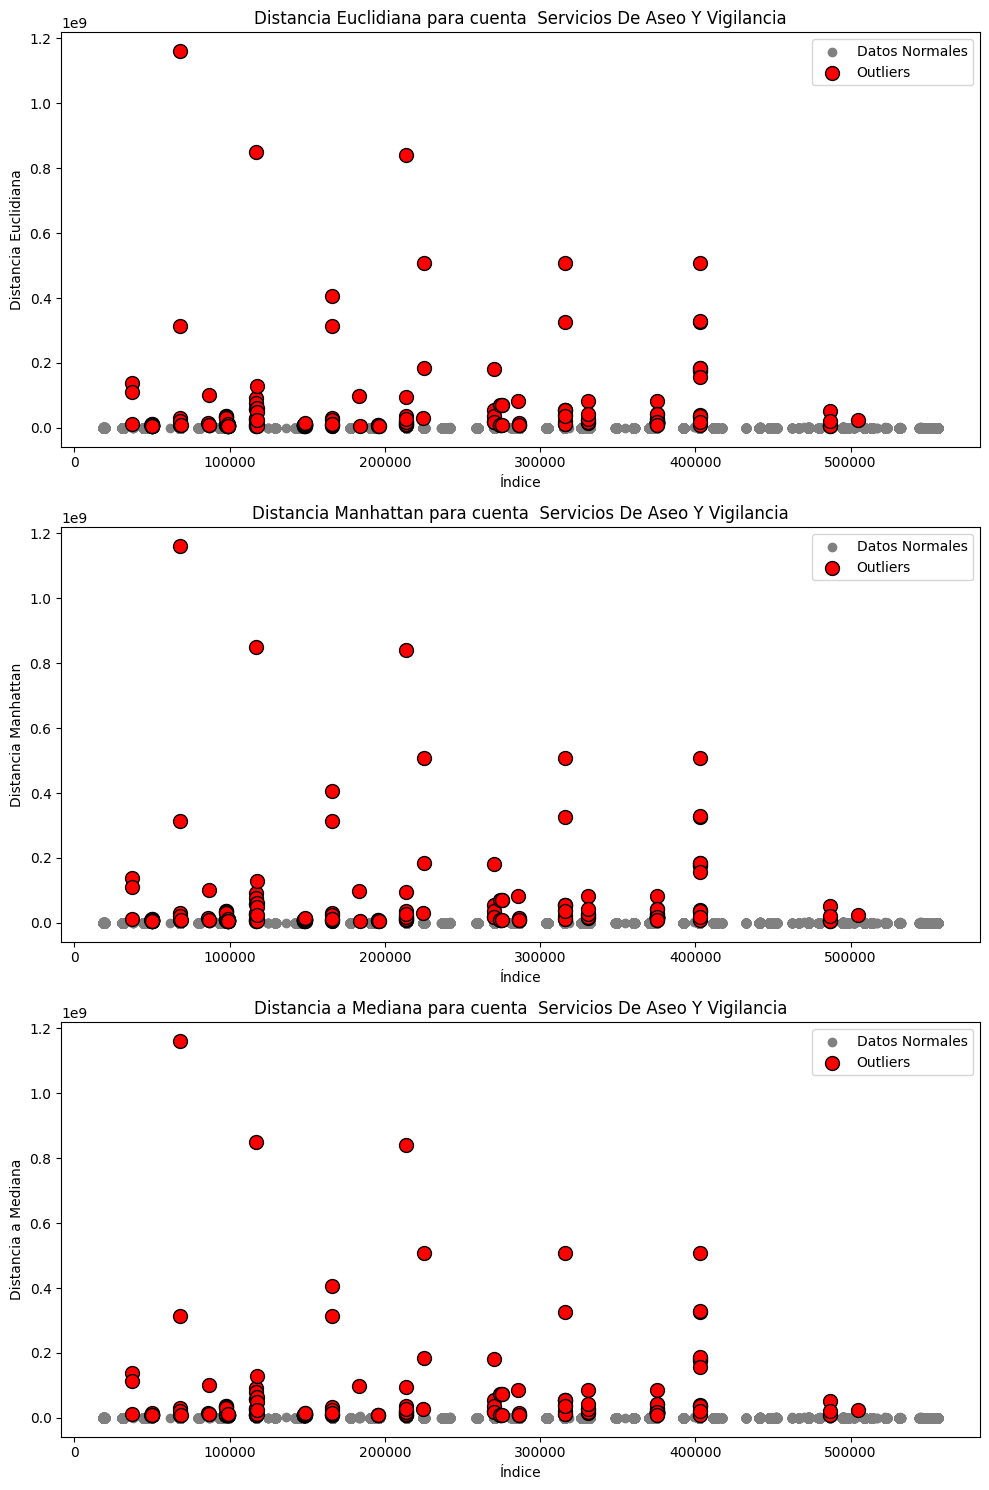

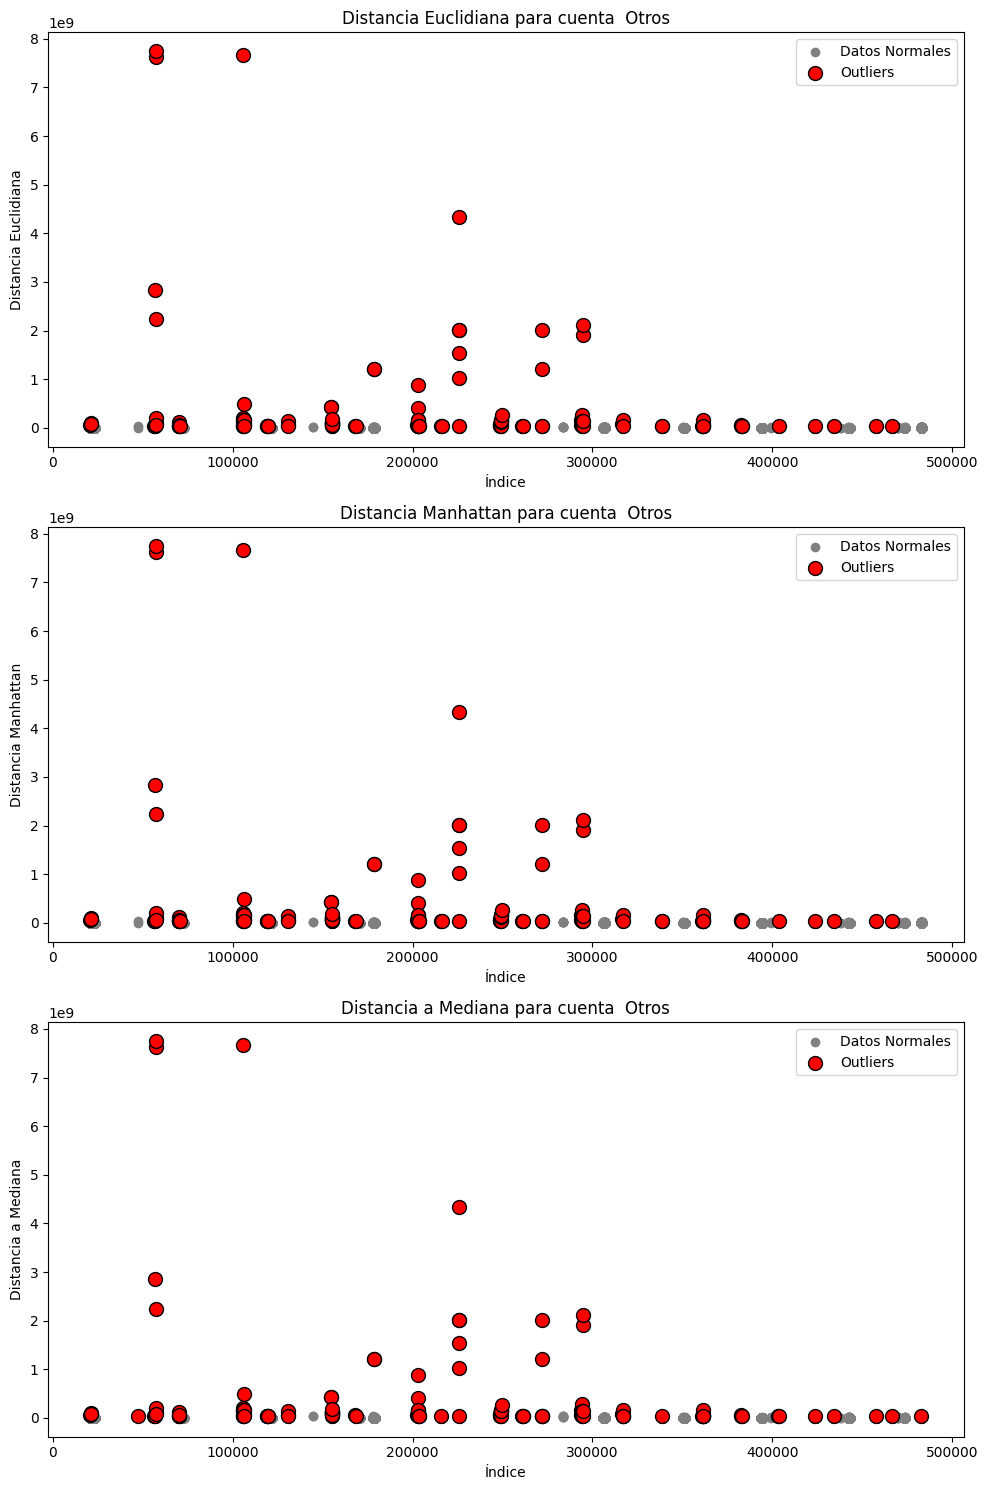

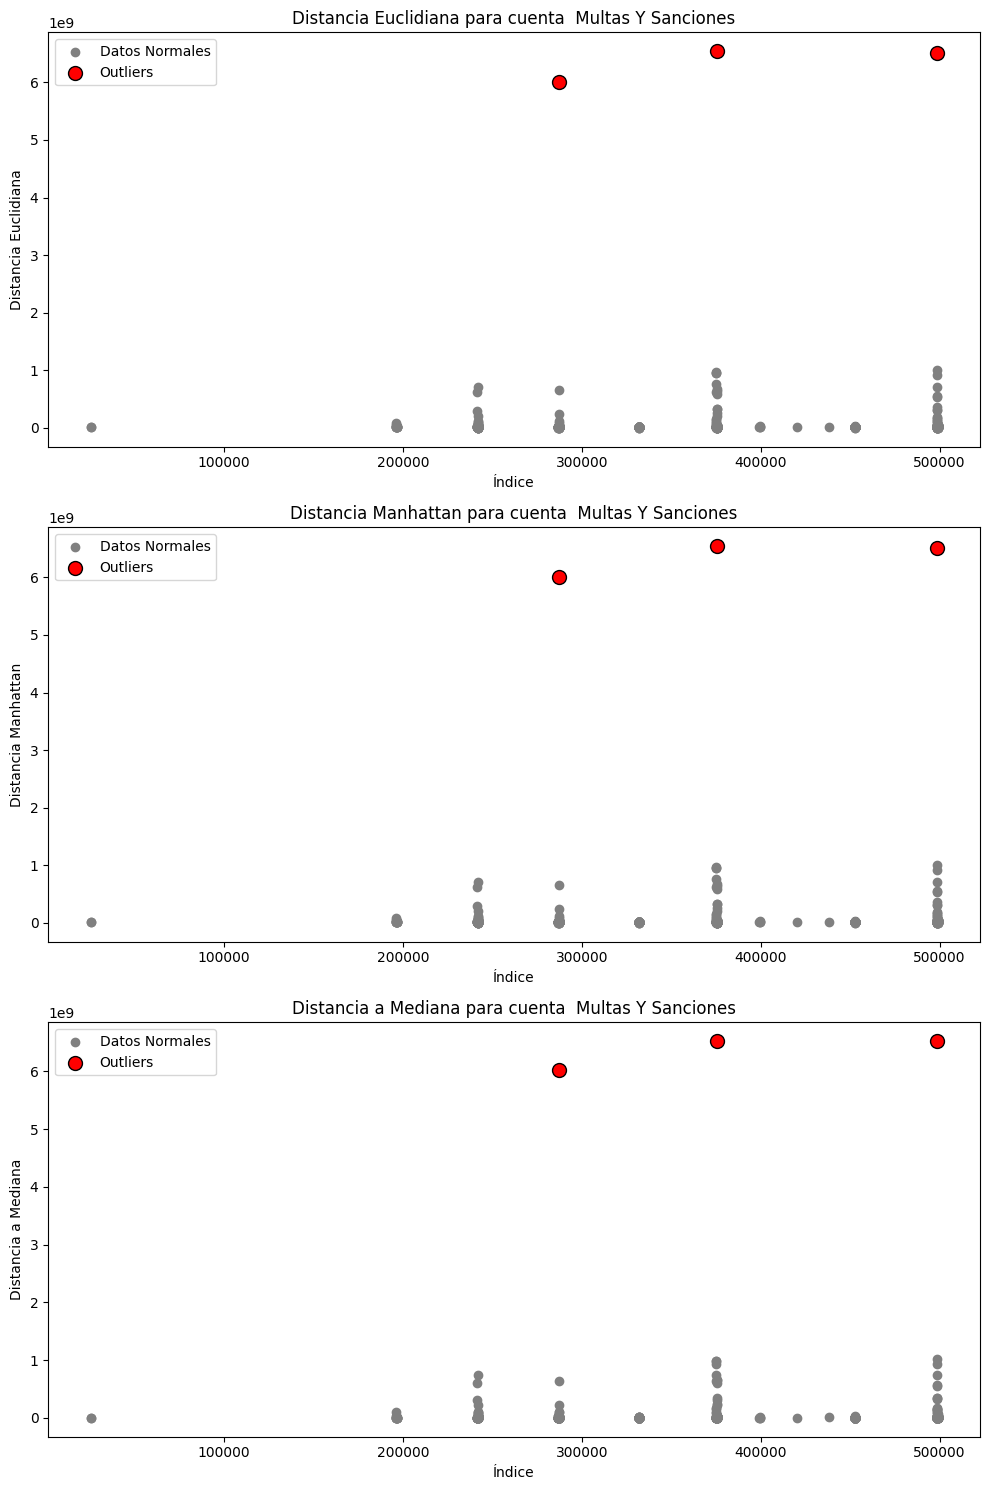

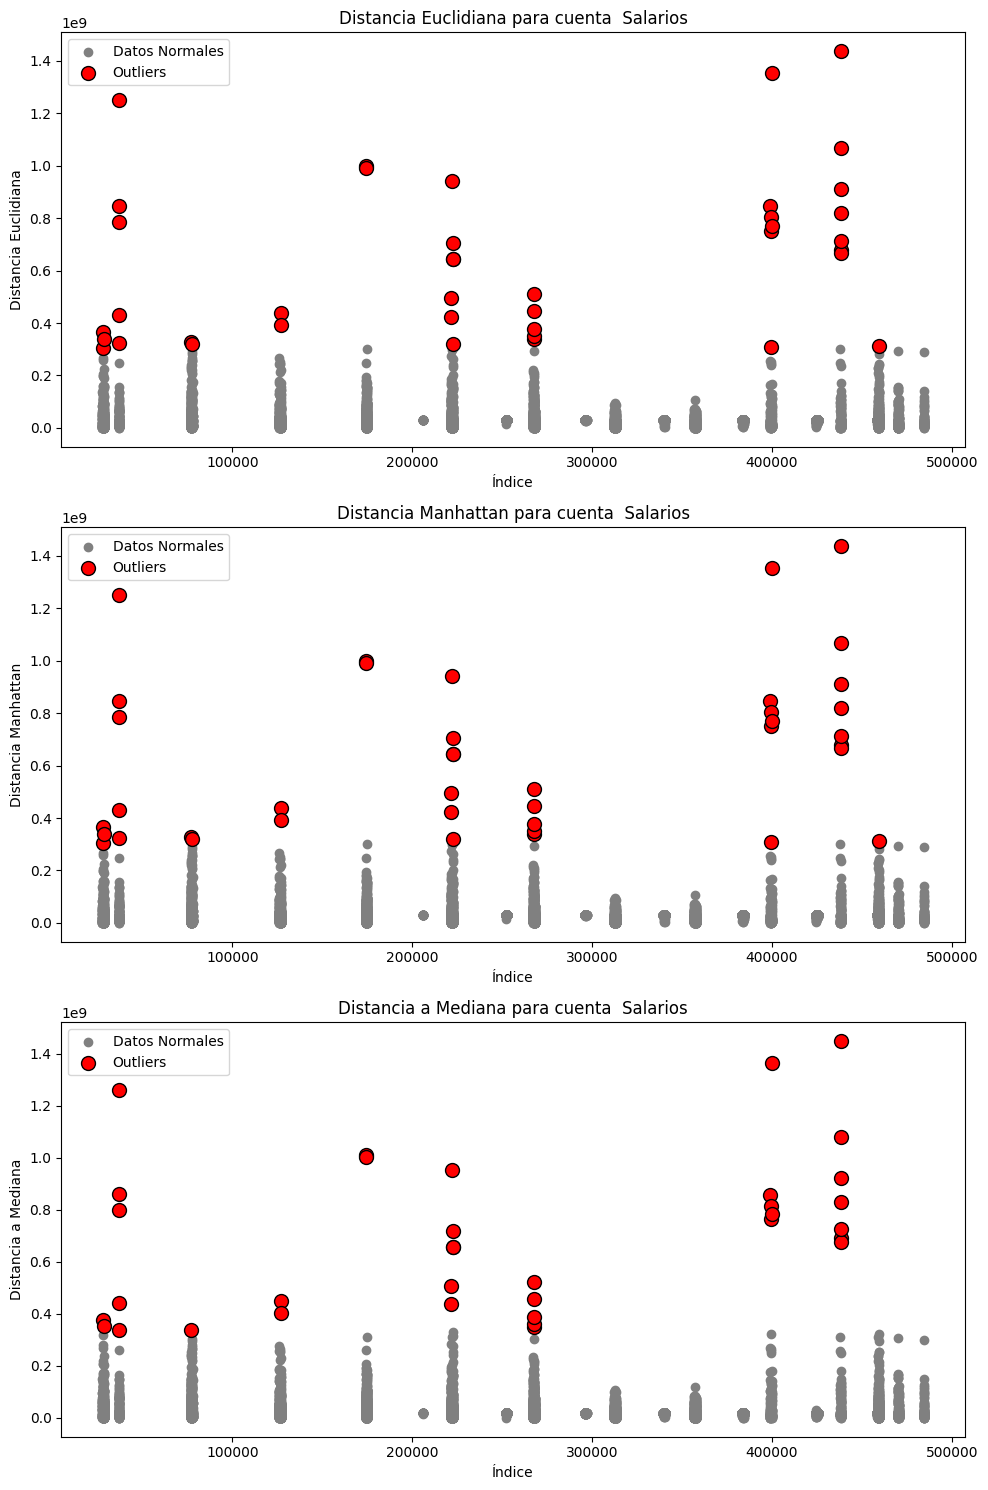

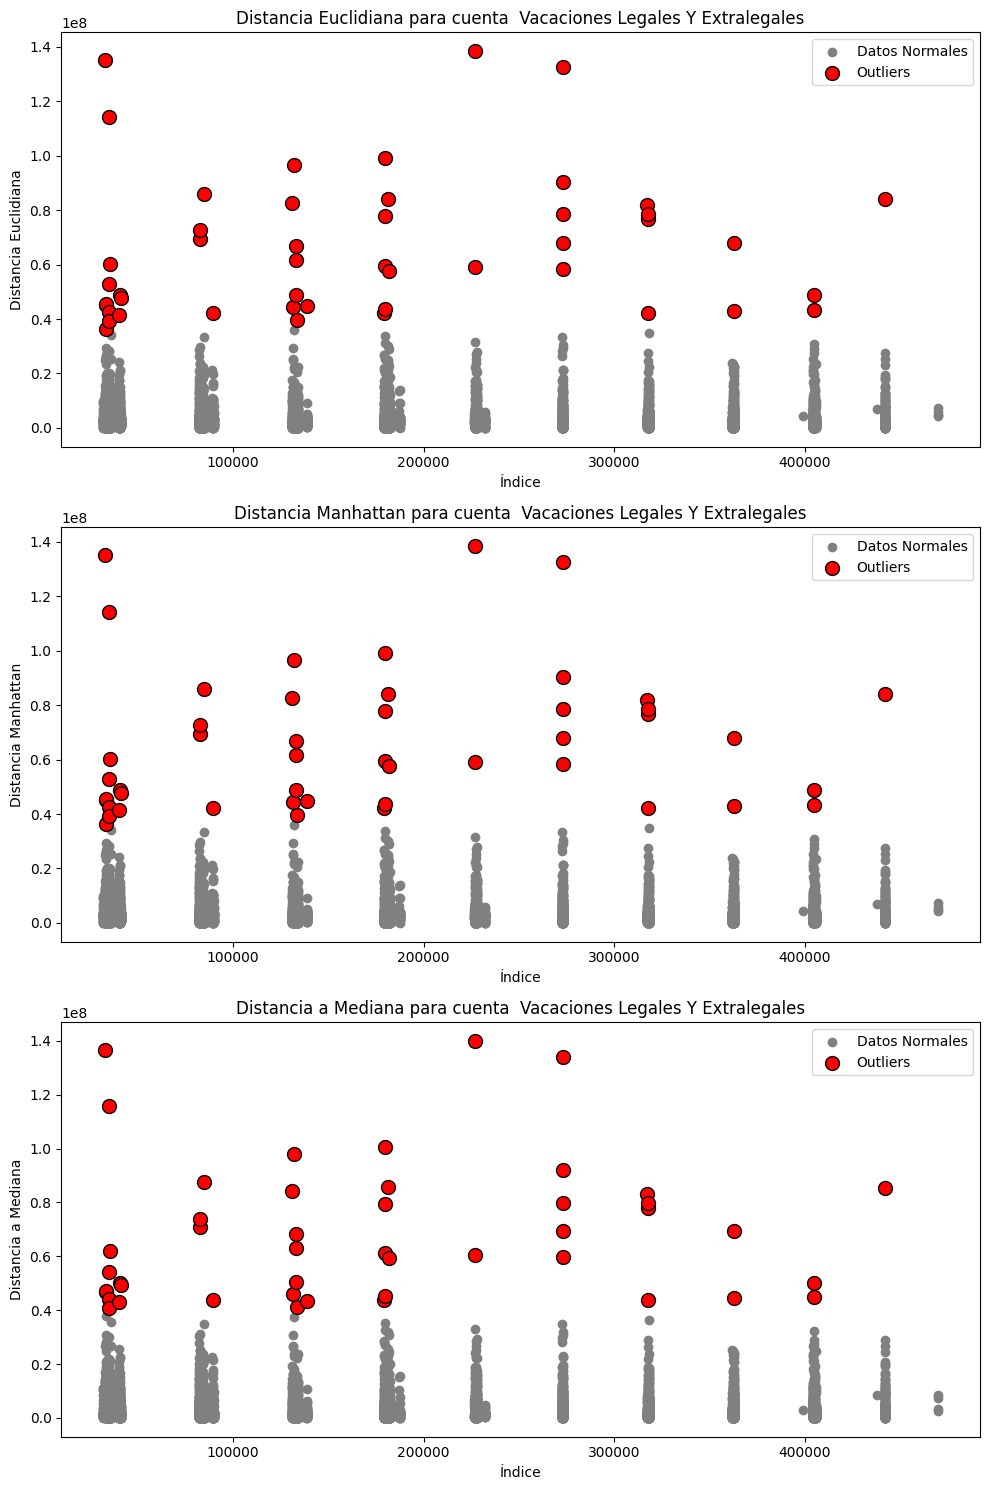

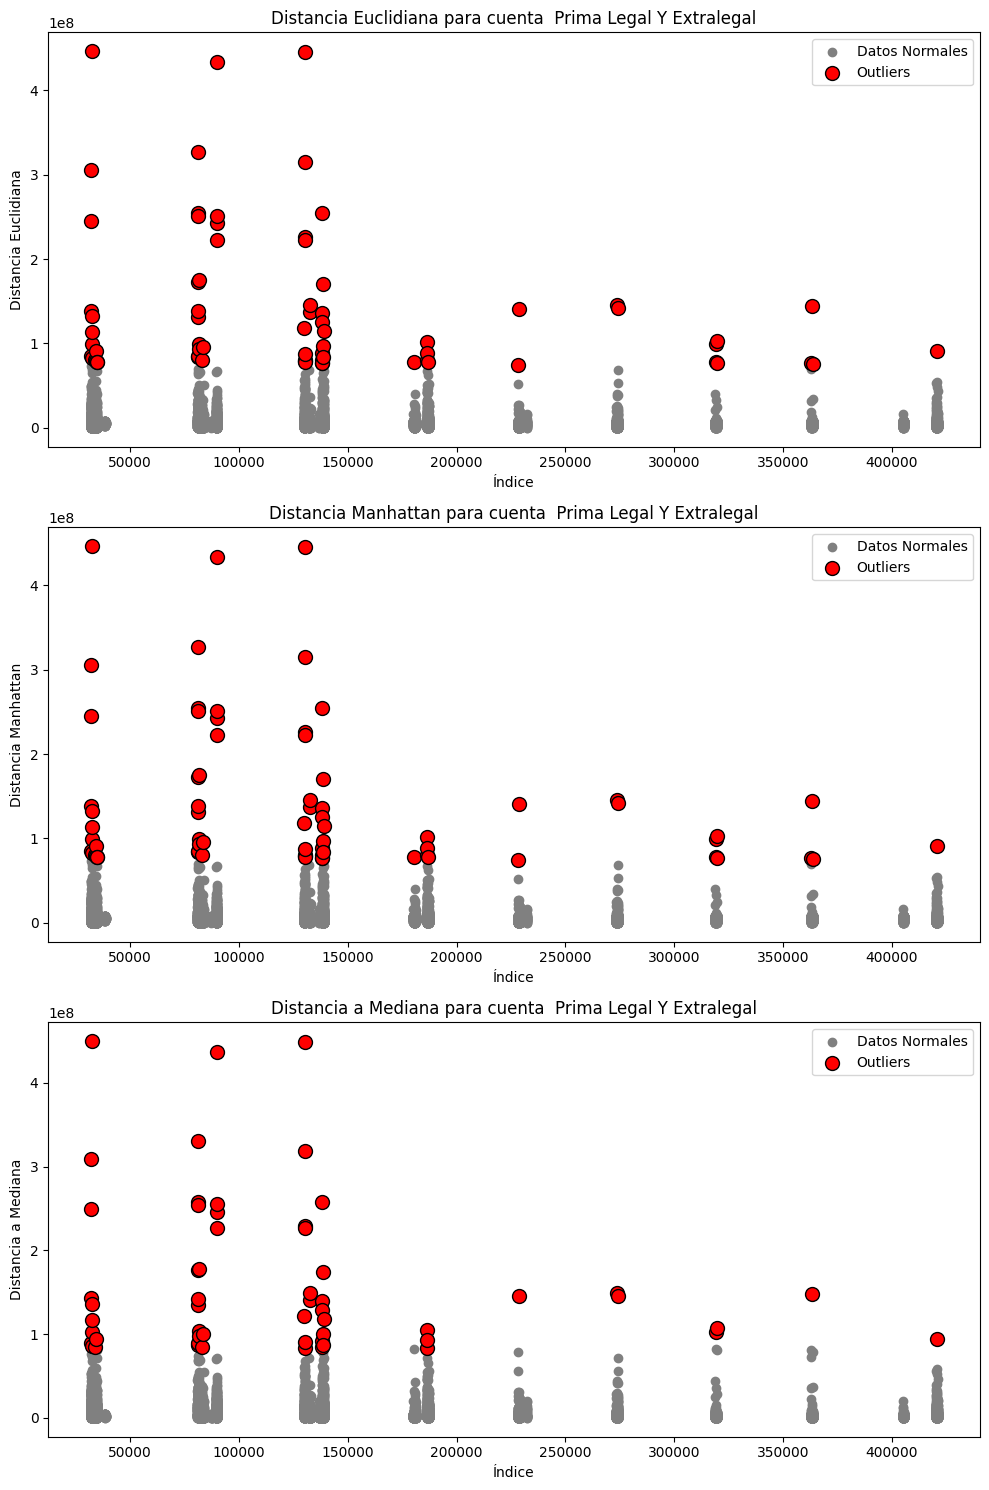

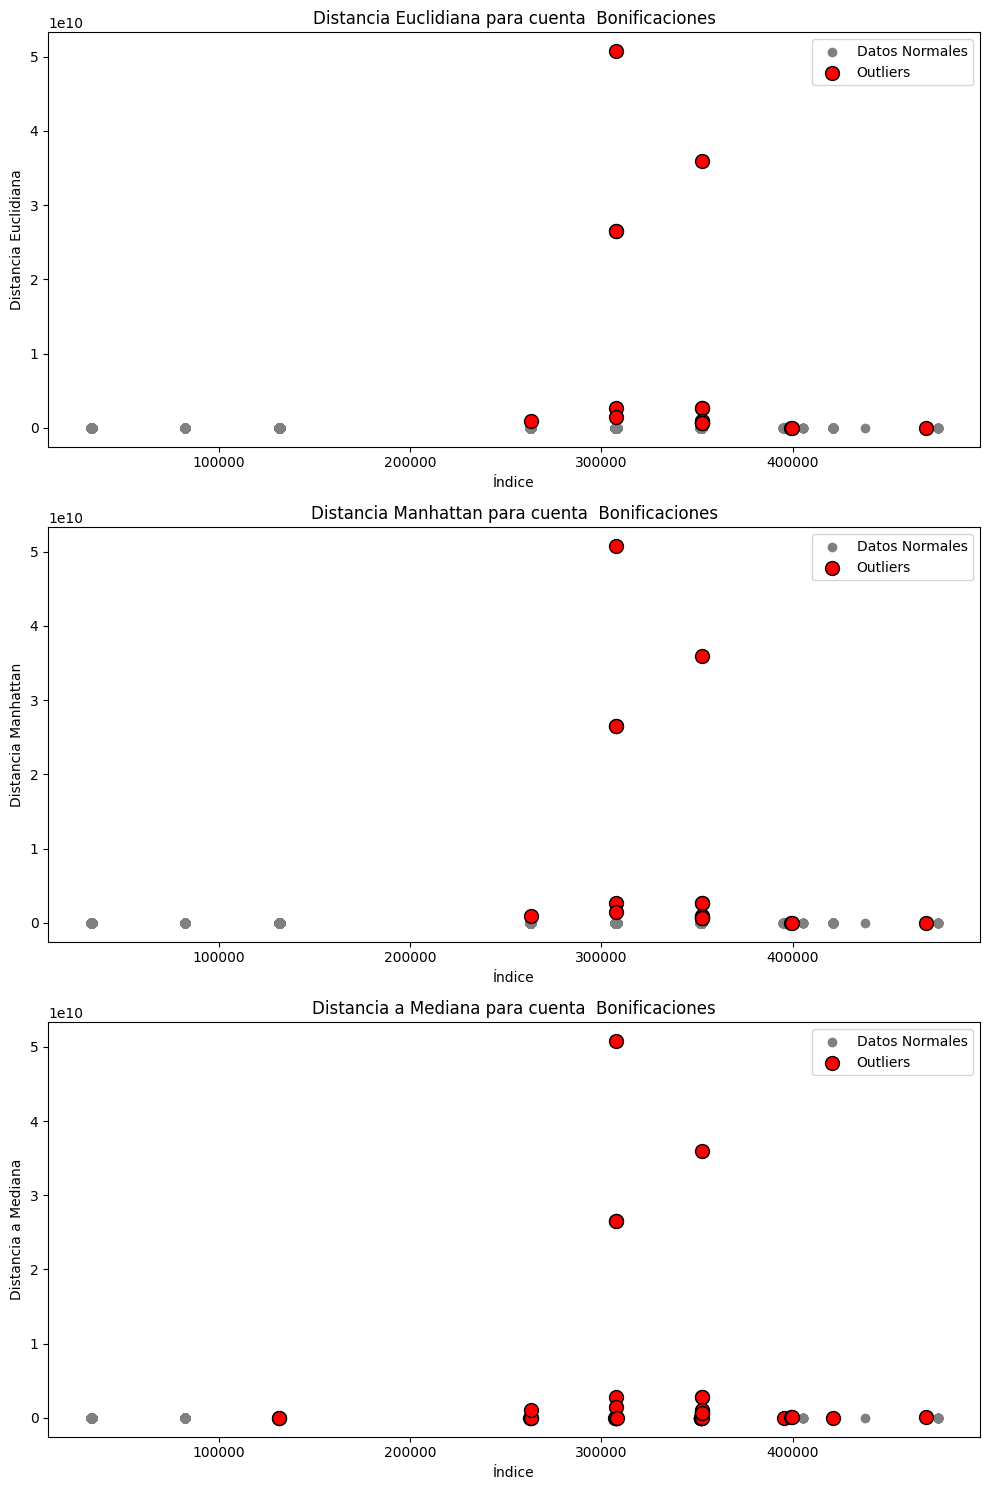

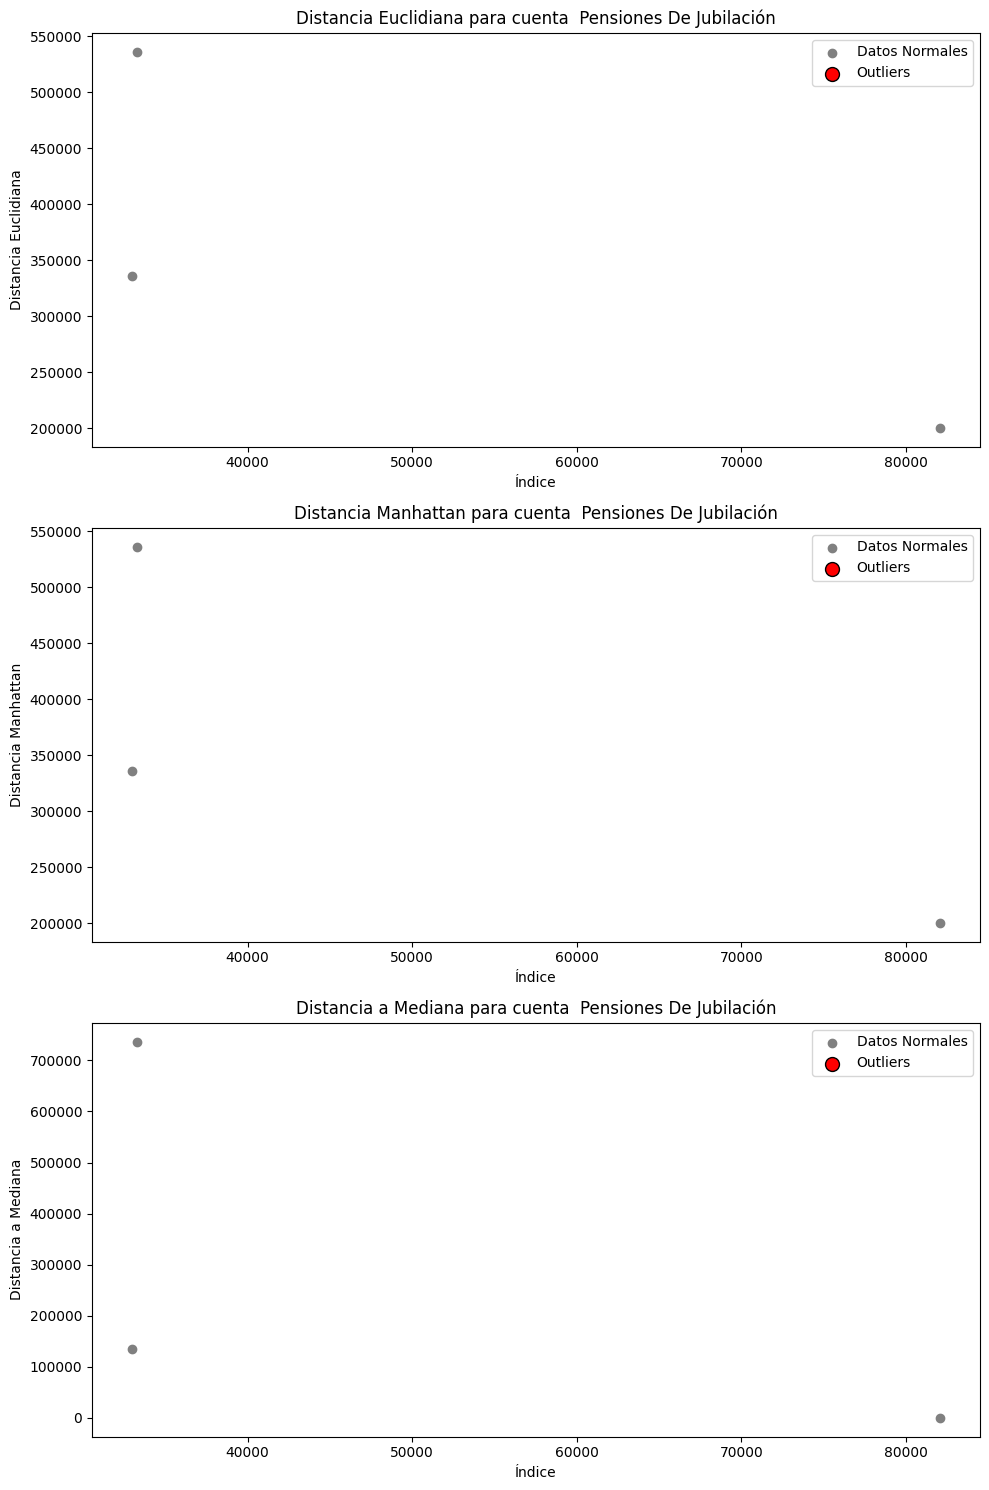

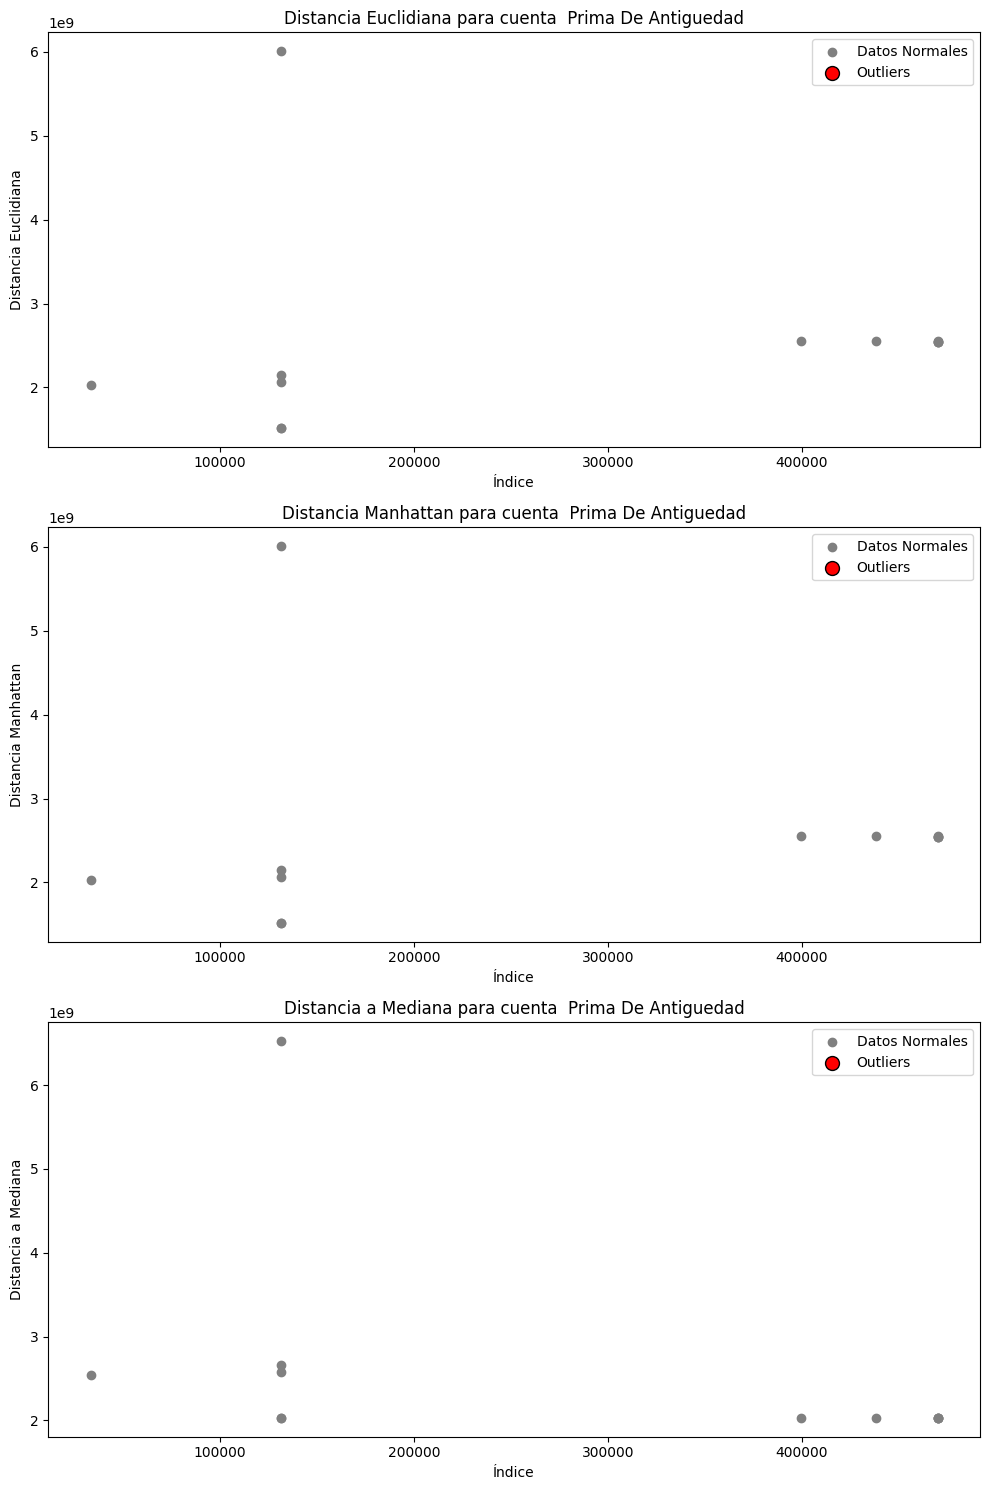

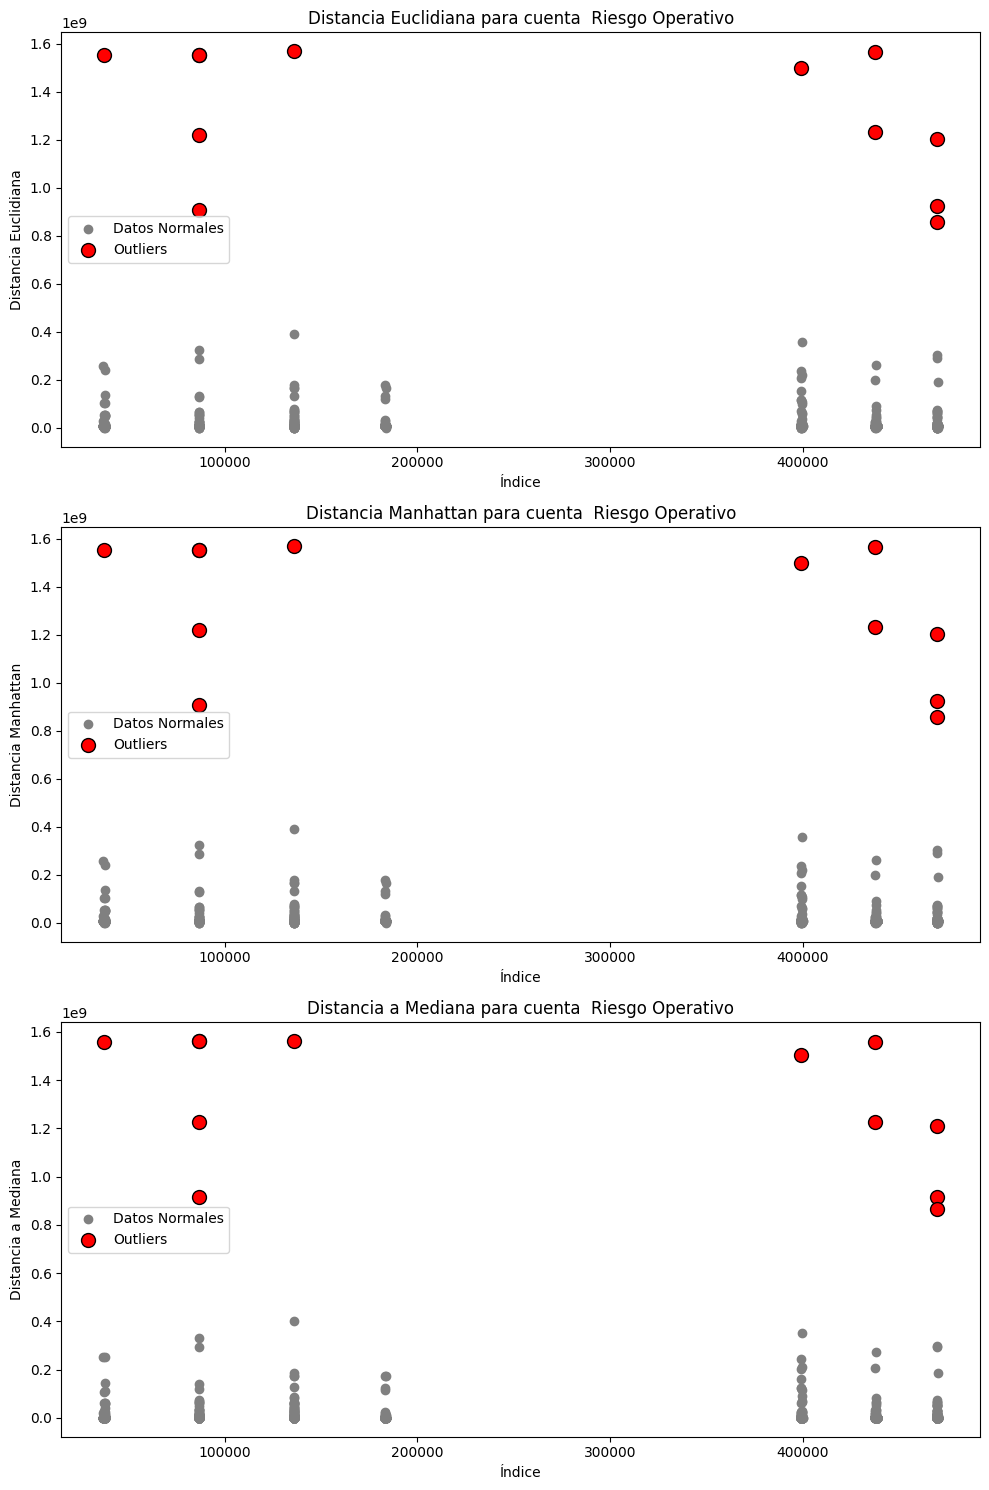

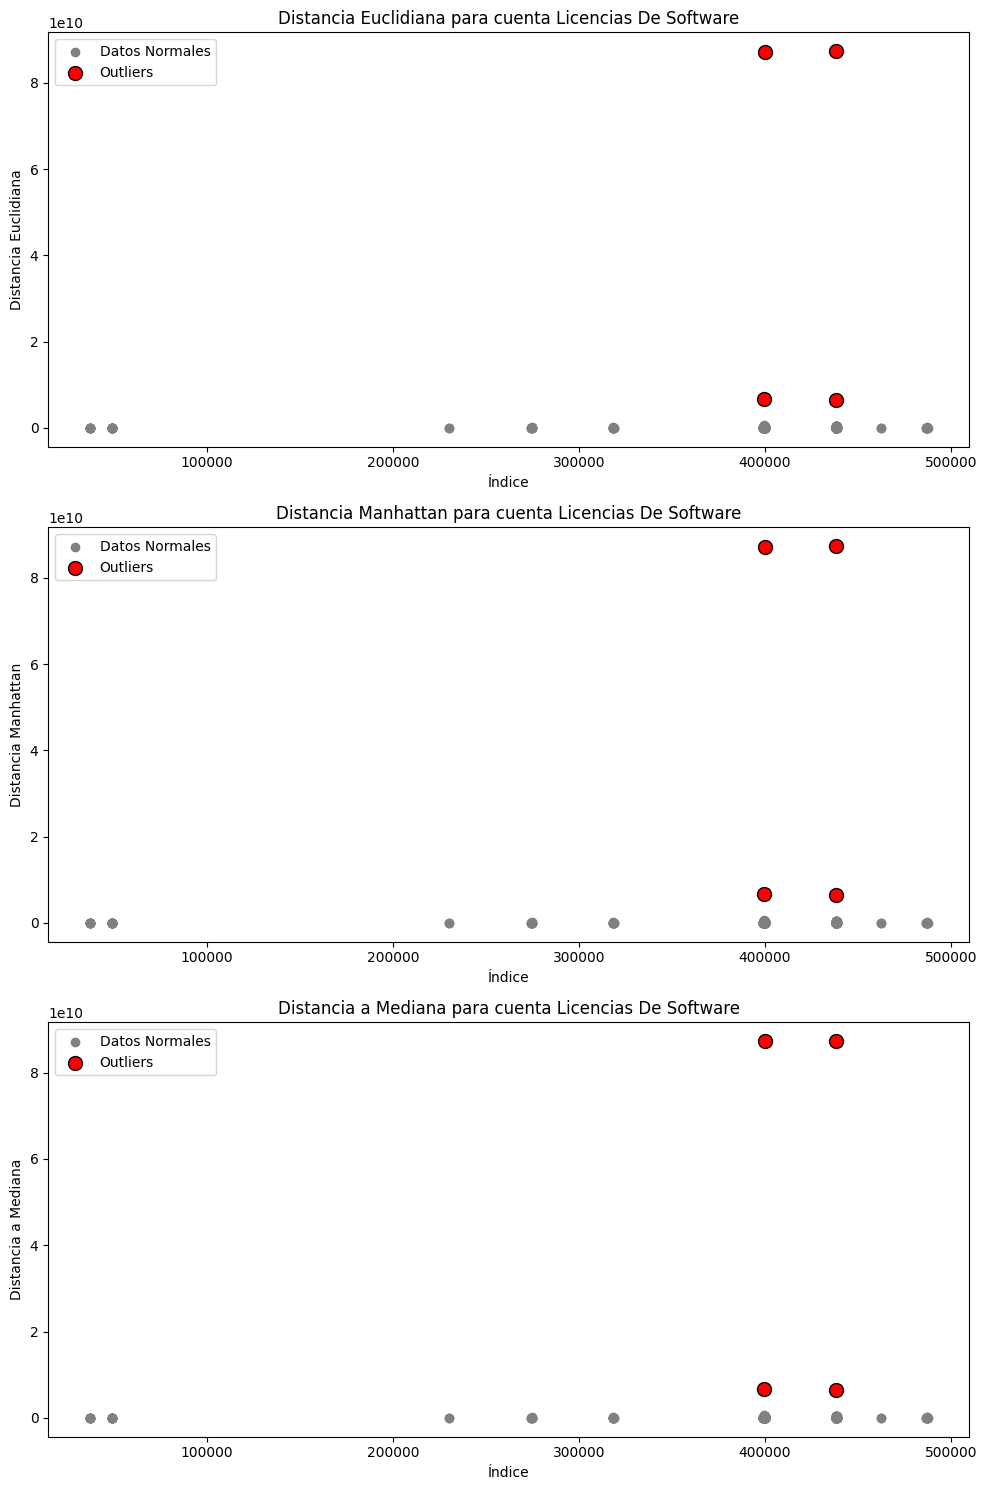

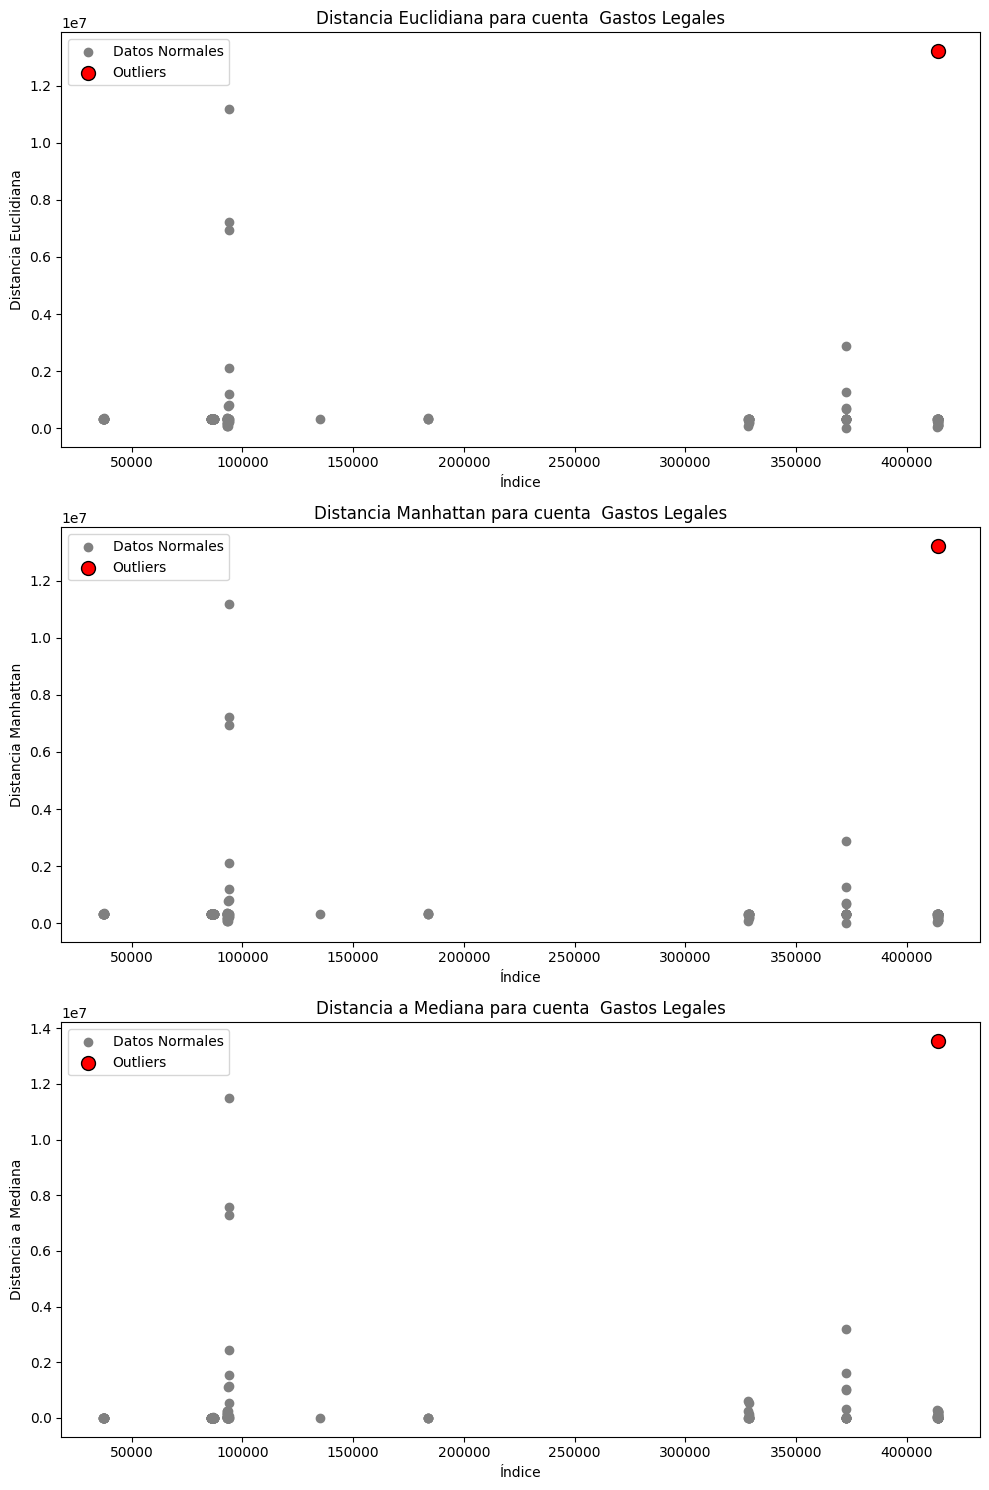

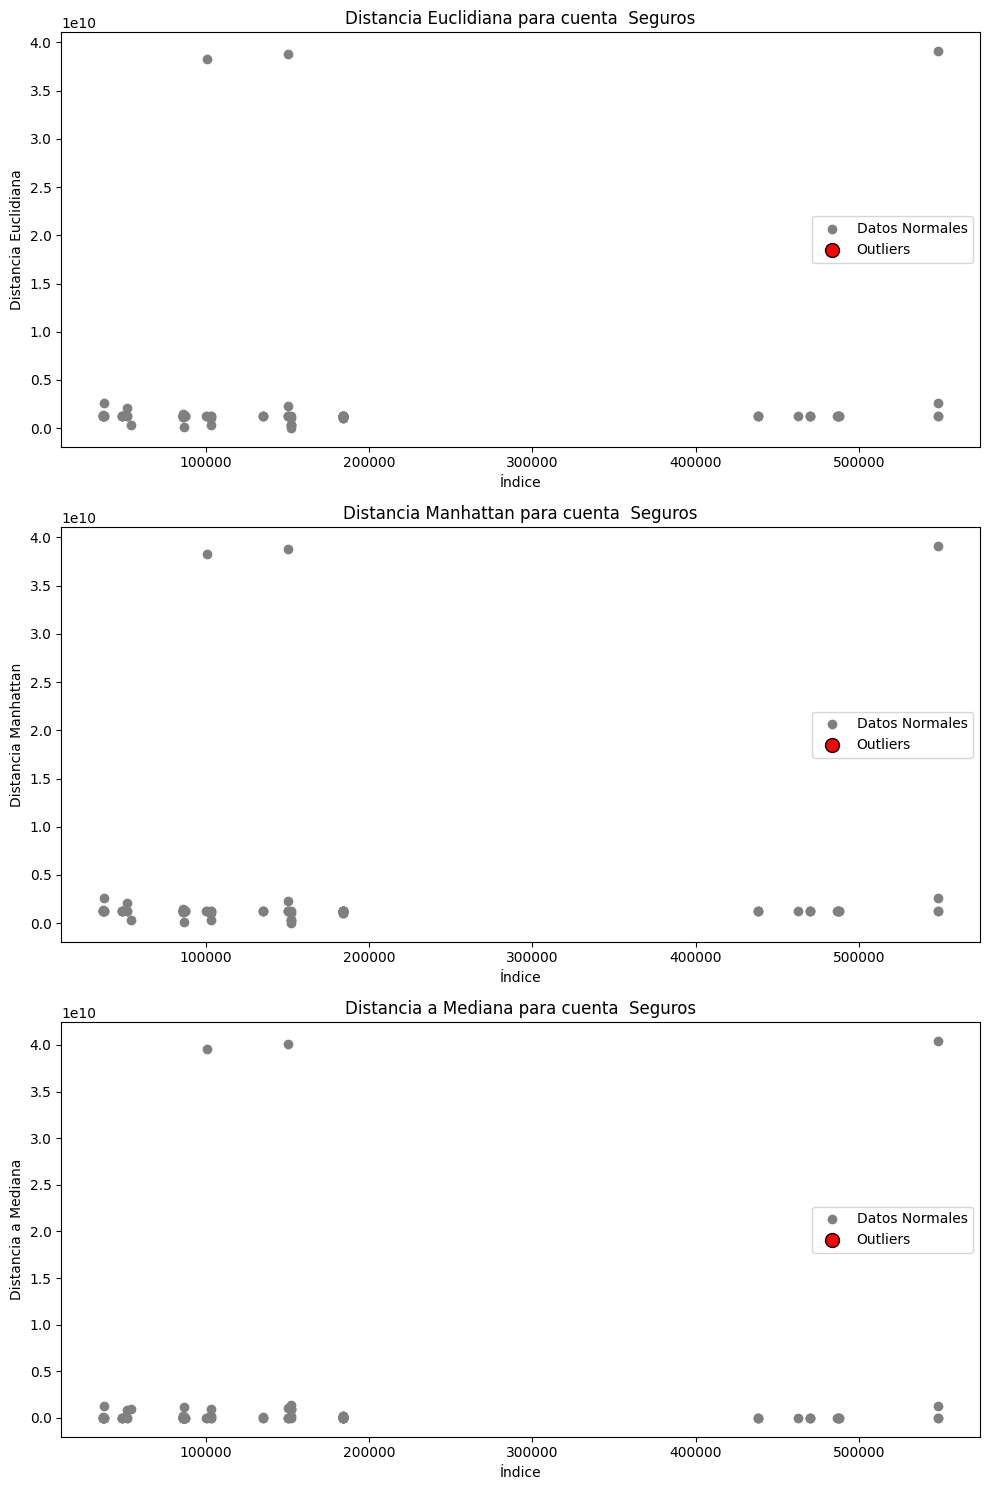

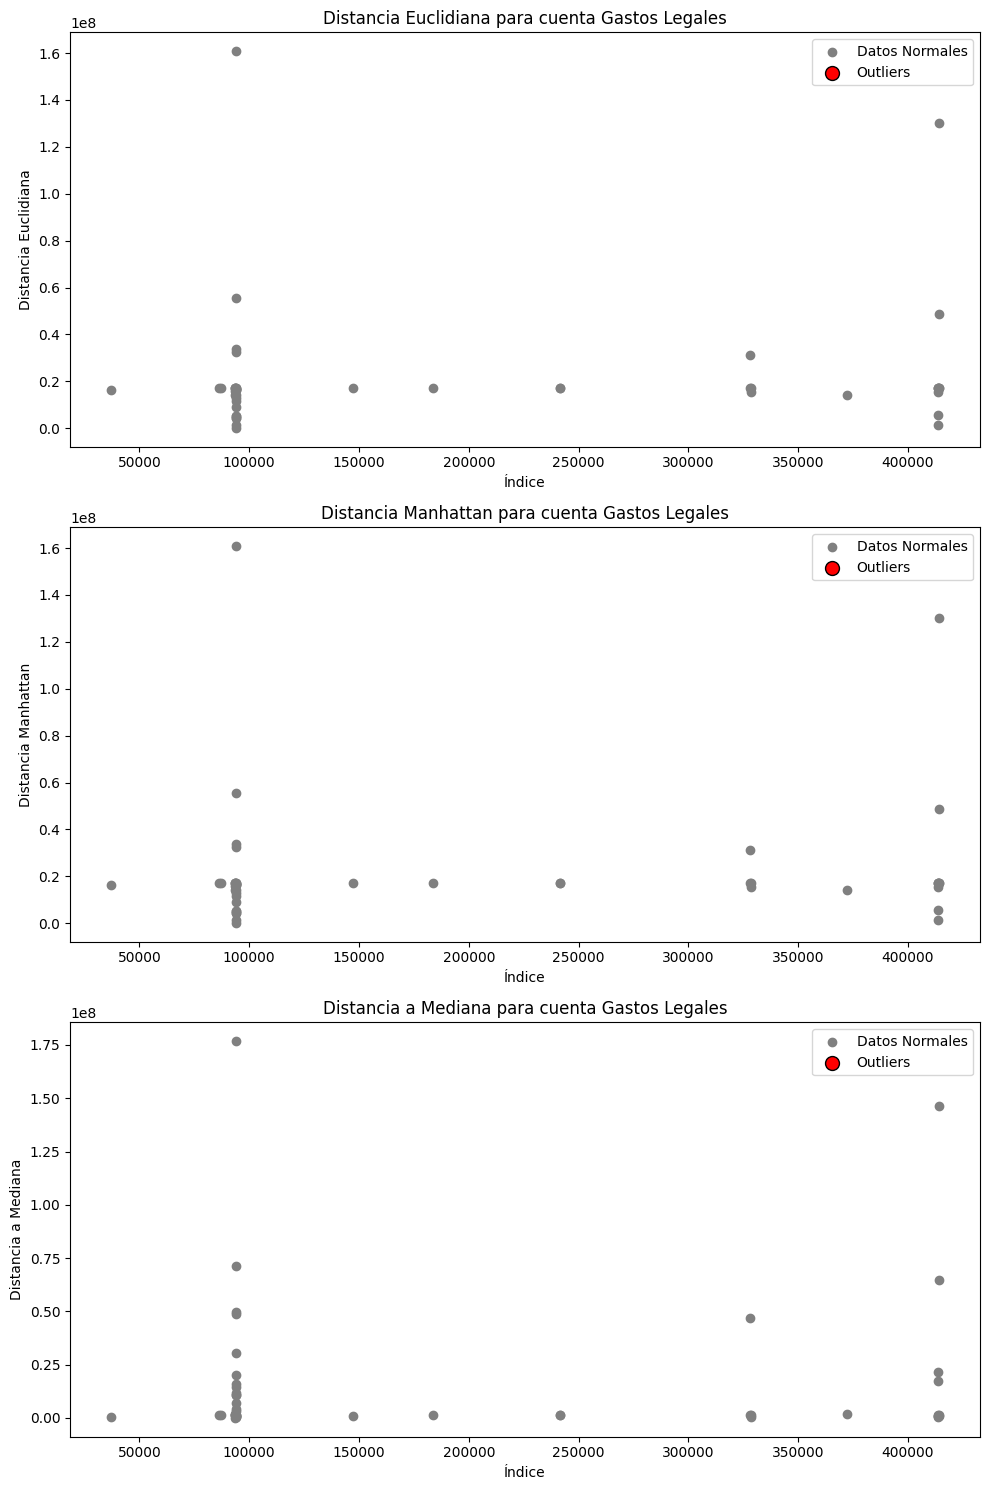

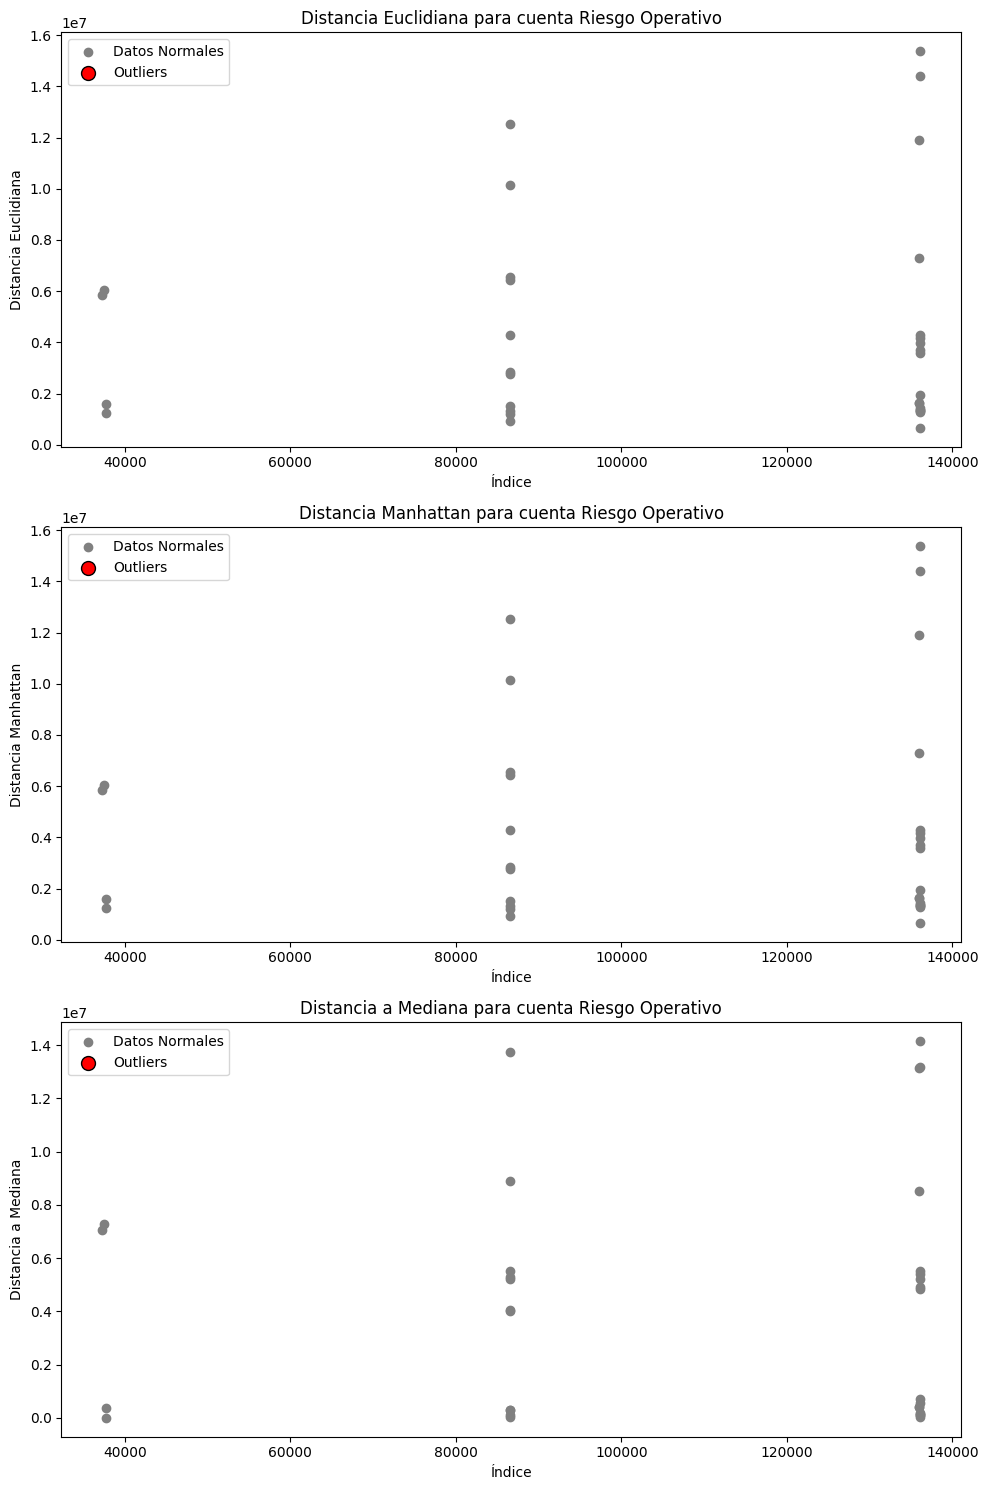

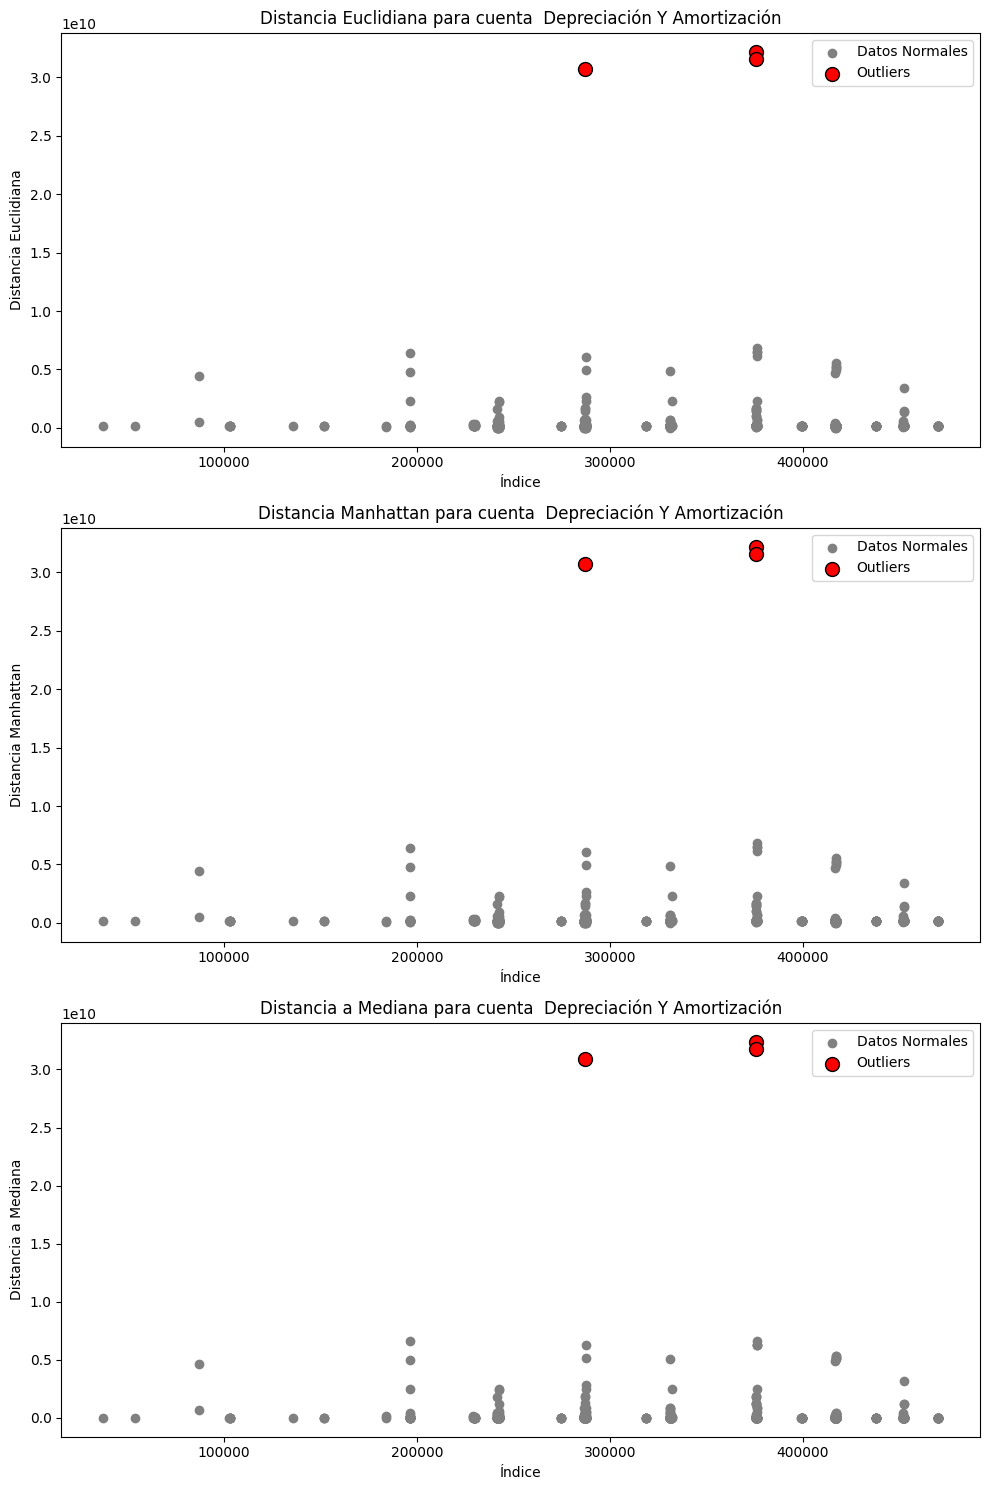

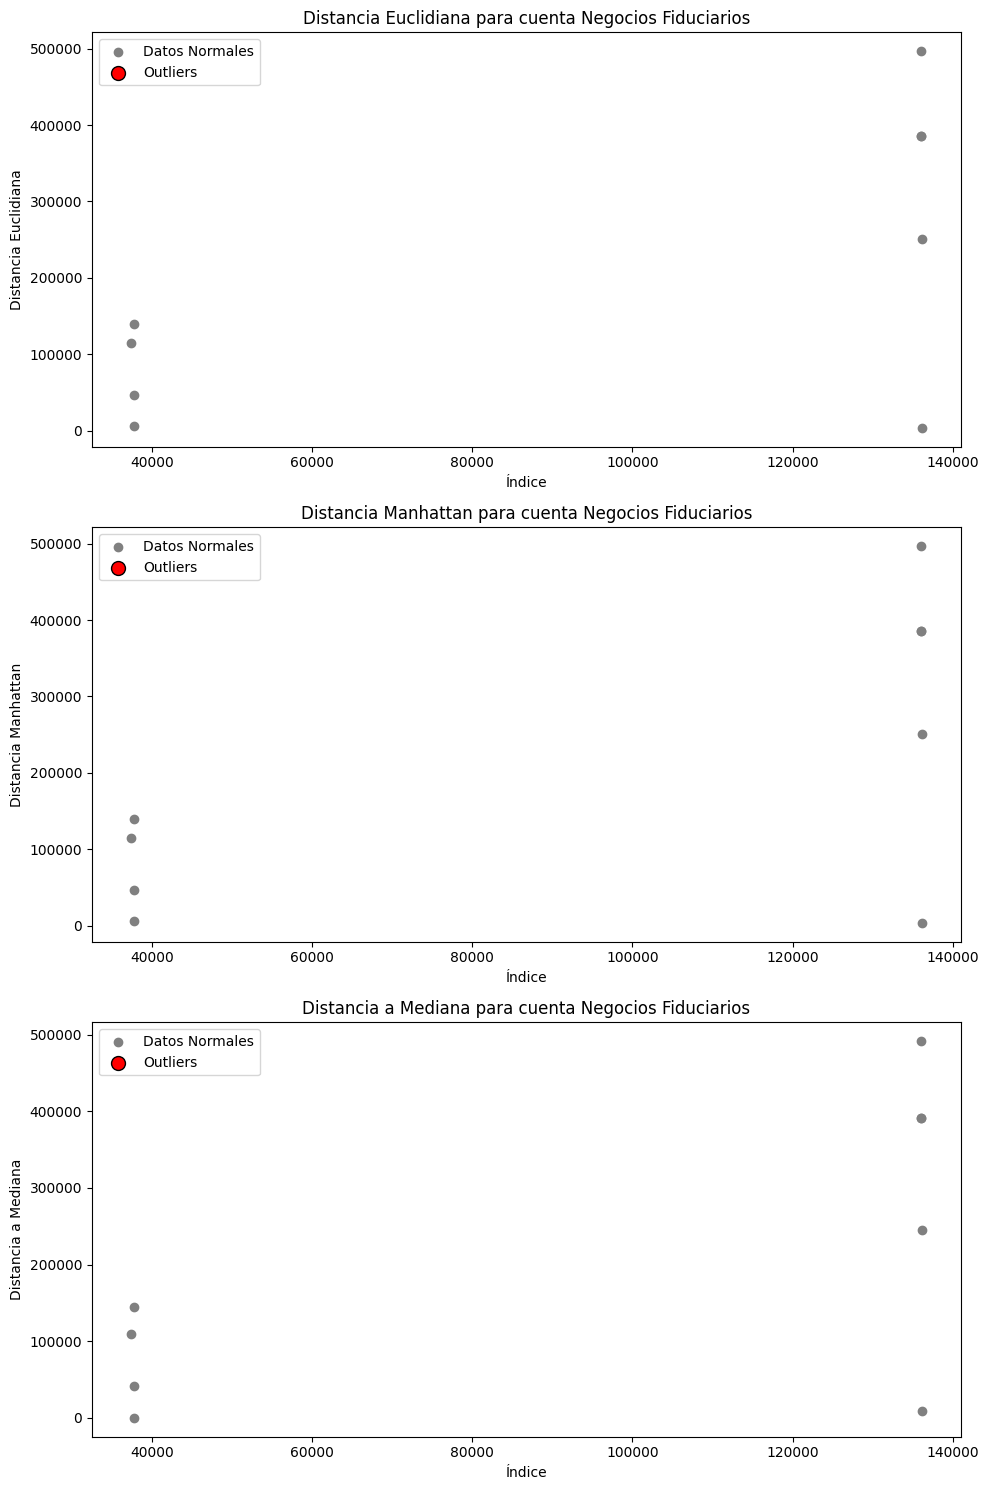

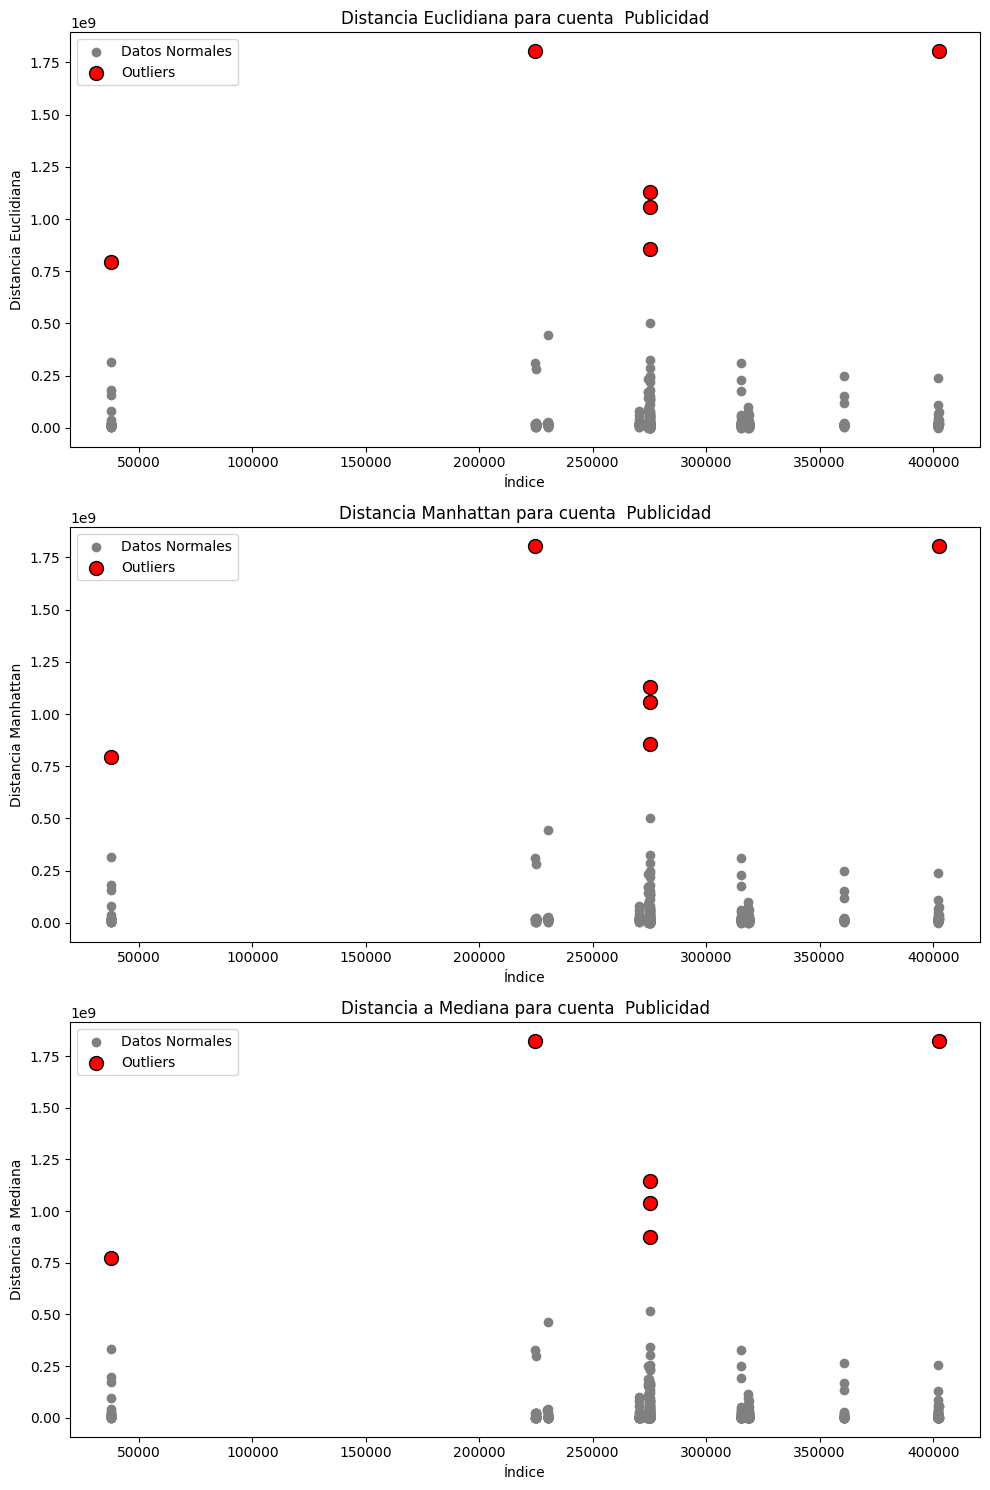

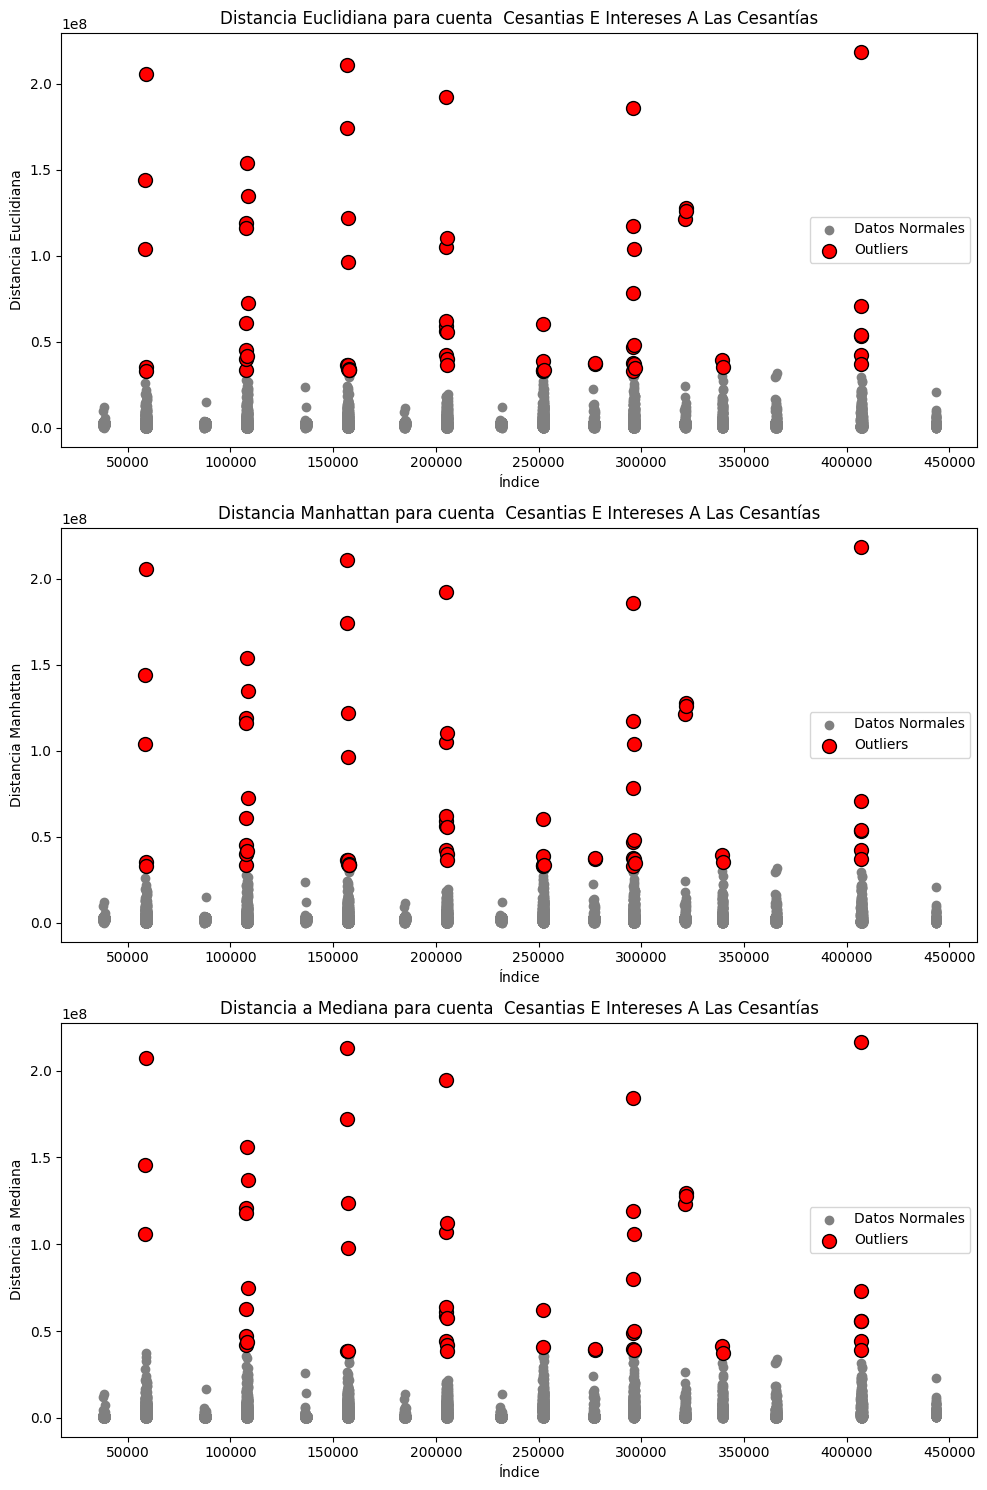

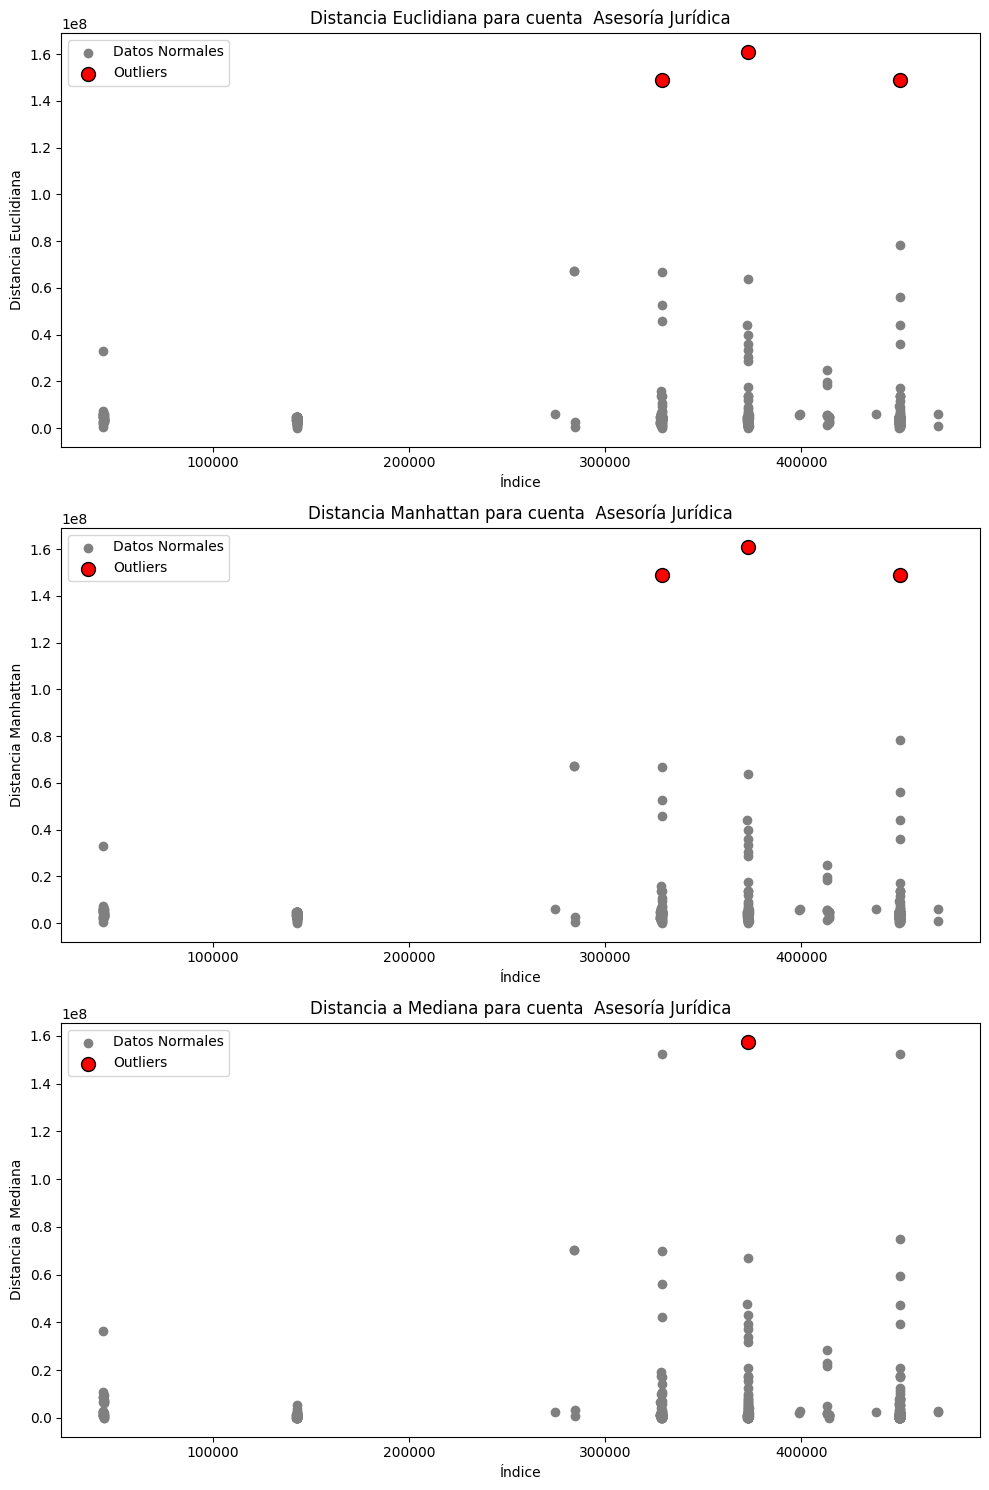

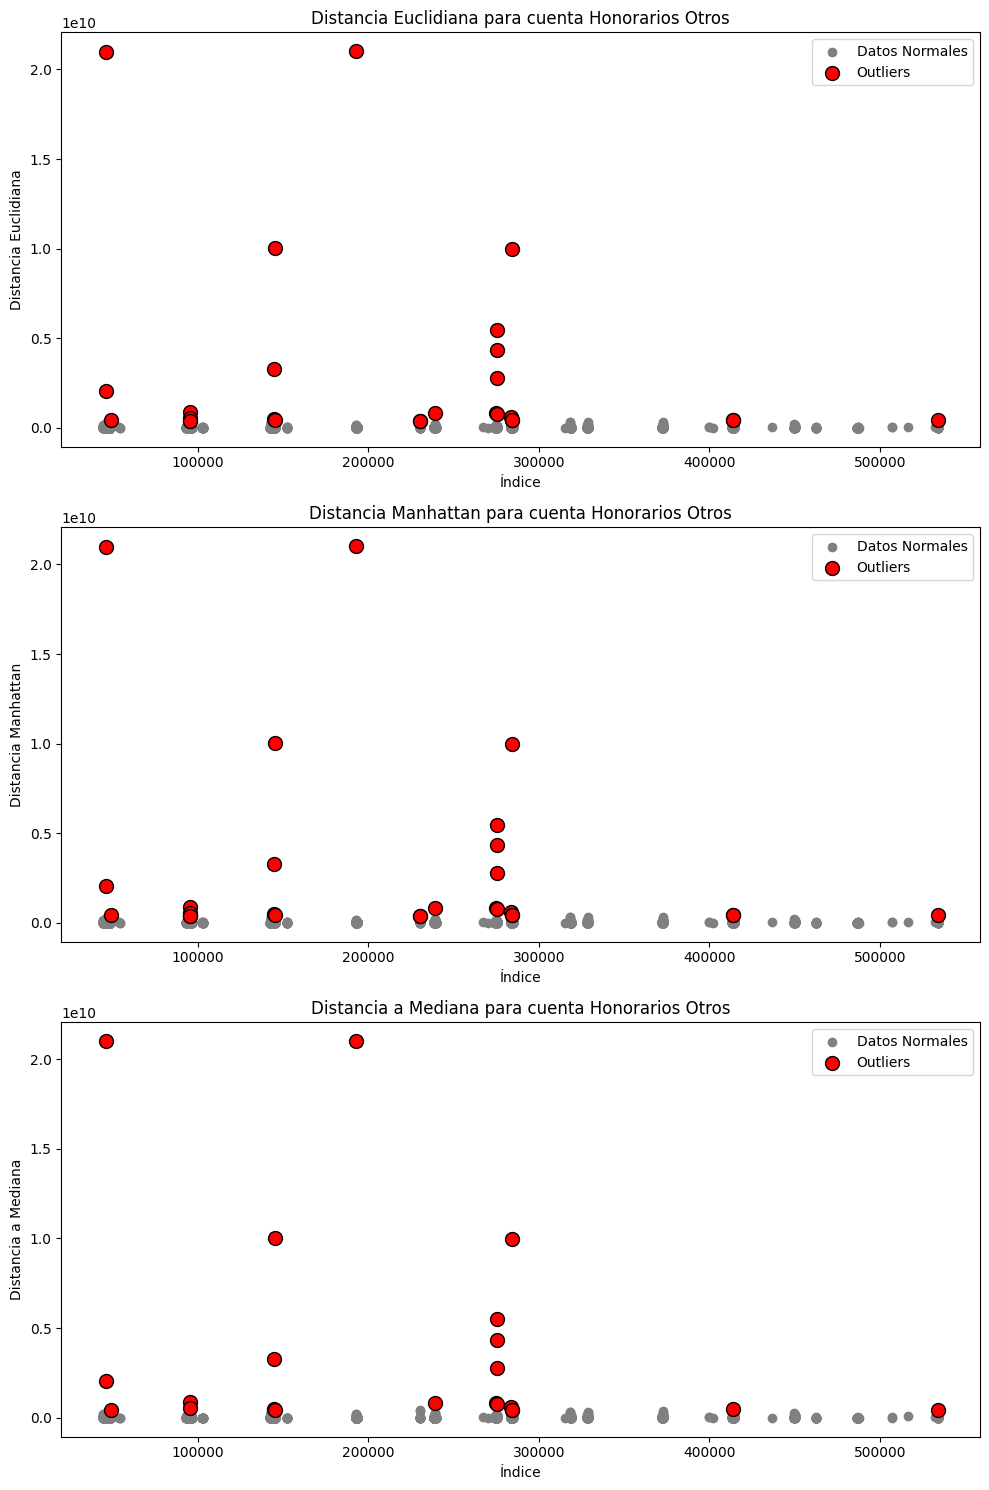

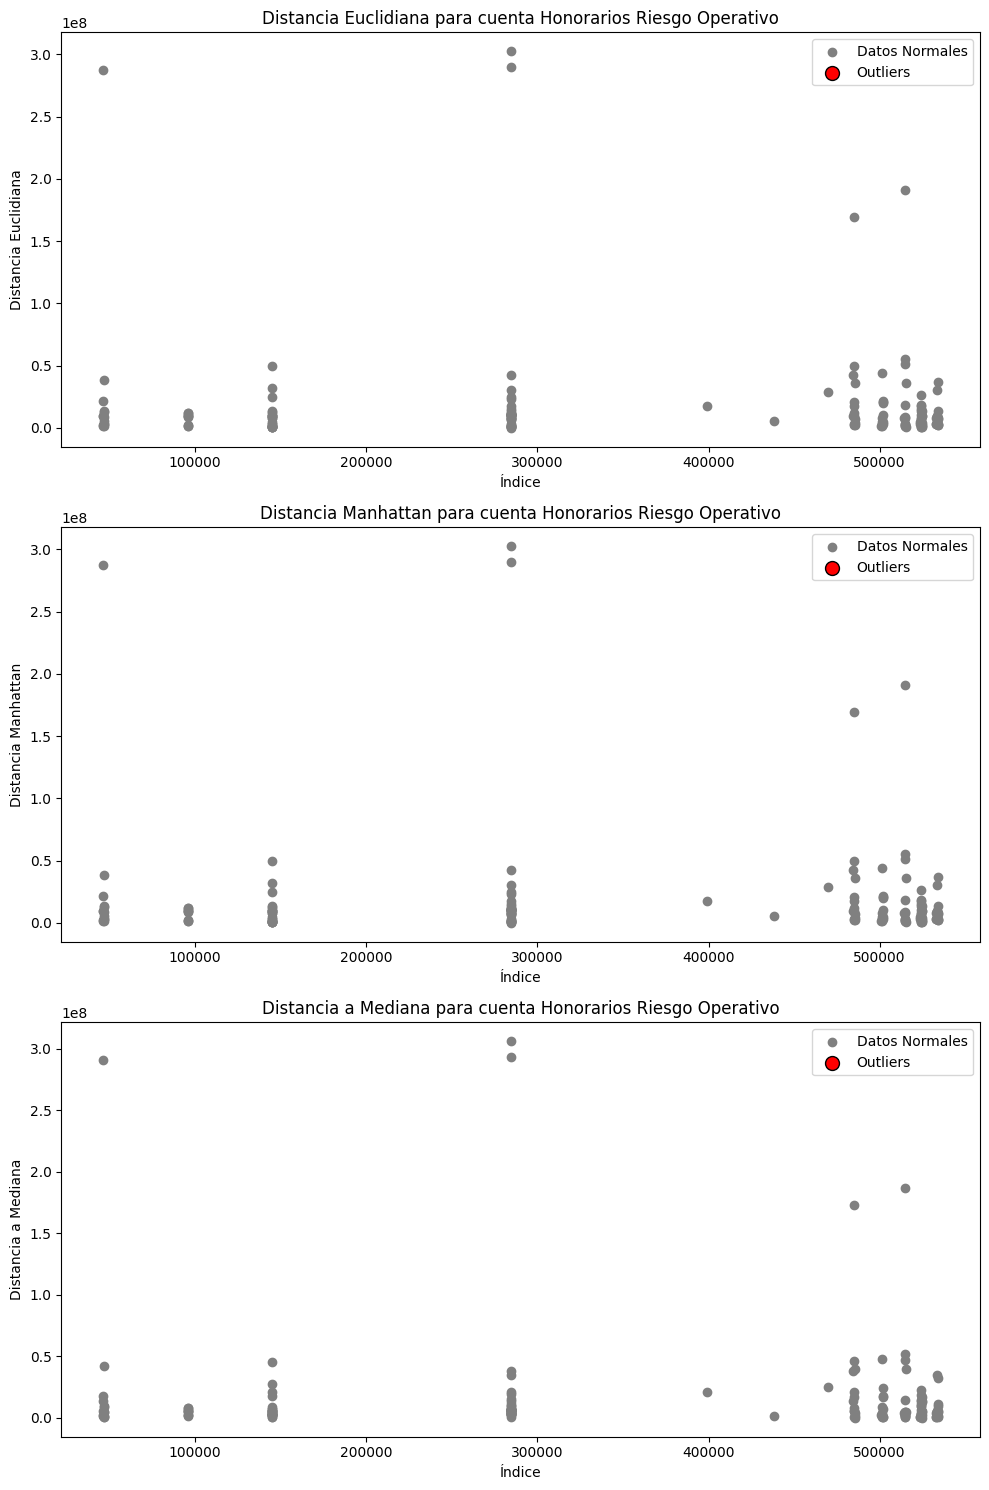

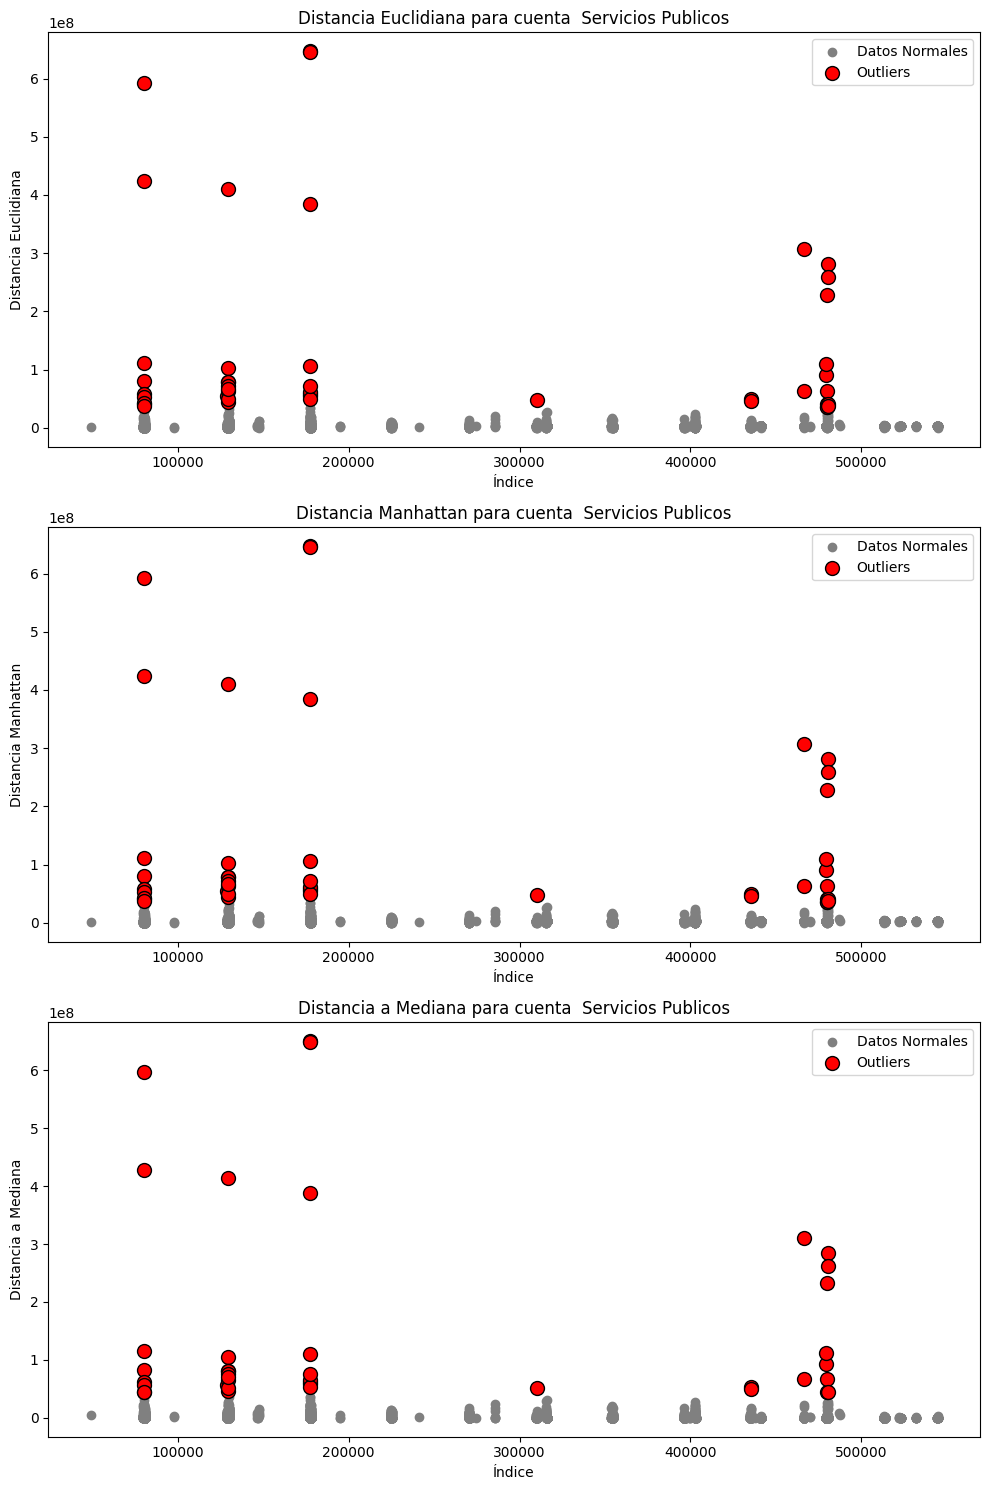

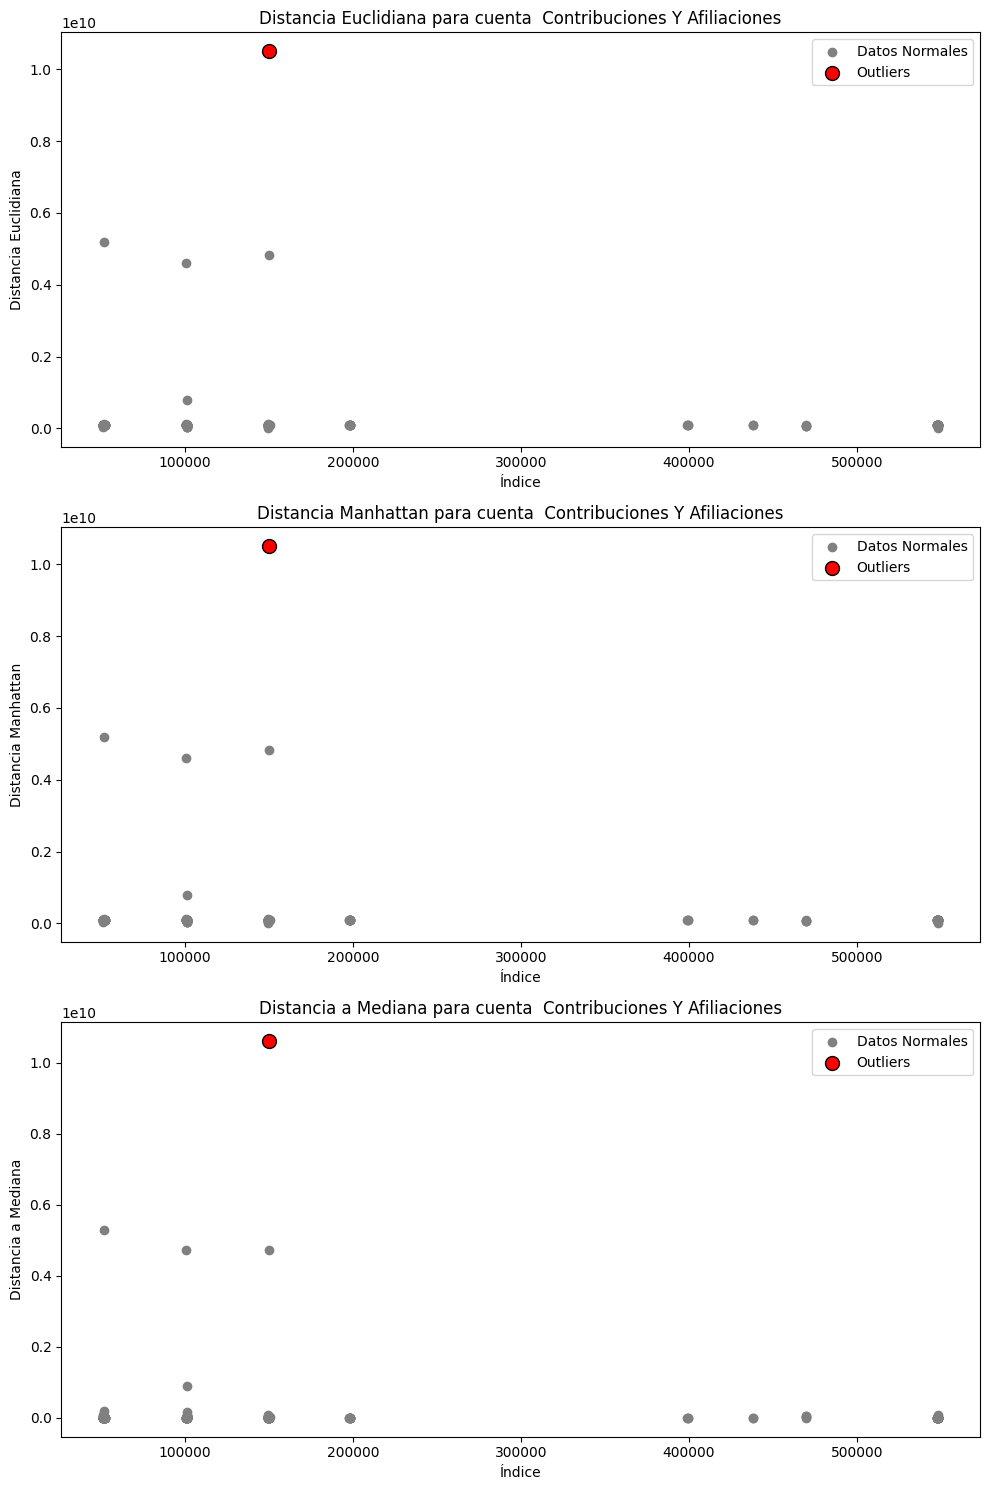

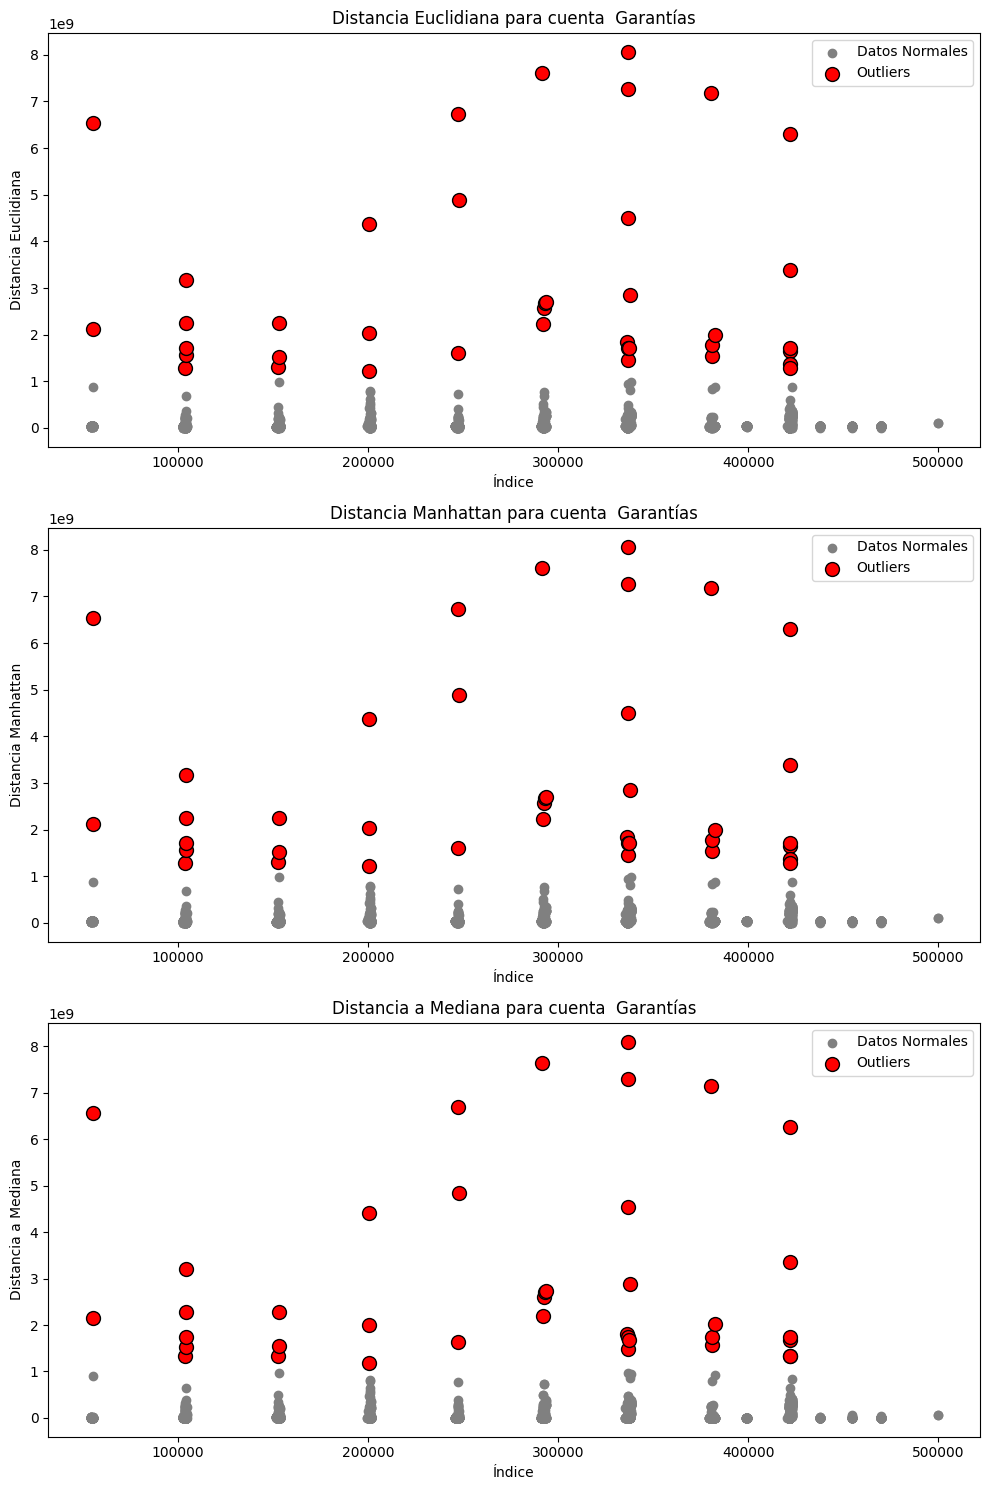

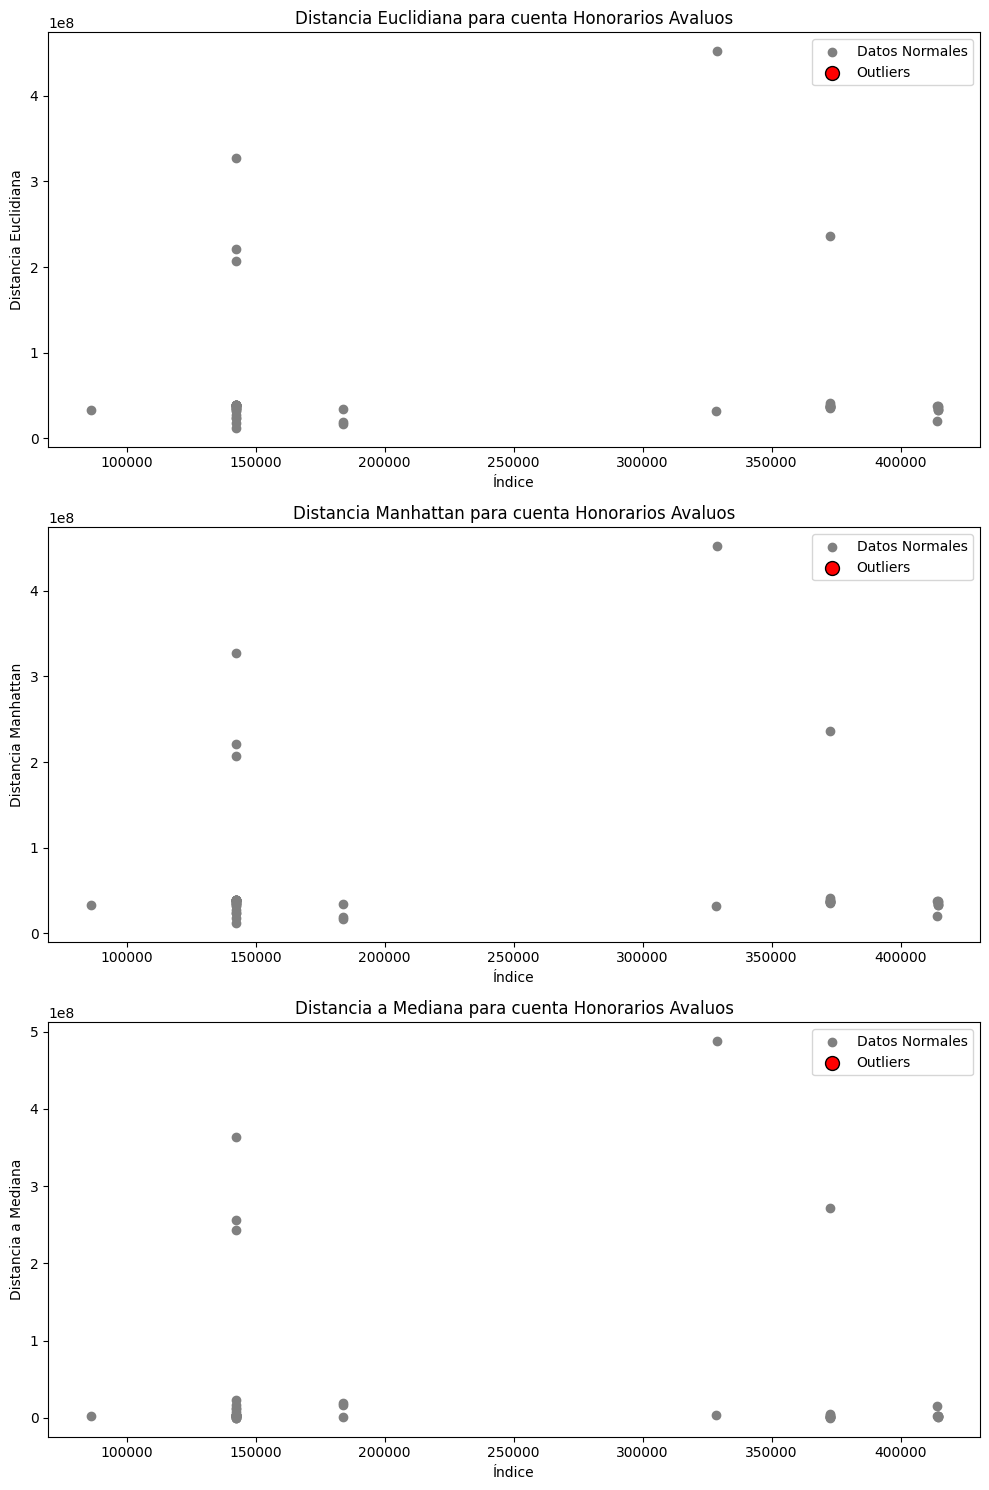

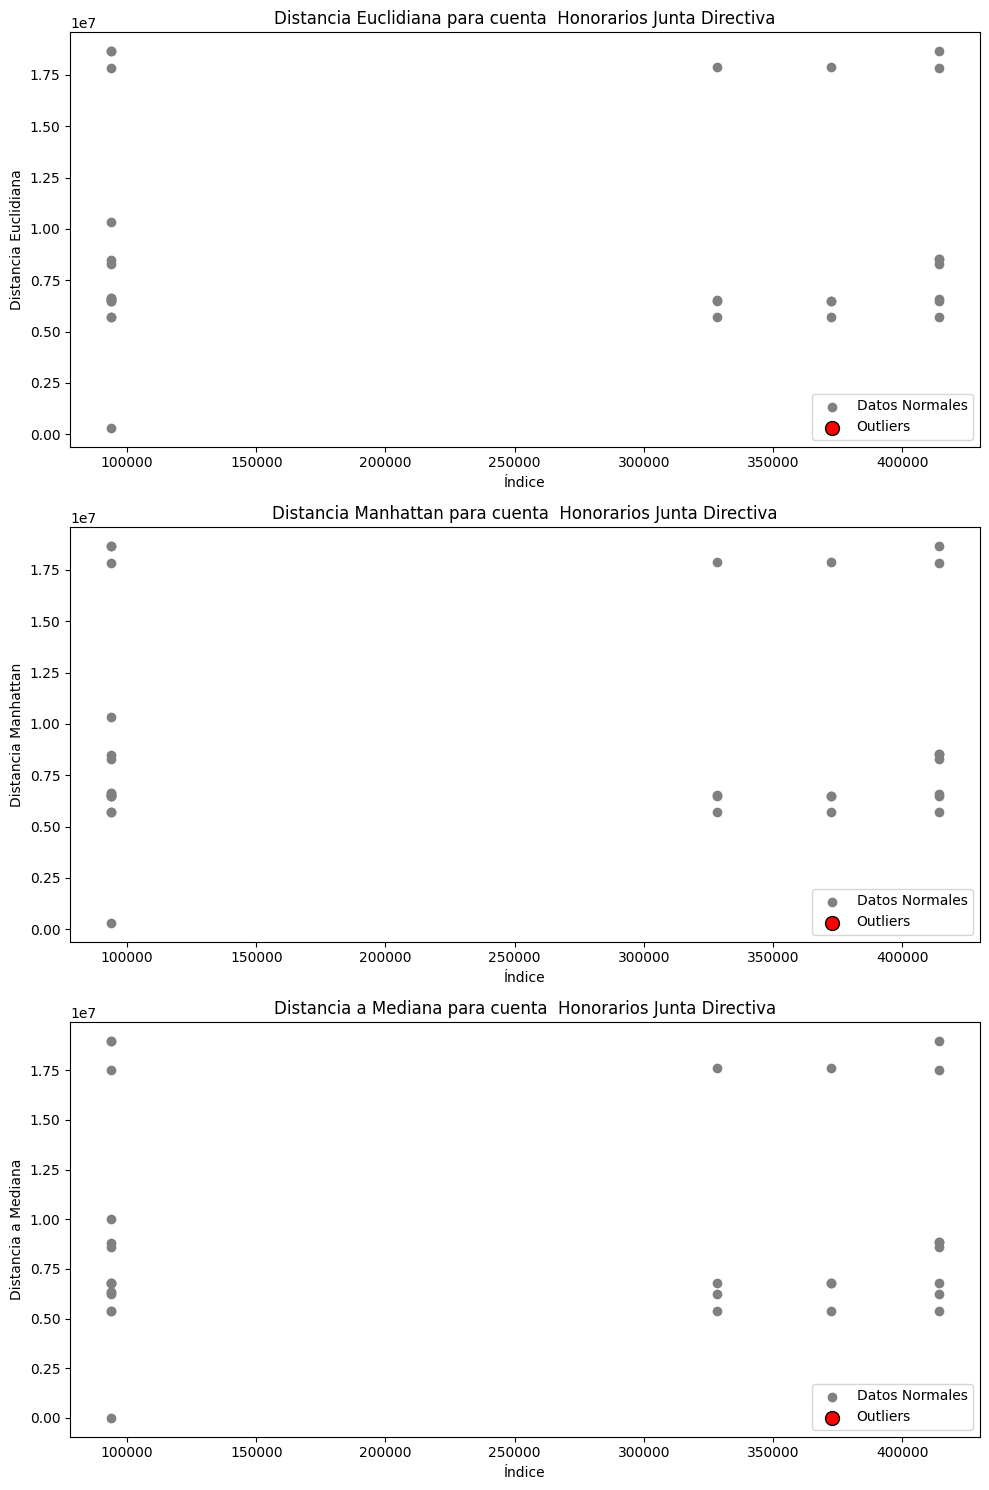

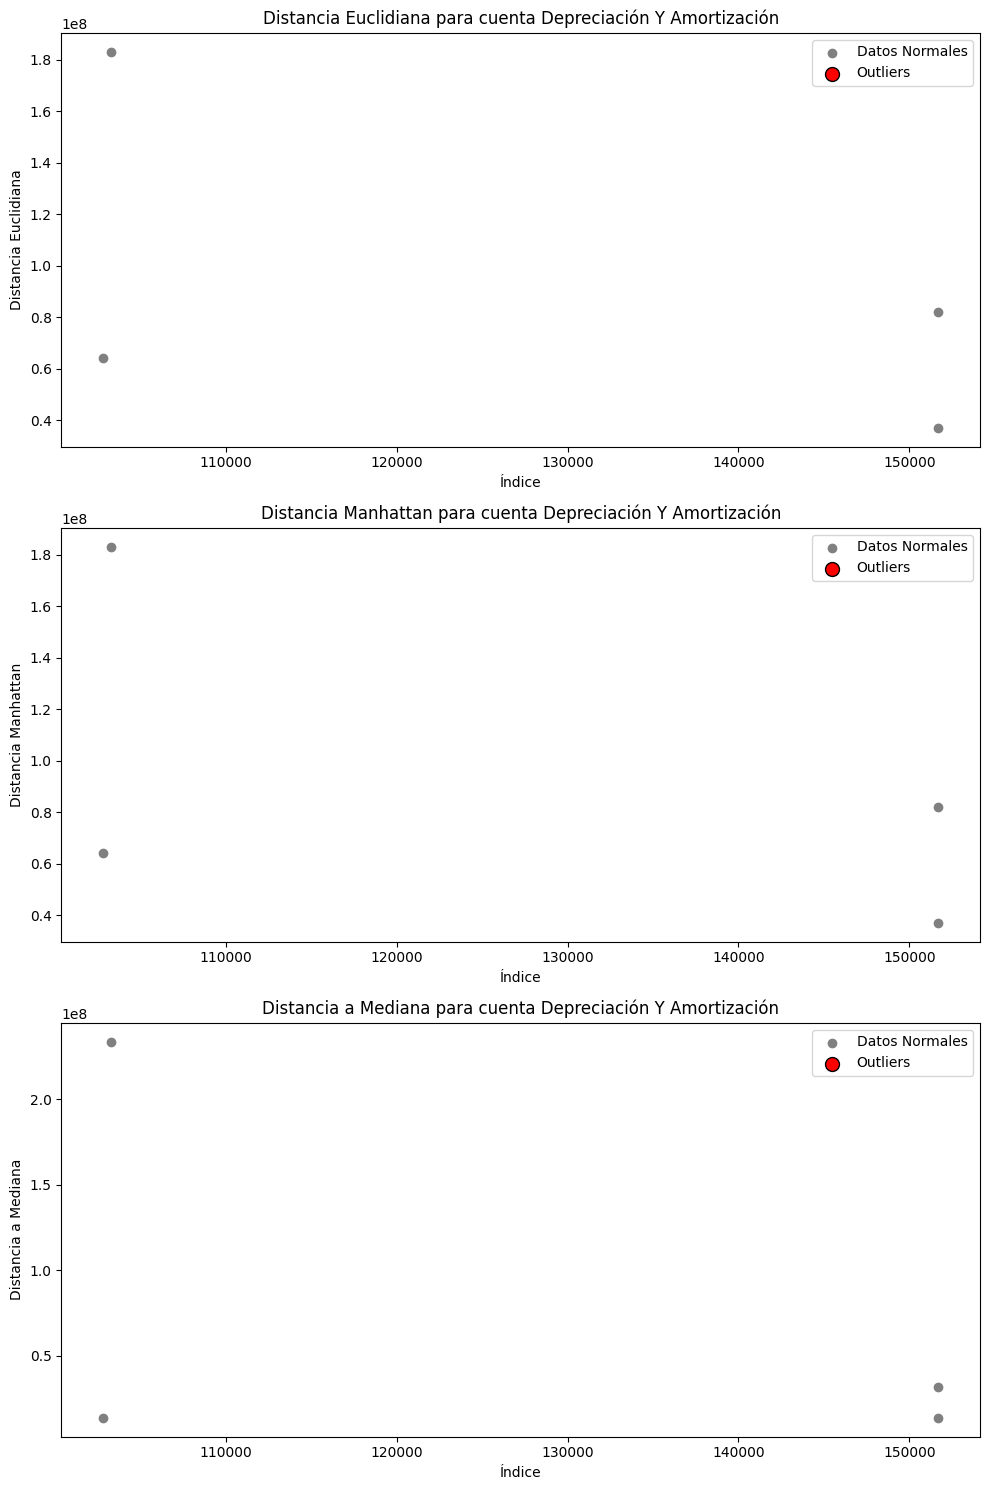

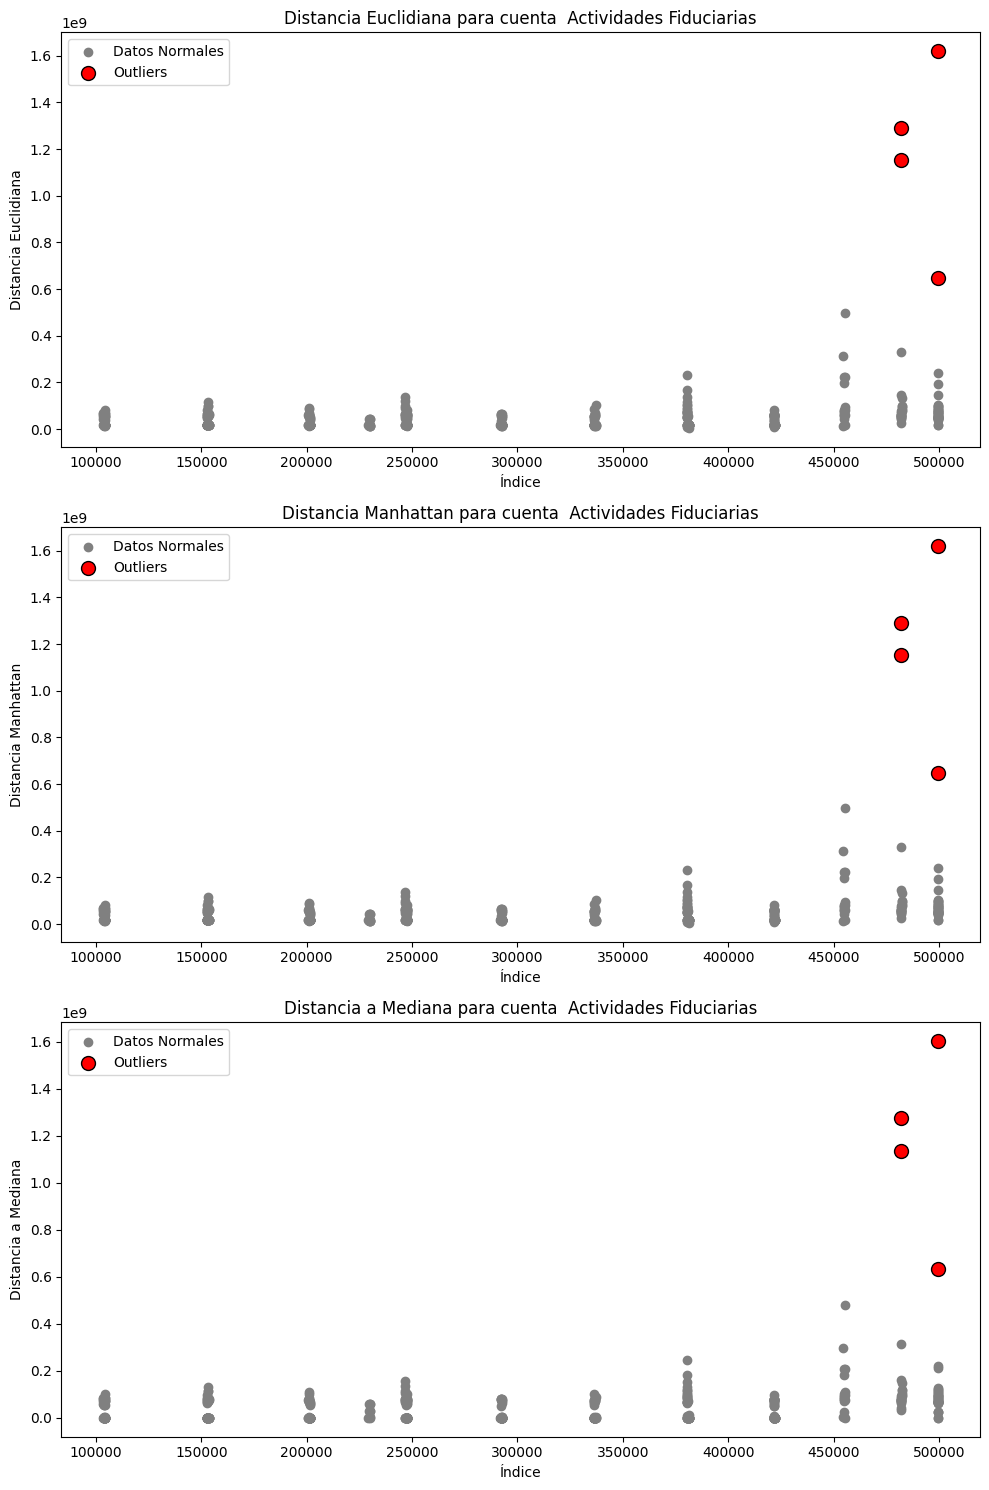

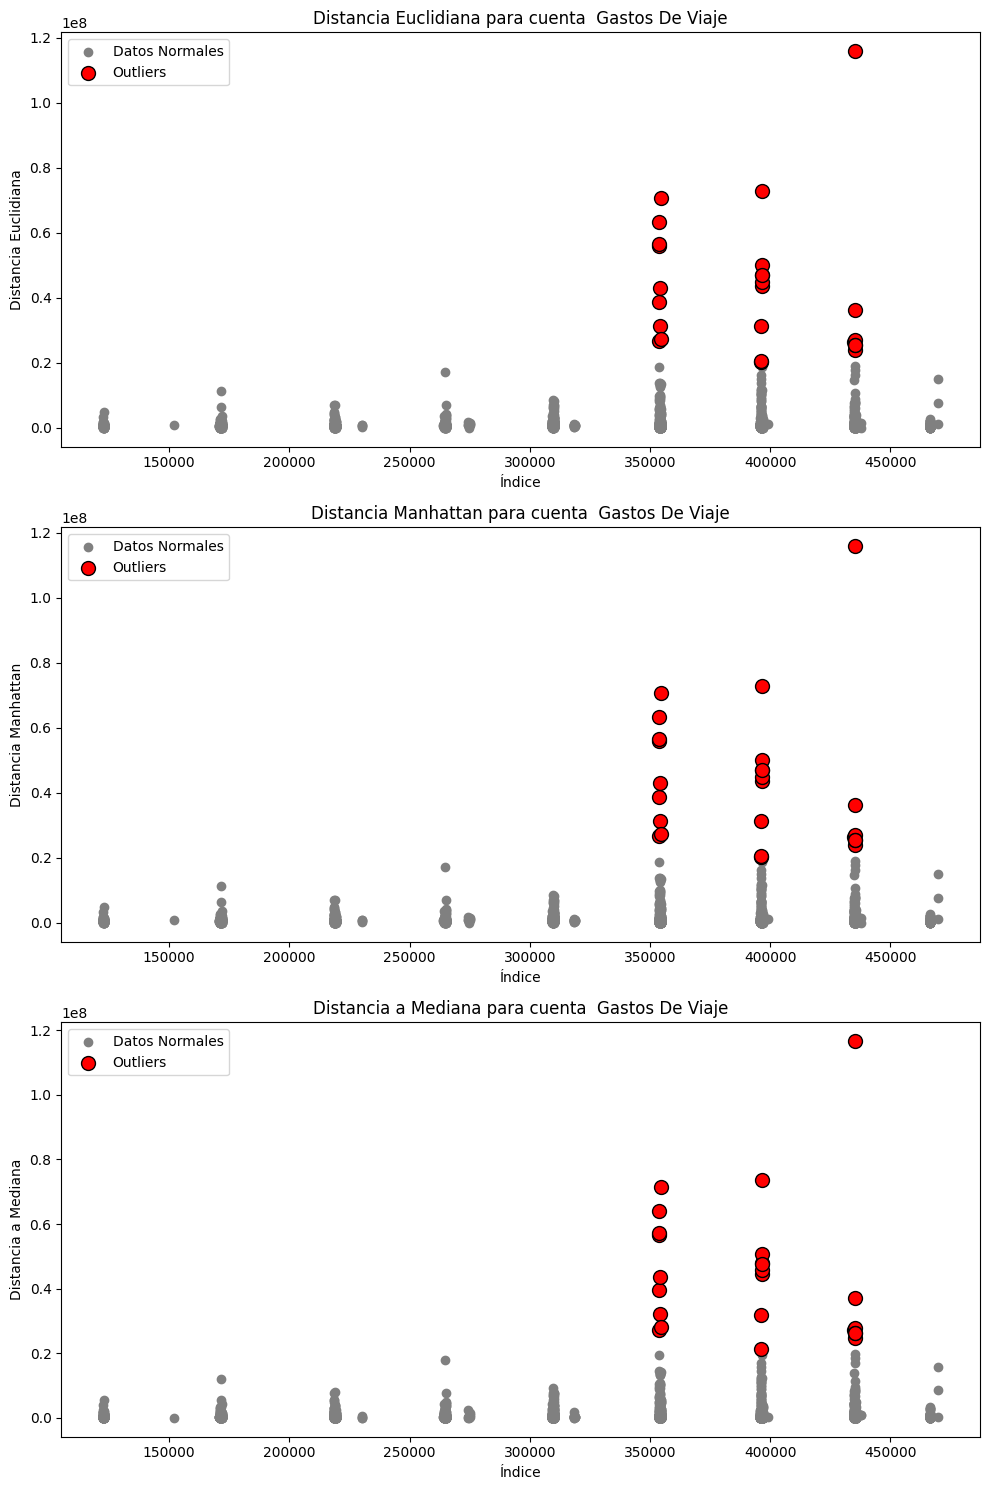

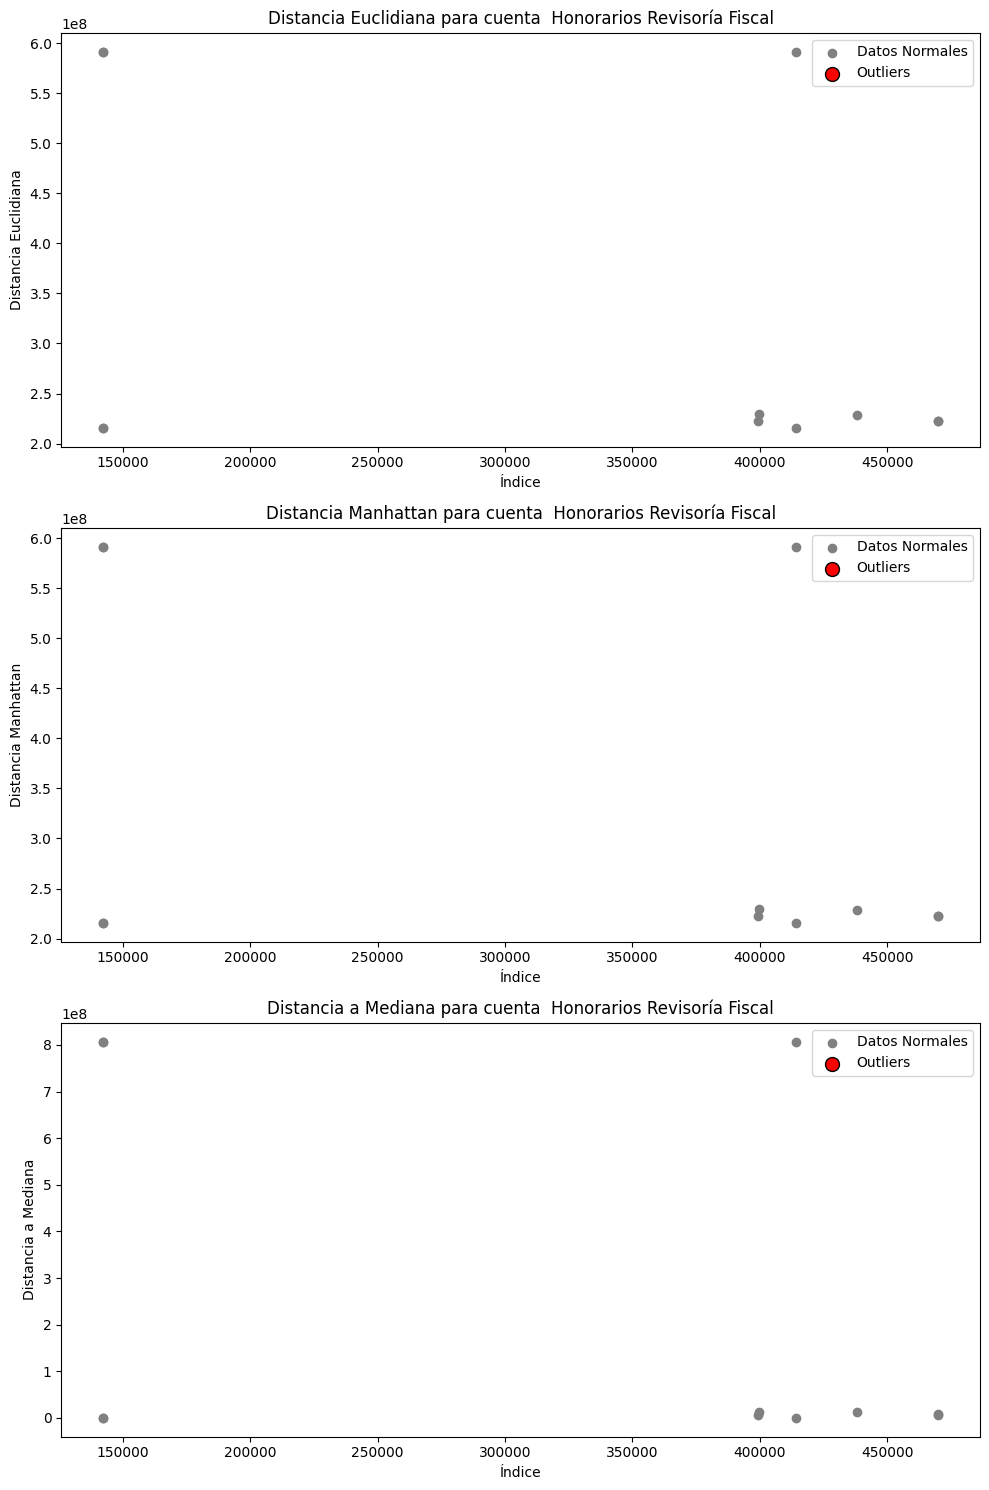

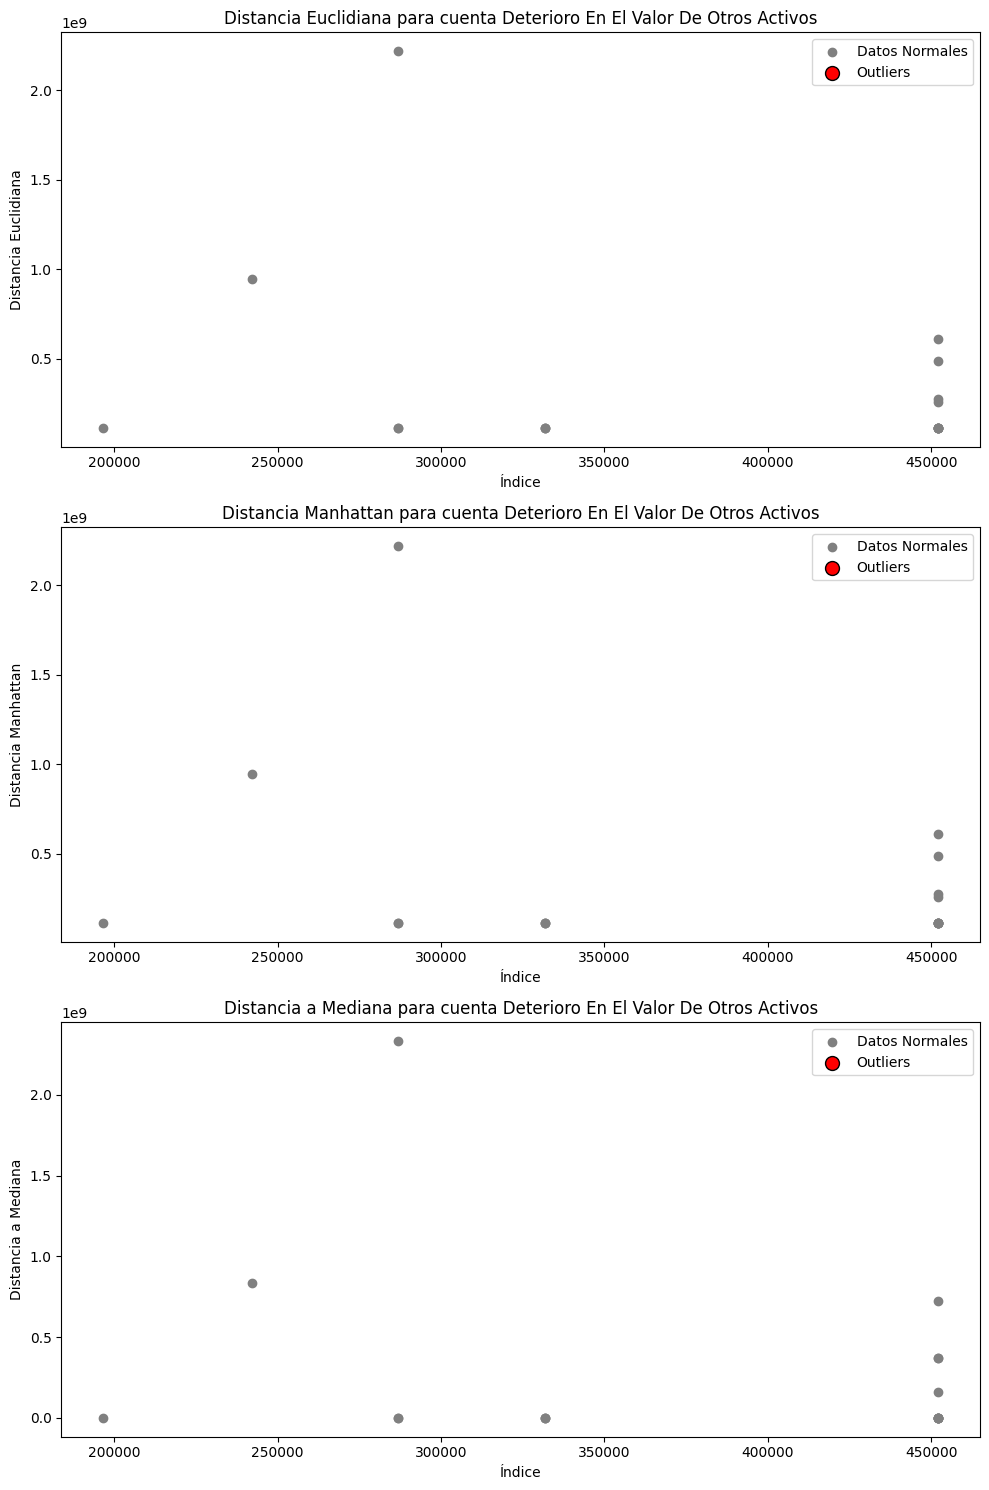

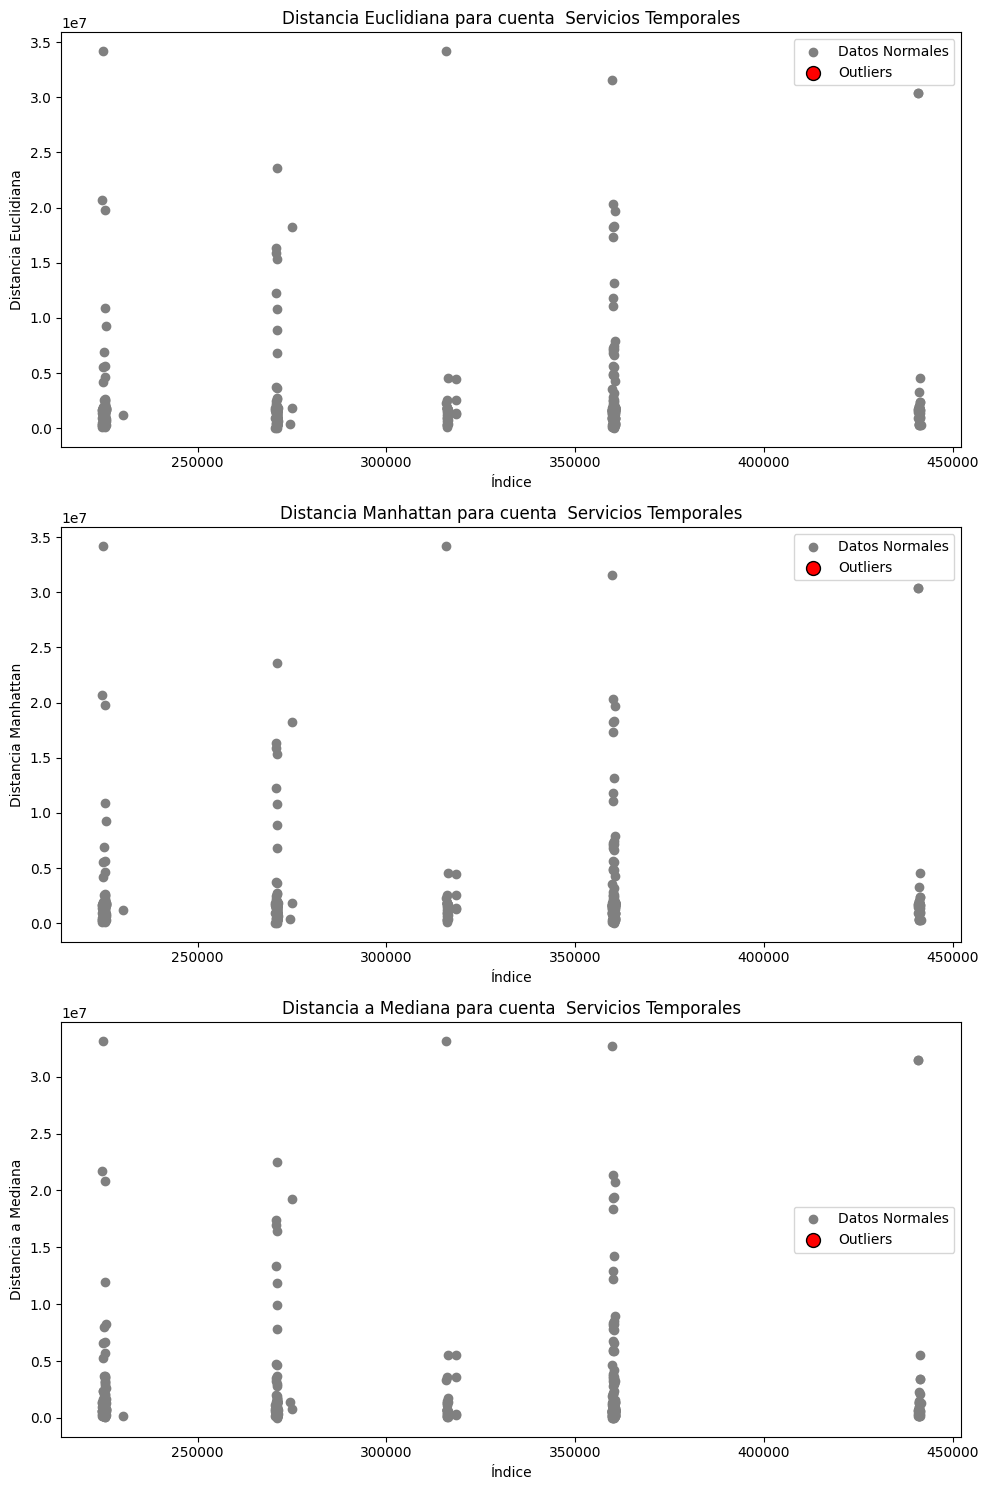

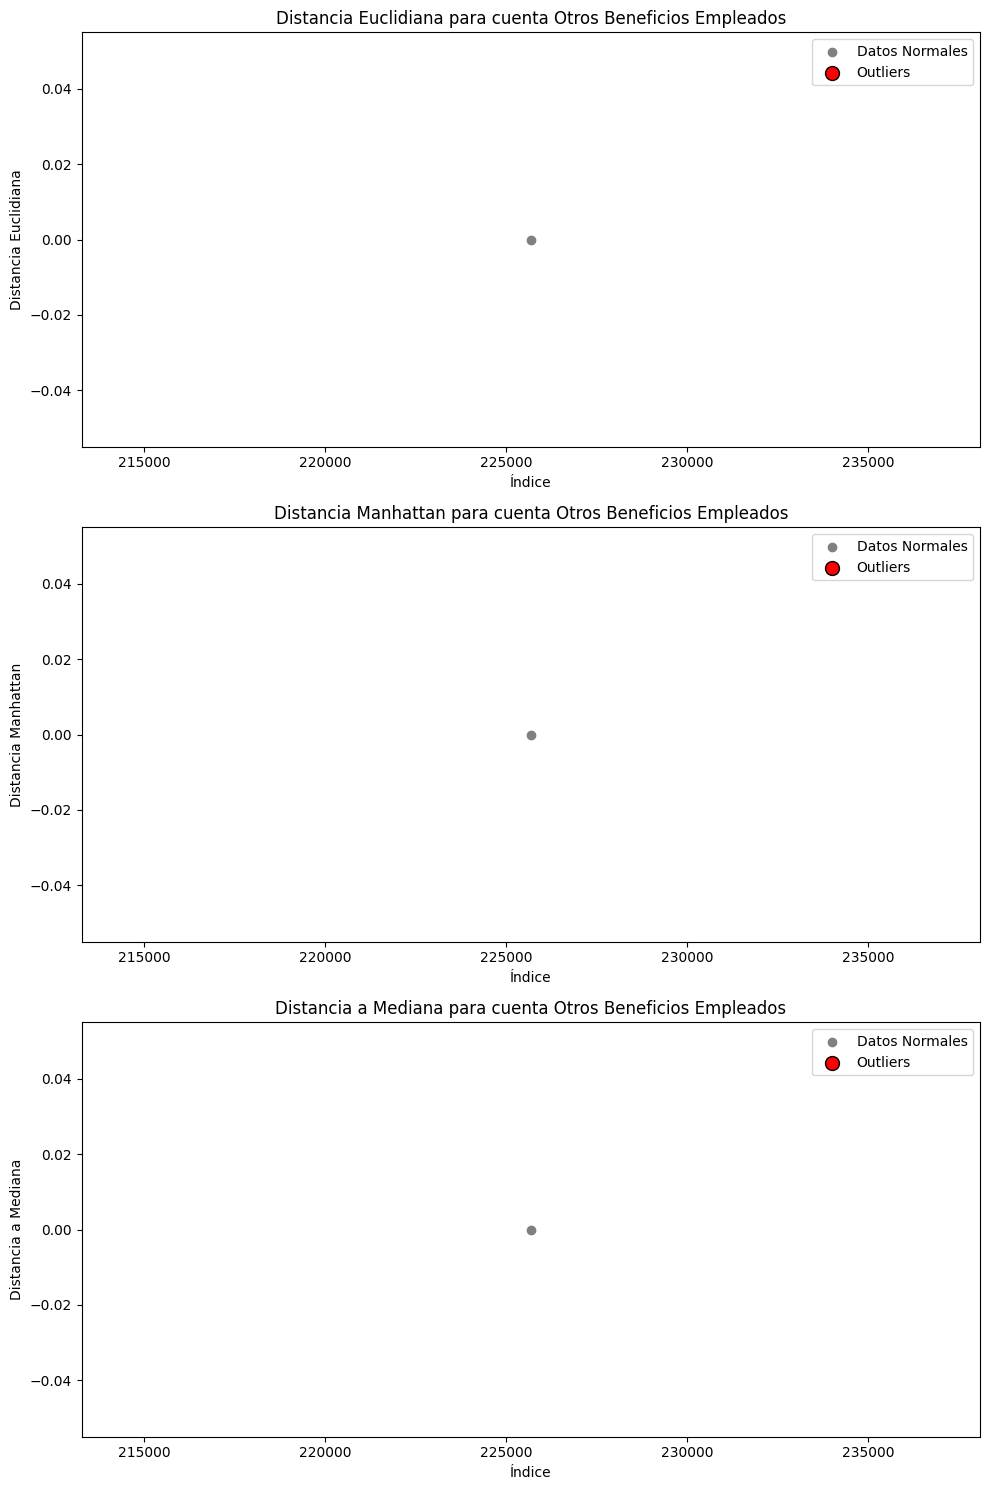

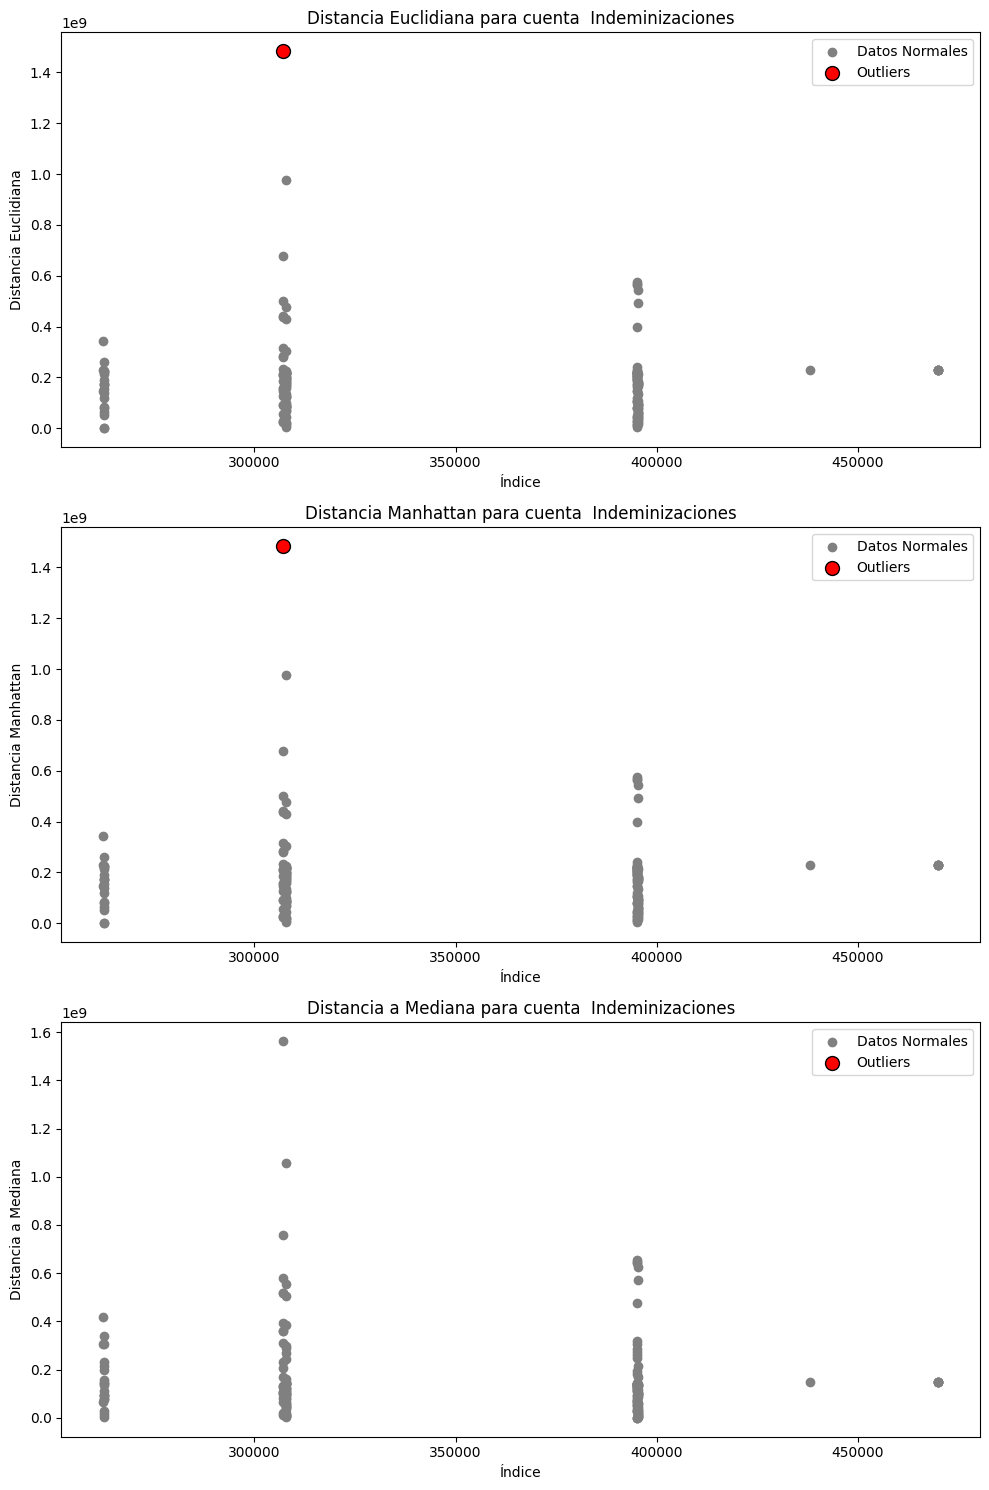

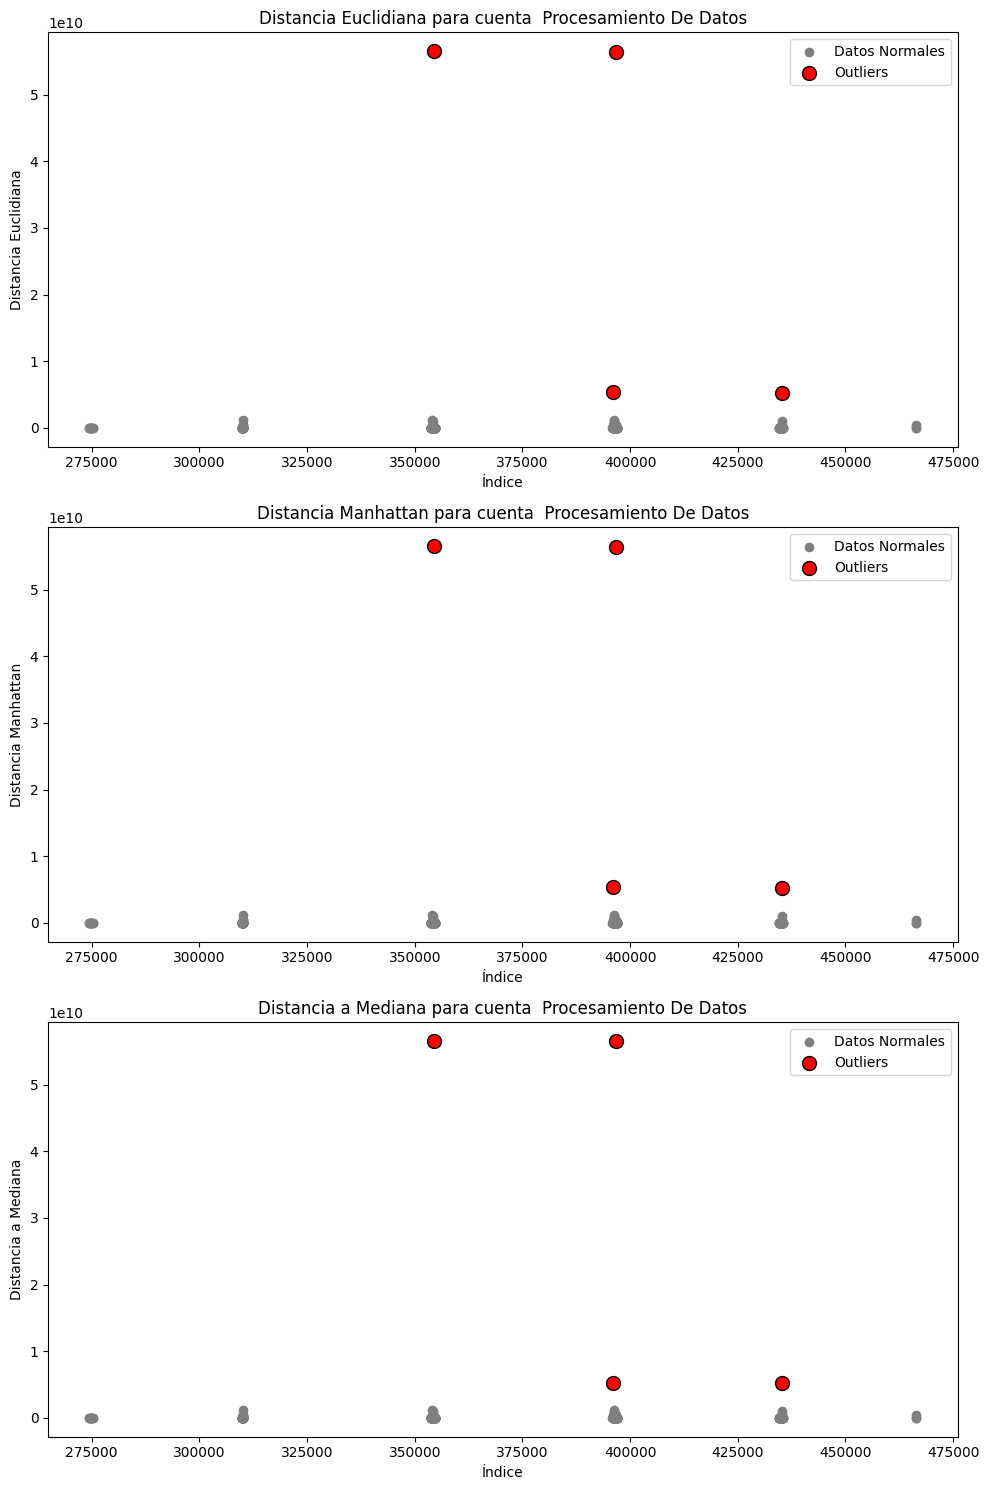

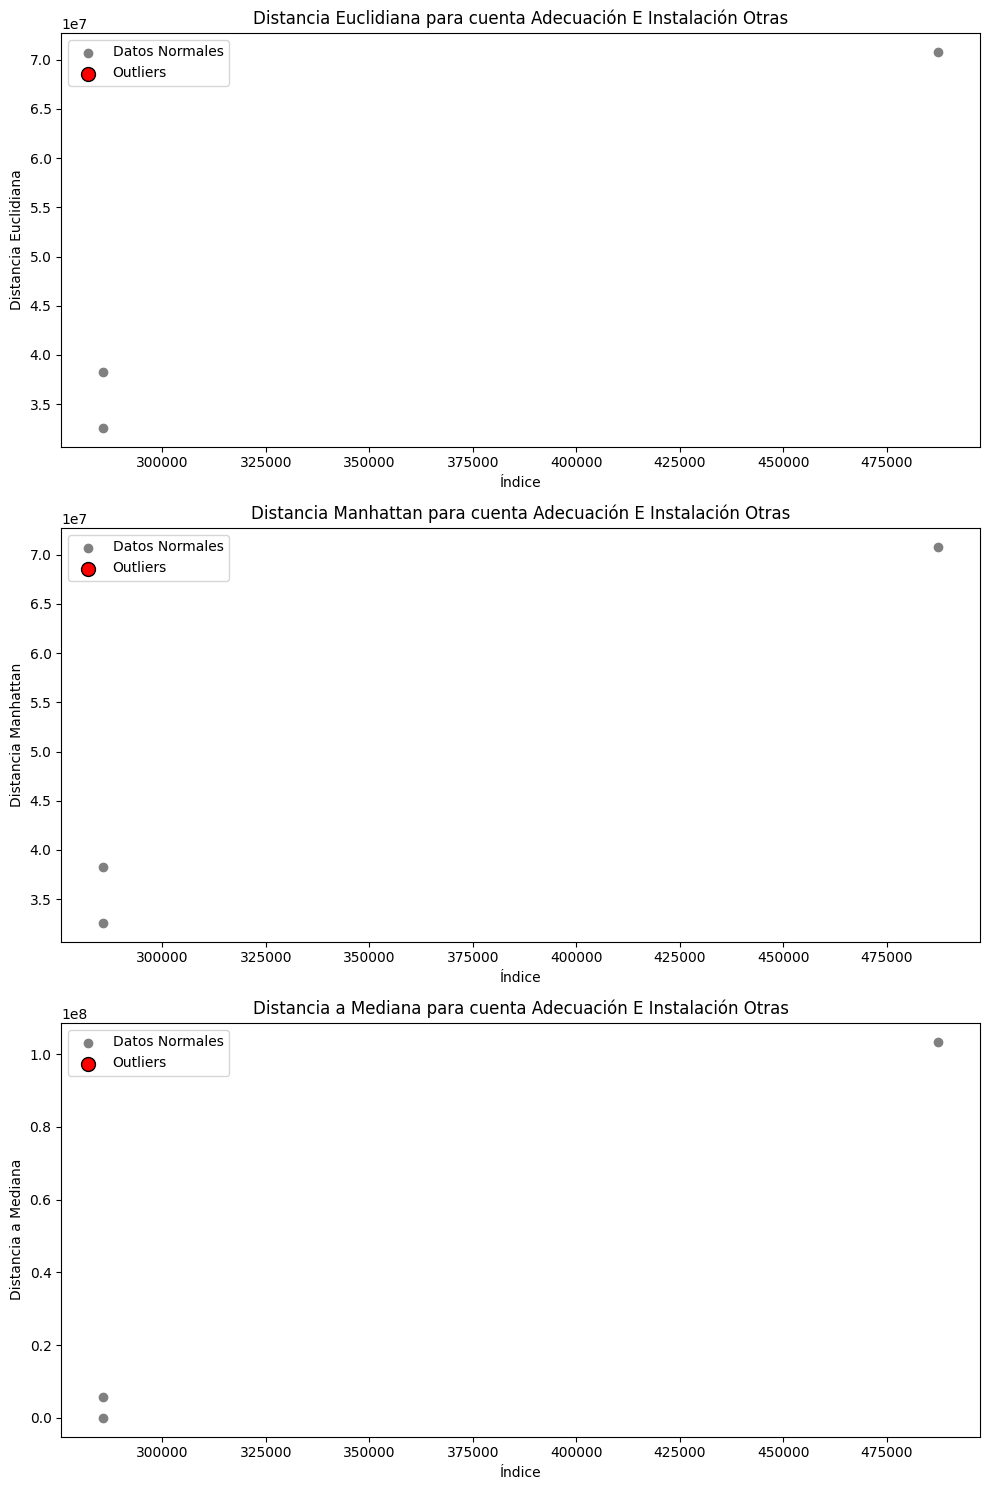

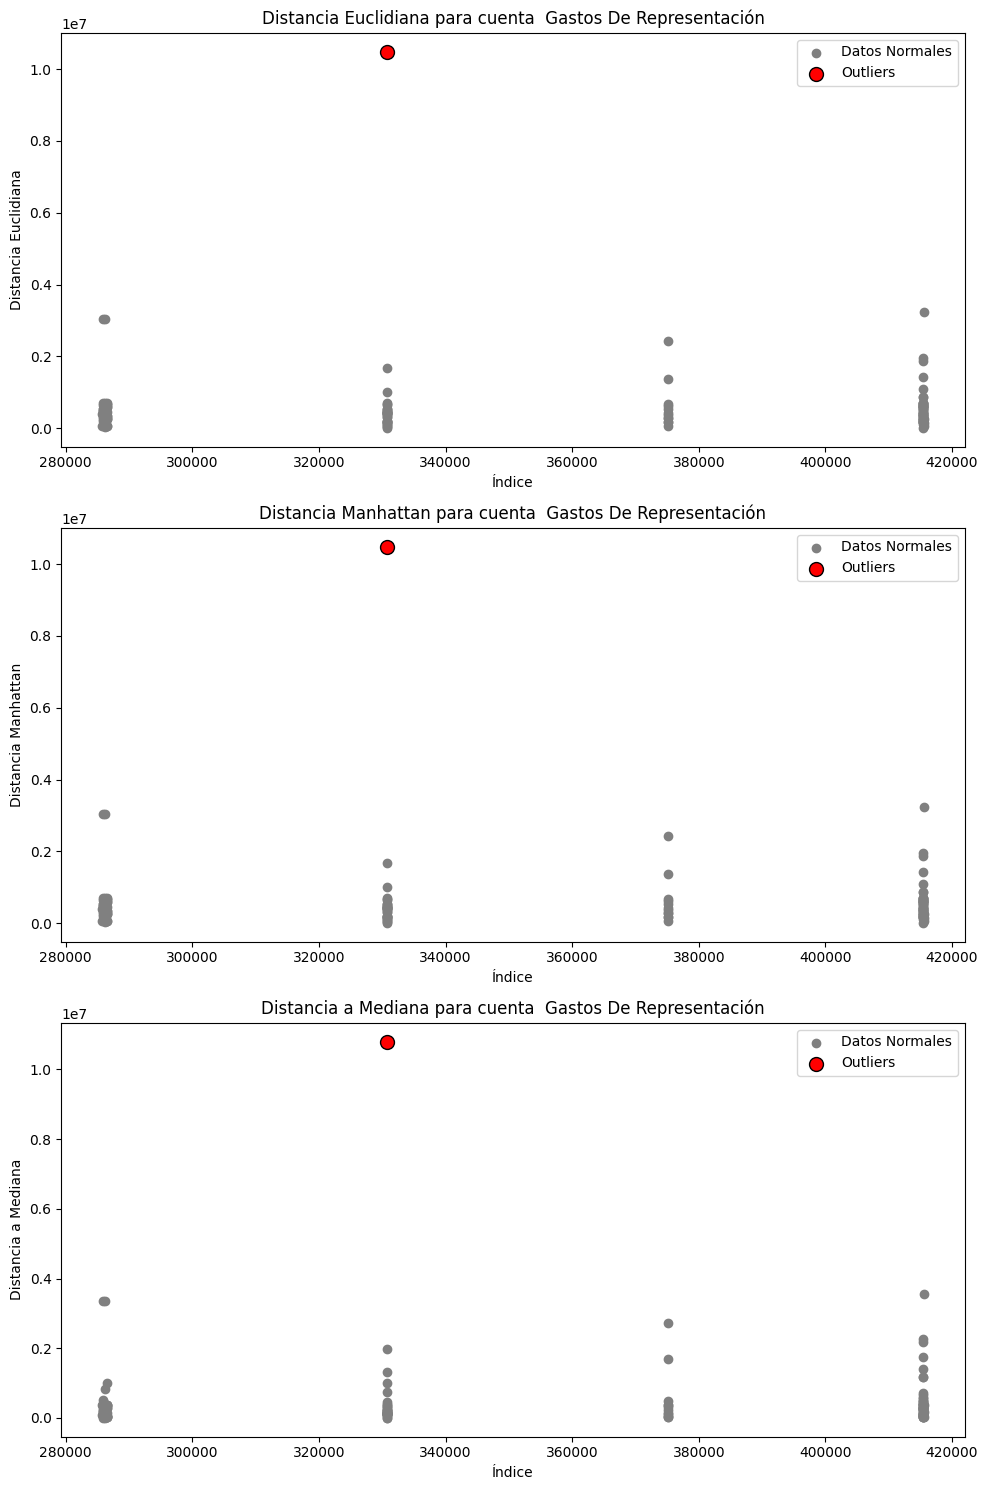

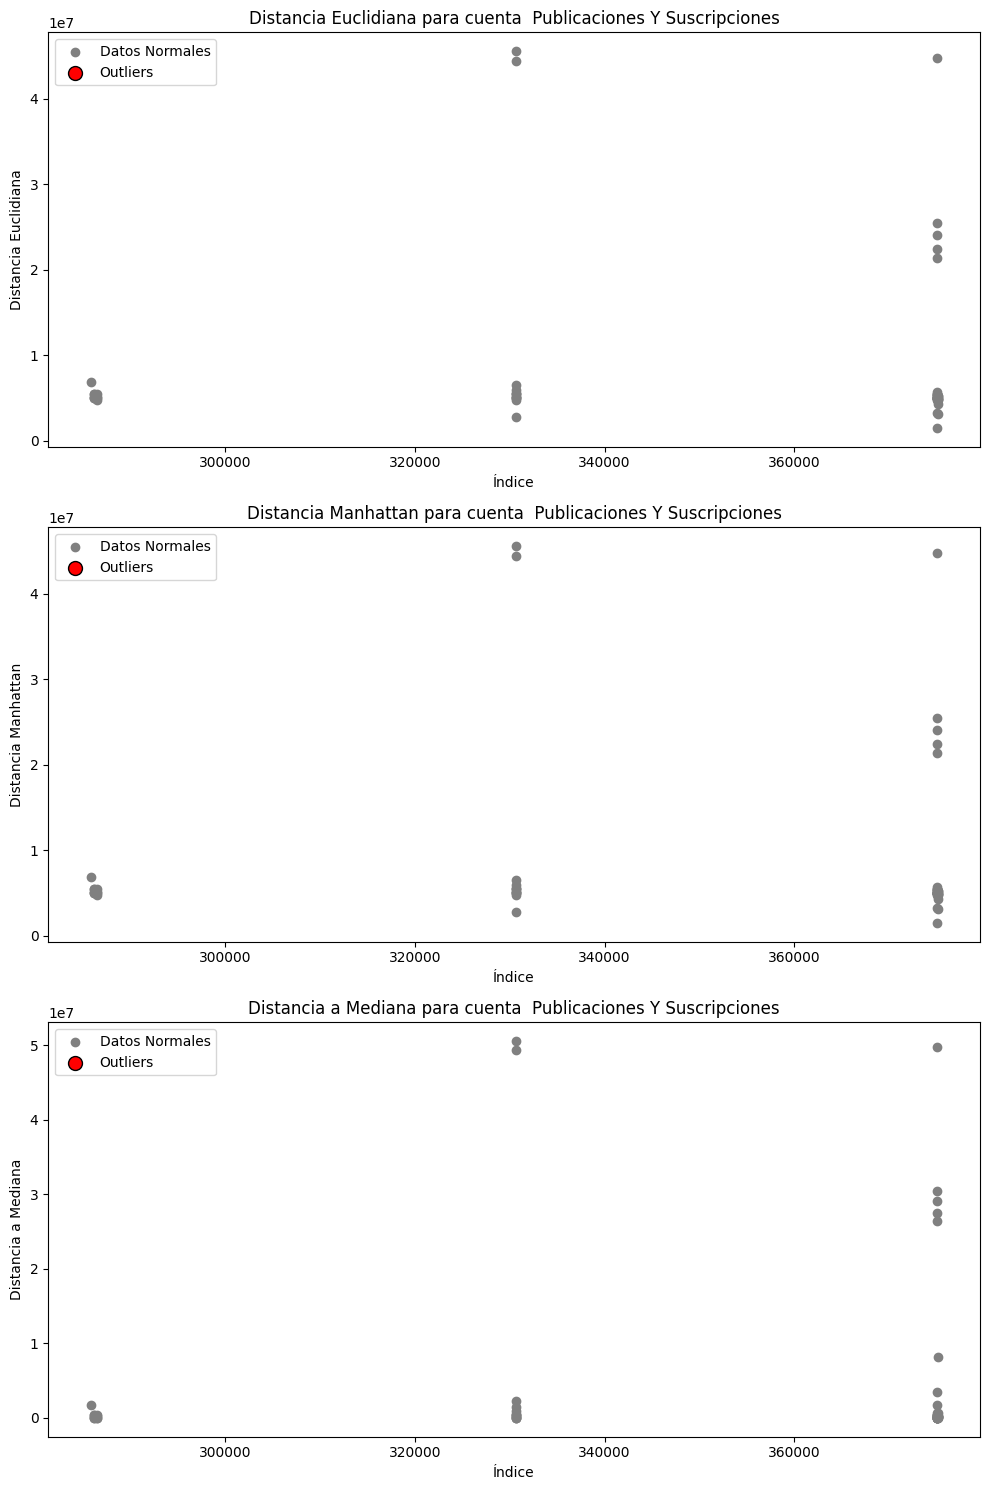

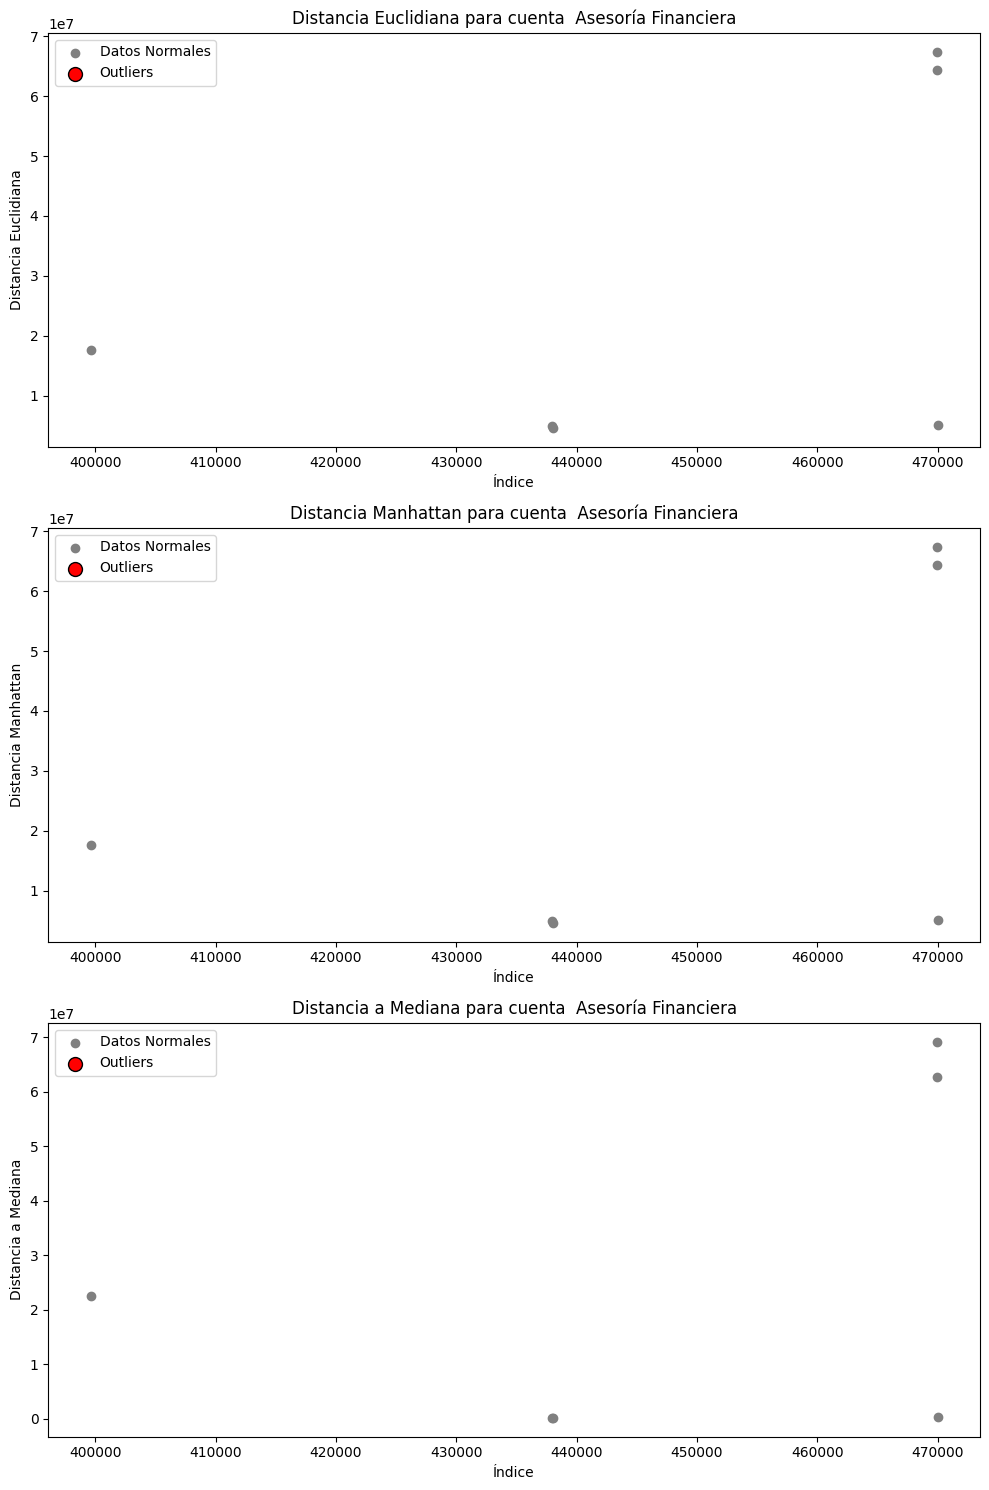

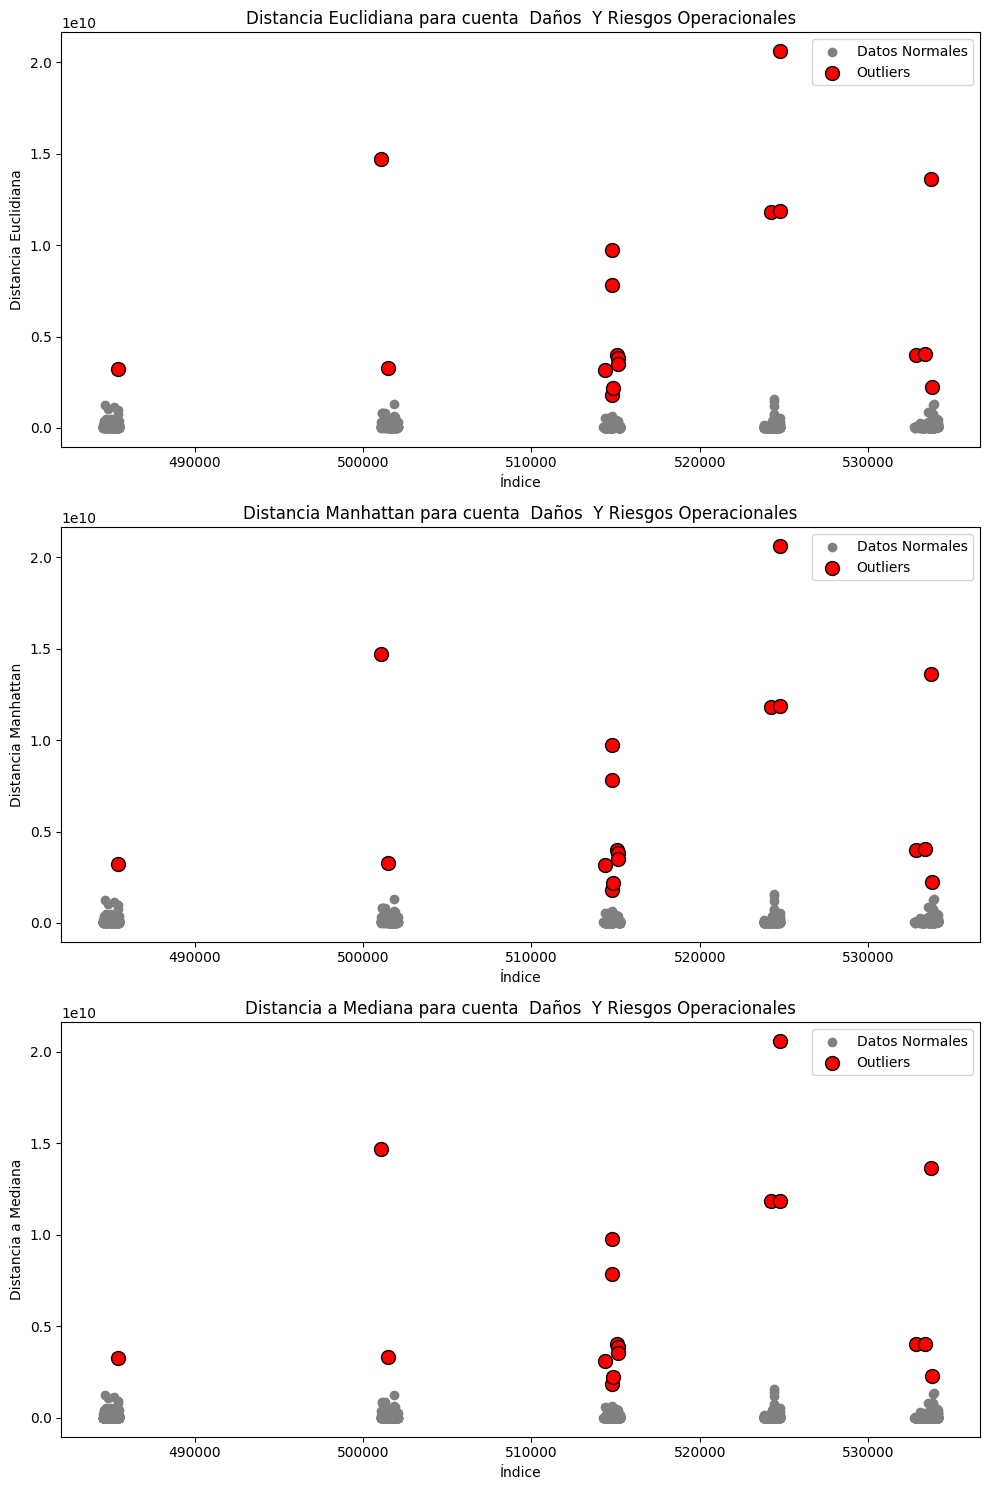

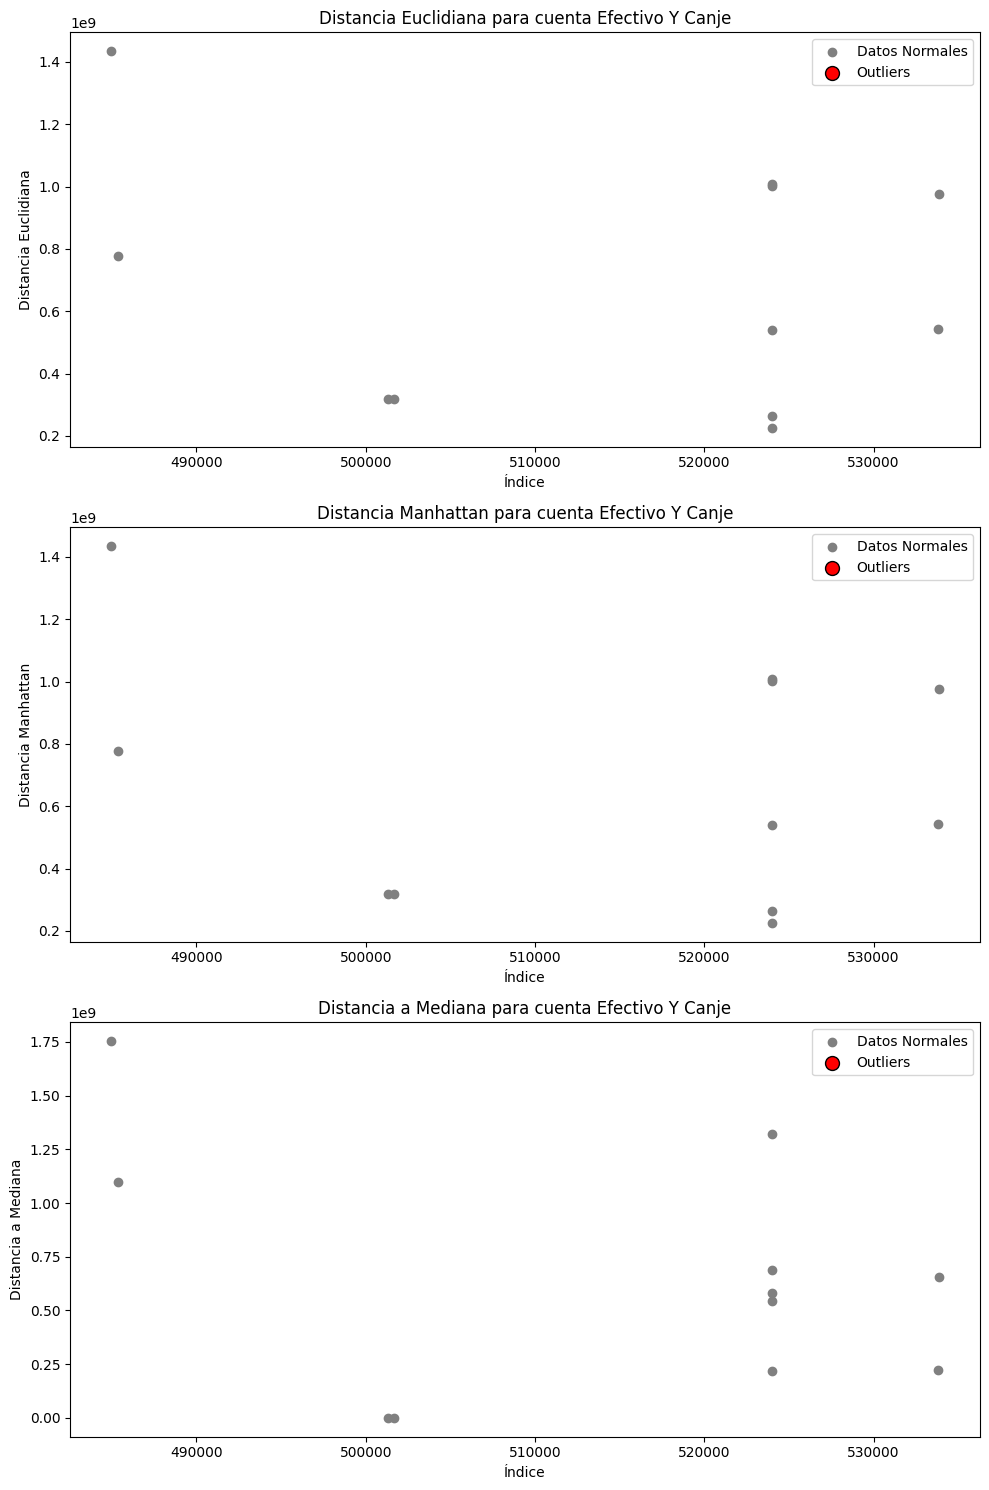

In [12]:
base_distancia = pd.DataFrame()  # DataFrame consolidado para almacenar resultados

for cuenta in cuentas:
    bd = df[df['nivel_1_cuenta'] == cuenta]
    media_gasto = bd['gasto_ejecutado'].mean()
    mediana_gasto = bd['gasto_ejecutado'].median()

    # Calcular las distancias
    bd['Distancia Euclidiana'] = bd['gasto_ejecutado'].apply(distancia_euclidiana, args=(media_gasto,))
    bd['Distancia Manhattan'] = bd['gasto_ejecutado'].apply(distancia_manhattan, args=(media_gasto,))
    bd['Distancia a Mediana'] = bd['gasto_ejecutado'].apply(distancia_a_mediana, args=(mediana_gasto,))

    # Gráfico para la cuenta actual con tres subplots
    fig, ax = plt.subplots(3, 1, figsize=(10, 15))
    distancias = ['Distancia Euclidiana', 'Distancia Manhattan', 'Distancia a Mediana']

    for i, distancia in enumerate(distancias):
        Q1 = bd[distancia].quantile(0.02)
        Q3 = bd[distancia].quantile(0.98)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificar y marcar outliers
        bd['Outlier_' + distancia] = bd[distancia].apply(lambda x: 'Outlier' if x > limite_superior else 'No Outlier')

        # Datos para graficar
        normal_data = bd[bd['Outlier_' + distancia] == 'No Outlier']
        outlier_data = bd[bd['Outlier_' + distancia] == 'Outlier']

        # Graficar
        ax[i].scatter(normal_data.index, normal_data[distancia], color='gray', label='Datos Normales')
        ax[i].scatter(outlier_data.index, outlier_data[distancia], color='red', s=100, edgecolors='black', label='Outliers')
        ax[i].set_title(f'{distancia} para cuenta {cuenta}')
        ax[i].set_xlabel('Índice')
        ax[i].set_ylabel(distancia)
        ax[i].legend()

    plt.tight_layout()
    plt.show()
    # Concatenar los datos de esta cuenta al DataFrame consolidado
    base_distancia = pd.concat([base_distancia, bd], ignore_index=True)

In [13]:
base_distancia['reconfirma'] = (base_distancia['Outlier_Distancia Euclidiana'] == 'No Outlier') & (base_distancia['Outlier_Distancia Manhattan'] == 'No Outlier') & (base_distancia['Outlier_Distancia a Mediana'] == 'No Outlier')

In [14]:
outliers = base_distancia[base_distancia['reconfirma'] == False]

In [15]:
no_outliers = base_distancia[base_distancia['reconfirma'] == True]

In [16]:
outliers.head(20)

mes moneda            gestoria  \
6      03    COP  Logistica Integral   
11     02    COP  Logistica Integral   
21     01    COP  Logistica Integral   
23     02    COP  Logistica Integral   
4062   03    COP  Logistica Integral   
4070   03    COP  Logistica Integral   
6040   02    COP  Logistica Integral   
6139   03    COP  Logistica Integral   
8781   02    COP  Logistica Integral   
8798   01    COP  Logistica Integral   
8799   01    COP  Logistica Integral   
8849   03    COP  Logistica Integral   
8923   02    COP  Logistica Integral   
14857  02    COP  Logistica Integral   
16816  03    COP  Logistica Integral   
16893  03    COP  Logistica Integral   
16963  03    COP  Logistica Integral   
16981  03    COP  Logistica Integral   
17139  03    COP  Logistica Integral   
17161  03    COP  Logistica Integral   

                                                concepto       nivel_1_cuenta  \
6      3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
11     3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
21     3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
23     3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
4062   3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
4070   3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
6040   3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
6139   3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
8781   3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
8798   3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
8799   3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
8849   3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
8923   3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
14857  3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
16816  3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
16893  3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
16963  3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
16981  3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
17139  3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   
17161  3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...   Utiles Y Papeleria   

                                               proveedor  \
6      c2d1a108d90a2a7f7e285951c1cd1ebcaf36e6da6f53c8...   
11     c2d1a108d90a2a7f7e285951c1cd1ebcaf36e6da6f53c8...   
21     82450463db14a390f55c2b6326b054e54bcf65aaab274a...   
23     82450463db14a390f55c2b6326b054e54bcf65aaab274a...   
4062   a9071720c3aff296ee66bf8fee5a77ae8a82f67b59d873...   
4070   a9071720c3aff296ee66bf8fee5a77ae8a82f67b59d873...   
6040   ffca9596f36bde21af1101aa8c04e77e45a3e5850a1102...   
6139   ffca9596f36bde21af1101aa8c04e77e45a3e5850a1102...   
8781   c2d1a108d90a2a7f7e285951c1cd1ebcaf36e6da6f53c8...   
8798   c2d1a108d90a2a7f7e285951c1cd1ebcaf36e6da6f53c8...   
8799   c2d1a108d90a2a7f7e285951c1cd1ebcaf36e6da6f53c8...   
8849   ffca9596f36bde21af1101aa8c04e77e45a3e5850a1102...   
8923   ffca9596f36bde21af1101aa8c04e77e45a3e5850a1102...   
14857  ffca9596f36bde21af1101aa8c04e77e45a3e5850a1102...   
16816  82450463db14a390f55c2b6326b054e54bcf65aaab274a...   
16893  82450463db14a390f55c2b6326b054e54bcf65aaab274a...   
16963  82450463db14a390f55c2b6326b054e54bcf65aaab274a...   
16981  82450463db14a390f55c2b6326b054e54bcf65aaab274a...   
17139  82450463db14a390f55c2b6326b054e54bcf65aaab274a...   
17161  82450463db14a390f55c2b6326b054e54bcf65aaab274a...   

                         vicepresidencia_direccion_cumpl  gasto_ejecutado  \
6      08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...       2918580.00   
11     08b89b0d6020c28bcc5add99295361d6e41dd7d7b

In [17]:
no_outliers.to_csv('base_distancia_limpia.csv',sep=',')

In [18]:
outliers.to_csv('outliers.csv',sep=',',index=True)